# Plotting Notebook
Please use this is a guide to the type plots that you can create, as examples of the `hist`, `mplhep`, and other packages, as well as the use of the various functions that we have written in `plot_utils.py`. <br>
Use the the Table of Contents in Jupyter to view the different sections of the notebook to help navigating it.

In [2]:
%load_ext autoreload

In [3]:
%autoreload 1

In [4]:
import os, sys, glob, random
import pickle
import math
import multiprocessing
import itertools
import warnings
import json
import time
import numpy as np
from typing import Dict, List
from rich import print
from rich.pretty import pprint
from rich.console import Console
from rich.table import Table
from rich.progress import Progress, track
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
from cycler import cycler
import hist
from hist import Hist
import mplhep as hep
from tabulate import tabulate
import scipy
from scipy.special import binom
import uproot
import ROOT
from iminuit import Minuit
from iminuit.cost import LeastSquares
from jacobi import propagate
%aimport plot_utils
%aimport plot_utils_extras
%aimport fill_utils
%aimport generic_utils

In [5]:
warnings.filterwarnings('ignore')
mpl.rcParams.update({'figure.max_open_warning': 0})
mpl.rcParams['figure.facecolor'] = 'white'
hep.style.use("CMS")
np.set_printoptions(suppress=True)

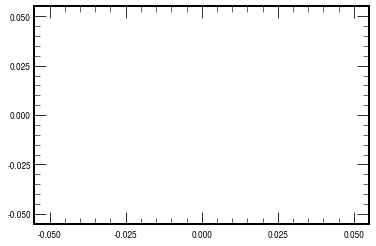

In [6]:
plt.plot()
hep.style.use(hep.style.CMS)
mpl.rcParams['figure.facecolor'] = 'white'

In [7]:
print("The following output directories are available:")
!ls | grep output_histograms

The following output directories are available:

CR_cb_34mu_output_histograms
CR_cb_combine_output_histograms
CR_cb_output_histograms
CR_cb_postDYstudy_output_histograms
CR_light_postDYstudy_output_histograms
CR_prompt_34mu_leading_output_histograms
CR_prompt_34mu_output_histograms
CR_prompt_combine_output_histograms
CR_prompt_dimuon_output_histograms
CR_prompt_dystudy_output_histograms
CR_prompt_leading_output_histograms
CR_prompt_output_histograms
CR_prompt_postDYstudy_output_histograms
DYstudy_2_output_histograms
DYstudy_3_output_histograms
DYstudy_4_output_histograms
DYstudy_5_output_histograms
DYstudy_output_histograms
DYstudy_trigger_match_double_output_histograms
DYstudy_trigger_match_triple_output_histograms
DYstudy_trigger_one_path_output_histograms
fake_rate_output_histograms
kinematics_output_histograms
nbjet_comparison_output_histograms
SR_combine_new_trigger_output_histograms
SR_combine_old_trigger_output_histograms
SR_combine_output_histograms
SR_extrapolation_new_from_mini_output_histograms
SR_extrapolation_new_output_

## Load plots

In [87]:
plots = generic_utils.loader(tag="post_gensum_bug", load_data=True, custom_lumi=5301.677943) #custom_lumi=573.120134)

These are all the samples loaded.

In [74]:
keys = list(plots.keys())
pprint(keys)

[
│   'GluGluToSUEP_mS1000.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS1000.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS200.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS200.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS200.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS200.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS300.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS300.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS300.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS300.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS400.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS400.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS400.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS400.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS500.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS500.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS500.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS500.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS600.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS600.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS600.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS600.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS800.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS800.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
│   'GluGluToSUEP_mS800.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
│   'GluGluToSUEP_mS800.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
│   'QCD_Pt-1000_MuEnrichedPt5_TuneCP5_13TeV-pythia8+RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_normalized_2018',
│   'QCD_Pt_MuEnriched_2018',
│   'QCD_Pt-120To170_MuEnrichedPt5_TuneCP5_13TeV-pythia8+RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_normalized_2018',
│   'QCD_Pt-15To20_MuEnrichedPt5_TuneCP5_13TeV-pythia8+RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_normalized_2018',
│   'QCD_Pt-170To300_MuEnrichedPt5_TuneCP5_13TeV-pythia8+RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_normalized_2018',
│   'QCD_Pt-20To30_MuEnrichedPt5_TuneCP5_13TeV-pythia8+RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_normalized_2018',
│   'QCD_Pt-300To470_MuEnrichedPt5_TuneCP5_13TeV-pythia8+RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_normalized_2018',
│   'QCD_Pt-30To50_MuEnrichedPt5_TuneCP5_13TeV-pythia8+RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_normalized_2018',
│   'QCD_Pt-470To600_MuEnrichedPt5_TuneCP5_13TeV-pythia8+RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_normalized_2018',
│   'QCD_Pt-50To80_MuEnrichedPt5_TuneCP5_13TeV-pythia8+RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_normalized_2018',
│   'QCD_Pt-600To800_MuEnrichedPt5_TuneCP5_13TeV-pythia8+RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v2+NANOAODSIM_histograms_normalized_2018',
│   'QCD_Pt-800To1000_MuEnrichedPt5_TuneCP

In [60]:
for key in plots['QCD_Pt_MuEnriched_2018'].keys():
    pprint(f"{key}")

'ip3d_cut_vs_mini_iso_cut_vs_neutral_iso_cut_vs_pt_cut_vs_nMuon'

'ip3d_cut_vs_mini_iso_cut_vs_neutral_iso_cut_vs_pt_cut_vs_muon_pt'

## Plot stack of bkgs for nMuon distribution

Other_2018: 0.0000 ± 0.0000

VV_2018: 0.0000 ± 0.0000

DY_2018: 0.0000 ± 0.0000

TT_powheg_2018: 0.0000 ± 0.0000

QCD_Pt_MuEnriched_2018: 0.0000 ± 0.0000

Total: 0.0000 ± 0.0000

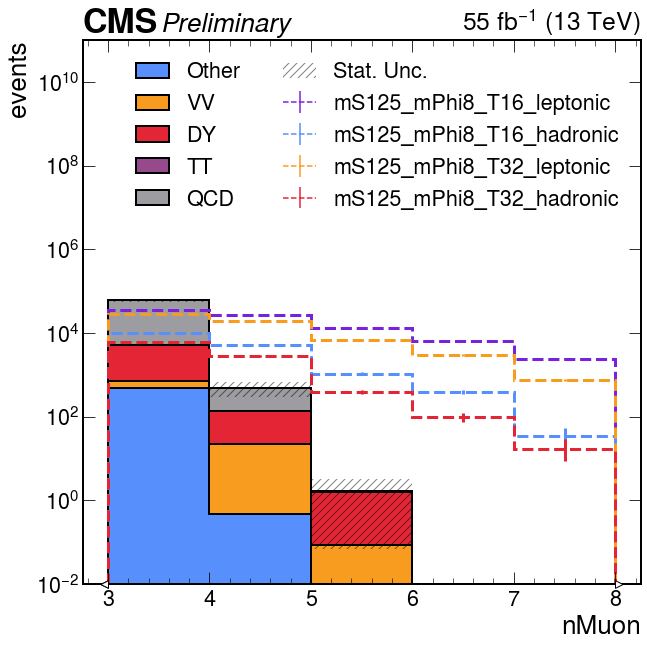

In [75]:
data = 'DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018'
mc_processes = [
    'Other_2018',
    'VV_2018',
    'DY_2018',
    'TT_powheg_2018',
    'QCD_Pt_MuEnriched_2018'
]
mc_labels = [
    'Other',
    'VV',
    'DY',
    'TT',
    'QCD'
]

signal_processes = [
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
]
signal_labels = [
    'mS125_mPhi8_T16_leptonic',
    'mS125_mPhi8_T16_hadronic',
    'mS125_mPhi8_T32_leptonic',
    'mS125_mPhi8_T32_hadronic',    
]

hist_name = 'ip3d_cut_vs_mini_iso_cut_vs_neutral_iso_cut_vs_pt_cut_vs_nMuon'
slc = (1, 1, 1, 1, slice(None))

hists_mc = []
hist_bkg_total = None

for process in mc_processes:
    h_mc = plots[process][hist_name][slc]
    hists_mc.append(h_mc)
    print(f"{process}: {h_mc[7j::sum].value:.4f} ± {np.sqrt(h_mc[7j::sum].variance):.4f}")
    if hist_bkg_total is None:
        hist_bkg_total = h_mc.copy()
    else:
        hist_bkg_total += h_mc.copy()
print(f"Total: {hist_bkg_total[7j::sum].value:.4f} ± {np.sqrt(hist_bkg_total[7j::sum].variance):.4f}")
        
hists_signal = []
for process in signal_processes:
    h_signal = plots[process][hist_name][slc]
    hists_signal.append(h_signal)

fig, ax = plt.subplots(figsize=(10,10))

hep.histplot(
    hists_mc, 
    stack=True, 
    label=mc_labels,        
    histtype="fill",
    ec="black",
    lw=2,
    ax=ax,
)

x_hatch = np.vstack(
    (hist_bkg_total.axes[0].edges[:-1], hist_bkg_total.axes[0].edges[1:])
).reshape((-1,), order="F")
y_hatch1 = np.vstack((hist_bkg_total.values(), hist_bkg_total.values())).reshape(
    (-1,), order="F"
)
y_hatch1_unc = np.vstack(
    (np.sqrt(hist_bkg_total.variances()), np.sqrt(hist_bkg_total.variances()))
).reshape((-1,), order="F")
ax.fill_between(
    x=x_hatch,
    y1=y_hatch1 - y_hatch1_unc,
    y2=y_hatch1 + y_hatch1_unc,
    label="Stat. Unc.",
    step="pre",
    facecolor="none",
    edgecolor=(0, 0, 0, 0.5),
    linewidth=0,
    hatch="///",
    zorder=2,
)

hep.histplot(
    hists_signal,
    label=signal_labels,
    lw=3,
    ls="--",
    ax=ax,
)

# h_data = plots[data][hist_name][slc]
# hep.histplot(
#     h_data,
#     label=["Data"],
#     histtype="errorbar",
#     mec="black",
#     mfc="black",
#     ecolor="black",
#     ax=ax
# )
    
#hep.cms.label(llabel="Preliminary", data=True, lumi=5.3, ax=ax)
hep.cms.label(llabel="Preliminary", data=True, lumi=55, ax=ax)
plt.ylim(1e-2, 1e11)
plt.yscale('log')
plt.legend(ncol=2)
plt.xlabel("nMuon")
plt.ylabel("events")
plt.show()

In [18]:
print(0.1484 + 0.1375)
print(np.sqrt(0.2394**2 + 0.0366**2))

0.28590000000000004

0.24218158476647228

## Plot overlay of bkgs for nMuon distribution

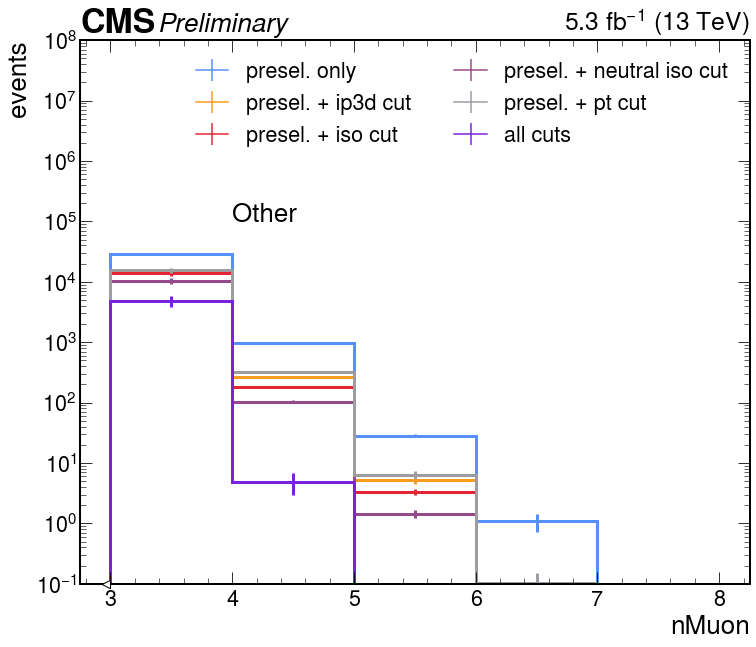

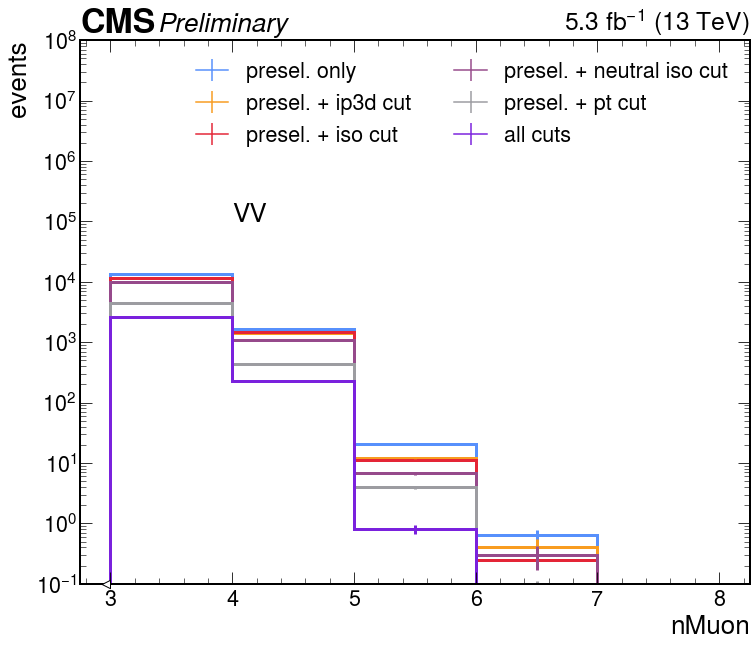

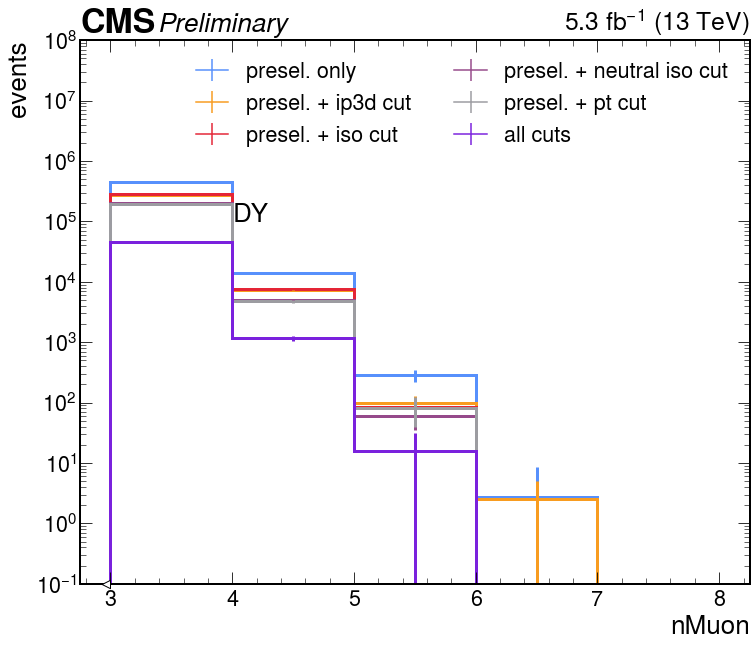

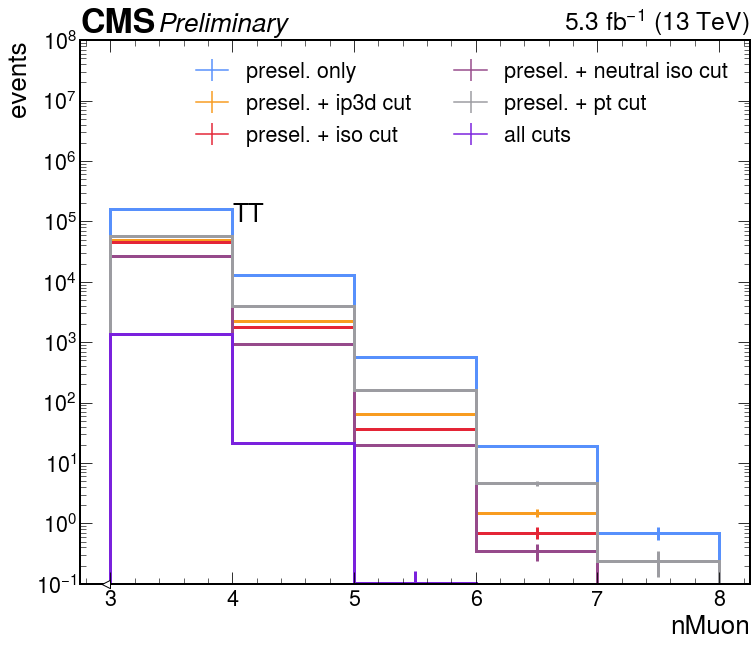

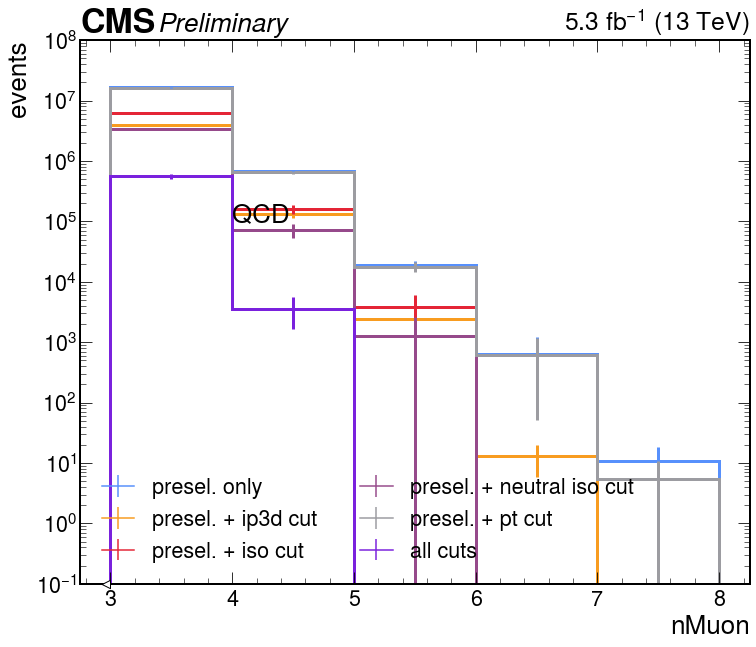

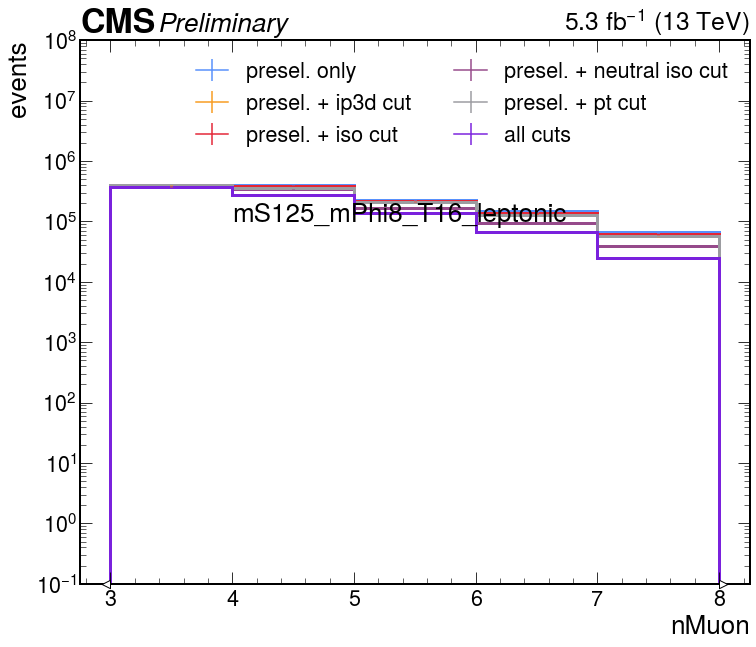

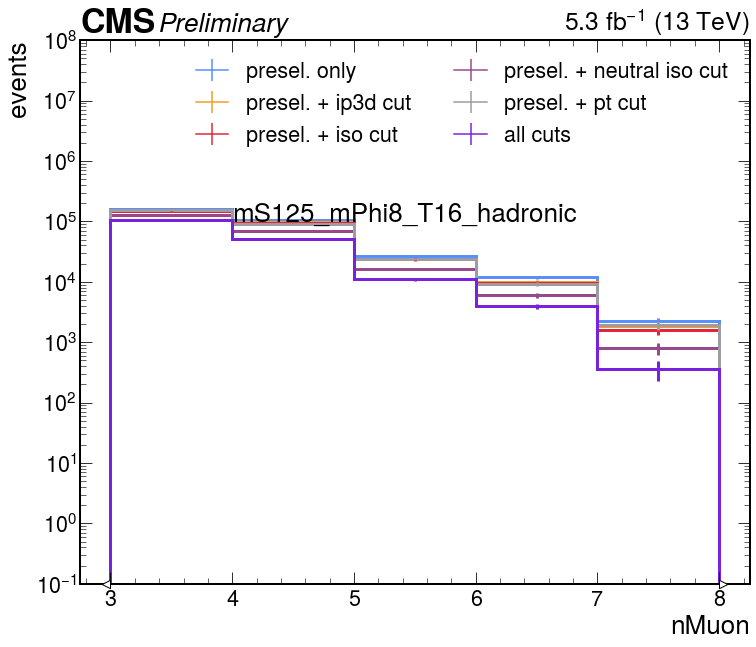

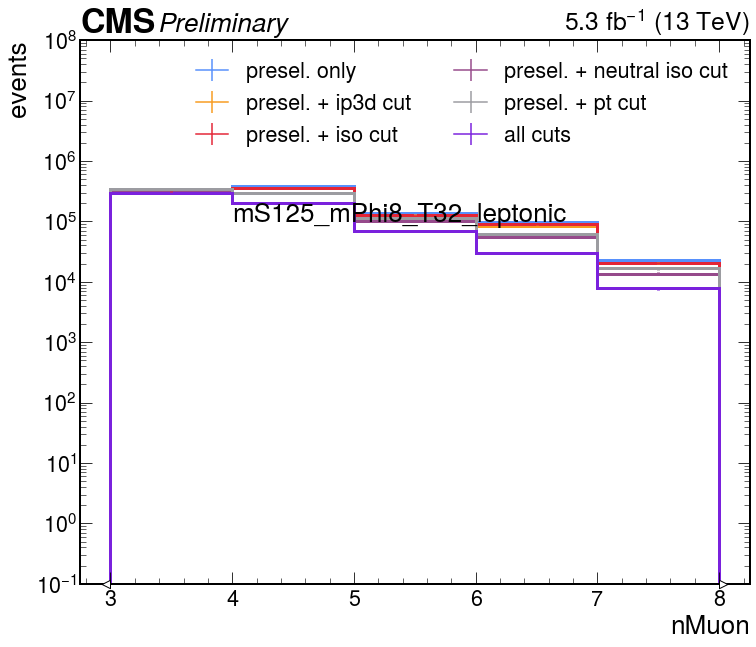

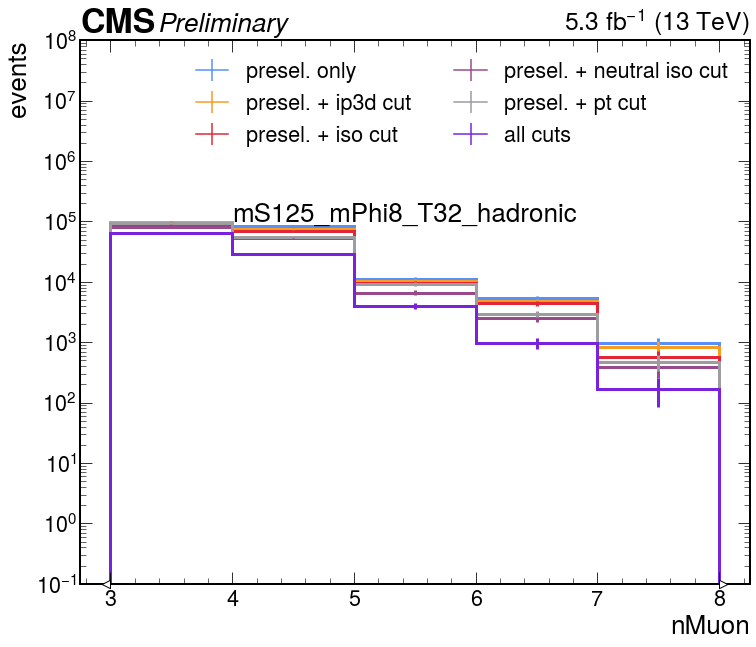

In [86]:
processes = [
    'Other_2018',
    'VV_2018',
    'DY_2018',
    'TT_powheg_2018',
    'QCD_Pt_MuEnriched_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
]
proc_labels = [
    'Other',
    'VV',
    'DY',
    'TT',
    'QCD',
    'mS125_mPhi8_T16_leptonic',
    'mS125_mPhi8_T16_hadronic',
    'mS125_mPhi8_T32_leptonic',
    'mS125_mPhi8_T32_hadronic',    
]

for process, proc_label in zip(processes, proc_labels):
    slices = [
        (0, 0, 0, 0, slice(None)),
        (1, 0, 0, 0, slice(None)),
        (0, 1, 0, 0, slice(None)),
        (0, 0, 1, 0, slice(None)),
        (0, 0, 0, 1, slice(None)),
        (1, 1, 1, 1, slice(None)),
    ]
    labels = [
        'presel. only',
        'presel. + ip3d cut',
        'presel. + iso cut',
        'presel. + neutral iso cut',
        'presel. + pt cut',
        'all cuts',
    ]

    hist_name = 'ip3d_cut_vs_mini_iso_cut_vs_neutral_iso_cut_vs_pt_cut_vs_nMuon'

    hists_mc = []
    for slc, label in zip(slices, labels):
        h_mc = plots[process][hist_name][slc]
        hists_mc.append(h_mc)
#         print(label)
#         print(h_mc.values())
#         print(np.sqrt(h_mc.variances()))


    fig, ax = plt.subplots(figsize=(12,10))

    hep.histplot(
        hists_mc,
        yerr=[np.sqrt(h.variances()) for h in hists_mc],
        label=labels,        
        lw=3,
        ax=ax,
    )

    hep.cms.label(llabel="Preliminary", data=True, lumi=5.3, ax=ax)
    plt.text(4, 1e5, proc_label)
    plt.ylim(1e-1, 1e8)
    plt.yscale('log')
    plt.legend(ncol=2)
    plt.xlabel("nMuon")
    plt.ylabel("events")
    plt.show()

In [ ]:
data = 'DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018'
mc_process = 'DY_2018',
]
mc_labels = [
    'DY',
]

signal_processes = [
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
]
signal_labels = [
    'mS125_mPhi8_T16_leptonic',
    'mS125_mPhi8_T16_hadronic',
    'mS125_mPhi8_T32_leptonic',
    'mS125_mPhi8_T32_hadronic',    
]

hist_name = 'ip3d_cut_vs_mini_iso_cut_vs_neutral_iso_cut_vs_nMuon'
slc = (0, 0, 0, slice(None))

hists_mc = []

for process in mc_processes:
    h_mc = plots[process][hist_name][slc]
    hists_mc.append(h_mc)
    print(process, h_mc.values())

fig, ax = plt.subplots(figsize=(12,10))

hep.histplot(
    hists_mc,
    yerr=[np.sqrt(h.variances()) for h in hists_mc],
    label=mc_labels,        
    lw=3,
    ax=ax,
)
    
hep.cms.label(llabel="Preliminary", data=True, lumi=5.3, ax=ax)
plt.ylim(1e-2, 1e6)
plt.yscale('log')
plt.legend(ncol=2)
plt.xlabel("nMuon")
plt.ylabel("events")
plt.show()

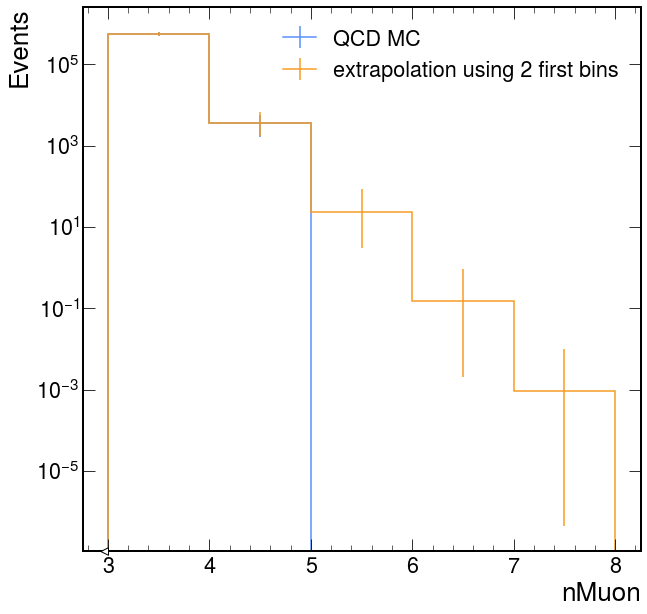

0.0009 ± 0.0021

[ 1.  1. inf inf inf]

[0.14352361 0.76603026        nan        nan        nan]

In [80]:
def pred(h_in):
    f0 = h_in.values()[0]
    f1 = h_in.values()[1]
    var_f0 = h_in.variances()[0]
    var_f1 = h_in.variances()[1]
    values = [f1 * (f1 / f0)**(n - 1) for n in range(len(h_in.values()))]
    variances = [
        (
            ((n - 1) * (f1 / f0)**n)**2 * var_f0 + (n * (f1 / f0)**(n - 1))**2 * var_f1
        ) for n in range(len(h_in.values()))
    ]
    h_out = h_in.copy().reset()
    for i in range(len(h_in.values())):
        h_out[i] = (values[i], variances[i])
    return h_out

h = plots['QCD_Pt_MuEnriched_2018']['ip3d_cut_vs_mini_iso_cut_vs_neutral_iso_cut_vs_pt_cut_vs_nMuon'][1, 1, 1, 1, :]

h.plot(yerr=np.sqrt(h.variances()), label='QCD MC')
pred(h).plot(label='extrapolation using 2 first bins')
plt.ylabel('Events')
plt.yscale('log')
#plt.ylim(1e-3, 1e6)
plt.legend()
plt.show()

print(f"{pred(h)[7j::sum].value:.4f} ± {np.sqrt(pred(h)[7j::sum].variance):.4f}")

print(pred(h).values() / h.values())
print(np.sqrt(pred(h).variances() / (h.values()**2) + pred(h).values()**2 * h.variances() / (h.values()**4)))

WeightedSum(value=45253, variance=791947)

WeightedSum(value=1165.19, variance=11202.7)

WeightedSum(value=15.6362, variance=252.884)

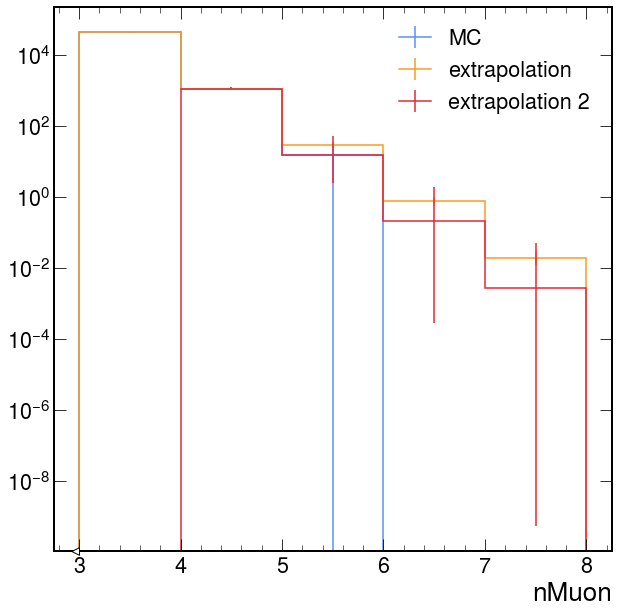

0.0199 ± 0.0073

0.0028 ± 0.0086

In [81]:
h = plots['DY_2018']['ip3d_cut_vs_mini_iso_cut_vs_neutral_iso_cut_vs_pt_cut_vs_nMuon'][1, 1, 1, 1, :]

print(h[0])
print(h[1])
print(h[2])

h.plot(yerr=np.sqrt(h.variances()), label='MC')
pred(h).plot(label='extrapolation')
pred(h[1:]).plot(label='extrapolation 2')
plt.yscale('log')
plt.legend()
plt.show()

print(f"{pred(h)[7j::sum].value:.4f} ± {np.sqrt(pred(h)[7j::sum].variance):.4f}")
print(f"{pred(h[1:])[7j::sum].value:.4f} ± {np.sqrt(pred(h[1:])[7j::sum].variance):.4f}")

In [23]:
print(0.2859 + 0.3315)
print(np.sqrt(0.3585**2 + 0.2421**2))

0.6174

0.4325906379014691

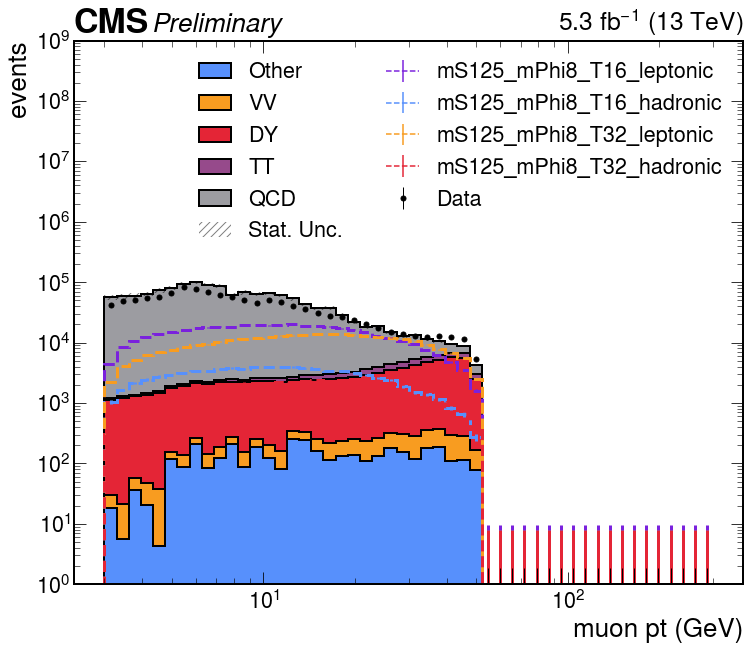

In [69]:
data = 'DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018'
mc_processes = [
    'Other_2018',
    'VV_2018',
    'DY_2018',
    'TT_powheg_2018',
    'QCD_Pt_MuEnriched_2018'
]
mc_labels = [
    'Other',
    'VV',
    'DY',
    'TT',
    'QCD'
]

signal_processes = [
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
]
signal_labels = [
    'mS125_mPhi8_T16_leptonic',
    'mS125_mPhi8_T16_hadronic',
    'mS125_mPhi8_T32_leptonic',
    'mS125_mPhi8_T32_hadronic',    
]


hist_name = 'ip3d_cut_vs_mini_iso_cut_vs_neutral_iso_cut_vs_pt_cut_vs_muon_pt'
slc = (1, 1, 1, 1, slice(None, None, 2j))

hists_mc = []
hist_bkg_total = None

for process in mc_processes:
    h_mc = plots[process][hist_name][slc]
    hists_mc.append(h_mc)
    if hist_bkg_total is None:
        hist_bkg_total = h_mc.copy()
    else:
        hist_bkg_total += h_mc.copy()

h_data = plots[data][hist_name][slc]

hists_signal = []
for process in signal_processes:
    h_signal = plots[process][hist_name][slc]
    hists_signal.append(h_signal)

fig, ax = plt.subplots(figsize=(12,10))

hep.histplot(
    hists_mc, 
    stack=True, 
    label=mc_labels,        
    histtype="fill",
    ec="black",
    lw=2,
    ax=ax,
)

x_hatch = np.vstack(
    (hist_bkg_total.axes[0].edges[:-1], hist_bkg_total.axes[0].edges[1:])
).reshape((-1,), order="F")
y_hatch1 = np.vstack((hist_bkg_total.values(), hist_bkg_total.values())).reshape(
    (-1,), order="F"
)
y_hatch1_unc = np.vstack(
    (np.sqrt(hist_bkg_total.variances()), np.sqrt(hist_bkg_total.variances()))
).reshape((-1,), order="F")
ax.fill_between(
    x=x_hatch,
    y1=y_hatch1 - y_hatch1_unc,
    y2=y_hatch1 + y_hatch1_unc,
    label="Stat. Unc.",
    step="pre",
    facecolor="none",
    edgecolor=(0, 0, 0, 0.5),
    linewidth=0,
    hatch="///",
    zorder=2,
)

hep.histplot(
    hists_signal,
    label=signal_labels,
    lw=3,
    ls="--",
    ax=ax,
)

hep.histplot(
    h_data,
    label=["Data"],
    histtype="errorbar",
    mec="black",
    mfc="black",
    ecolor="black",
    ax=ax
)
    
hep.cms.label(llabel="Preliminary", data=True, lumi=5.3, ax=ax)
plt.ylim(1e0, 1e9)
plt.xscale('log')
plt.yscale('log')
plt.legend(ncol=2)
plt.xlabel("muon pt (GeV)")
plt.ylabel("events")
plt.show()

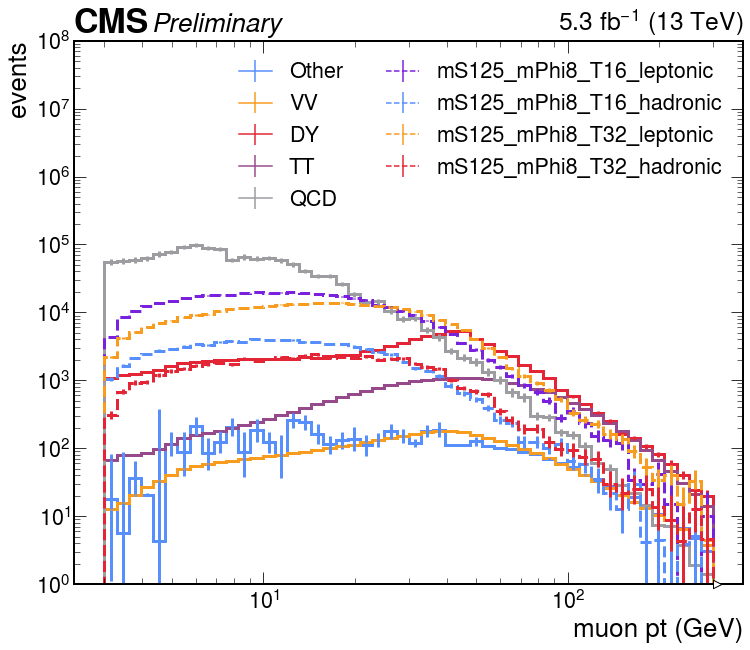

In [90]:
mc_processes = [
    'Other_2018',
    'VV_2018',
    'DY_2018',
    'TT_powheg_2018',
    'QCD_Pt_MuEnriched_2018'
]
mc_labels = [
    'Other',
    'VV',
    'DY',
    'TT',
    'QCD'
]

signal_processes = [
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
]
signal_labels = [
    'mS125_mPhi8_T16_leptonic',
    'mS125_mPhi8_T16_hadronic',
    'mS125_mPhi8_T32_leptonic',
    'mS125_mPhi8_T32_hadronic',    
]


hist_name = 'ip3d_cut_vs_mini_iso_cut_vs_neutral_iso_cut_vs_pt_cut_vs_muon_pt'
slc = (1, 1, 1, 0, slice(None, None, 2j))

hists_mc = []
hist_bkg_total = None

for process in mc_processes:
    h_mc = plots[process][hist_name][slc]
    hists_mc.append(h_mc)

h_data = plots[data][hist_name][slc]

hists_signal = []
for process in signal_processes:
    h_signal = plots[process][hist_name][slc]
    hists_signal.append(h_signal)

fig, ax = plt.subplots(figsize=(12,10))

hep.histplot(
    hists_mc, 
    label=mc_labels,        
    lw=3,
    ax=ax,
)

hep.histplot(
    hists_signal,
    label=signal_labels,
    lw=3,
    ls="--",
    ax=ax,
)
    
hep.cms.label(llabel="Preliminary", data=True, lumi=5.3, ax=ax)
plt.ylim(1e0, 1e8)
plt.xscale('log')
plt.yscale('log')
plt.legend(ncol=2)
plt.xlabel("muon pt (GeV)")
plt.ylabel("events")
plt.show()

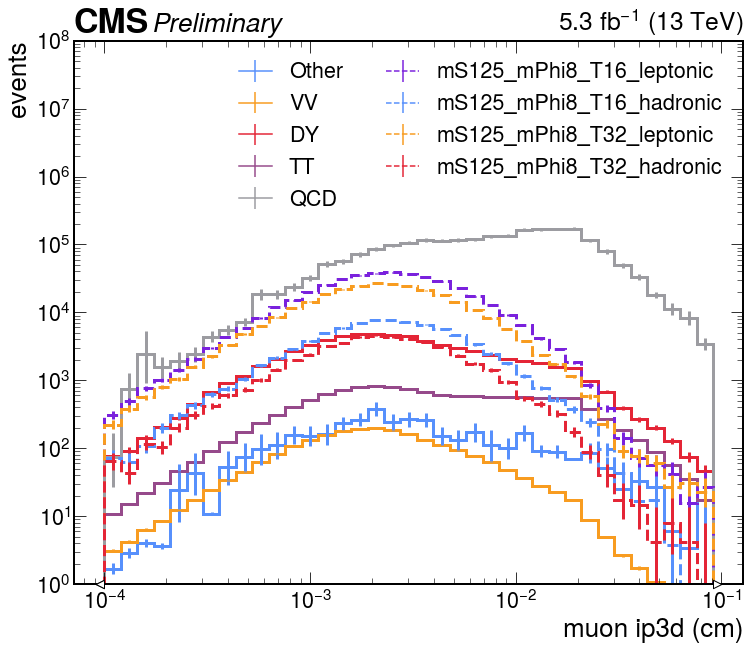

In [89]:
mc_processes = [
    'Other_2018',
    'VV_2018',
    'DY_2018',
    'TT_powheg_2018',
    'QCD_Pt_MuEnriched_2018'
]
mc_labels = [
    'Other',
    'VV',
    'DY',
    'TT',
    'QCD'
]

signal_processes = [
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
]
signal_labels = [
    'mS125_mPhi8_T16_leptonic',
    'mS125_mPhi8_T16_hadronic',
    'mS125_mPhi8_T32_leptonic',
    'mS125_mPhi8_T32_hadronic',    
]


hist_name = 'ip3d_cut_vs_mini_iso_cut_vs_neutral_iso_cut_vs_pt_cut_vs_muon_ip3d'
slc = (0, 1, 1, 1, slice(None, 1e-1j, 2j))

hists_mc = []
hist_bkg_total = None

for process in mc_processes:
    h_mc = plots[process][hist_name][slc]
    hists_mc.append(h_mc)

h_data = plots[data][hist_name][slc]

hists_signal = []
for process in signal_processes:
    h_signal = plots[process][hist_name][slc]
    hists_signal.append(h_signal)

fig, ax = plt.subplots(figsize=(12,10))

hep.histplot(
    hists_mc, 
    label=mc_labels,        
    lw=3,
    ax=ax,
)

hep.histplot(
    hists_signal,
    label=signal_labels,
    lw=3,
    ls="--",
    ax=ax,
)
    
hep.cms.label(llabel="Preliminary", data=True, lumi=5.3, ax=ax)
plt.ylim(1e0, 1e8)
plt.xscale('log')
plt.yscale('log')
plt.legend(ncol=2)
plt.xlabel("muon ip3d (cm)")
plt.ylabel("events")
plt.show()

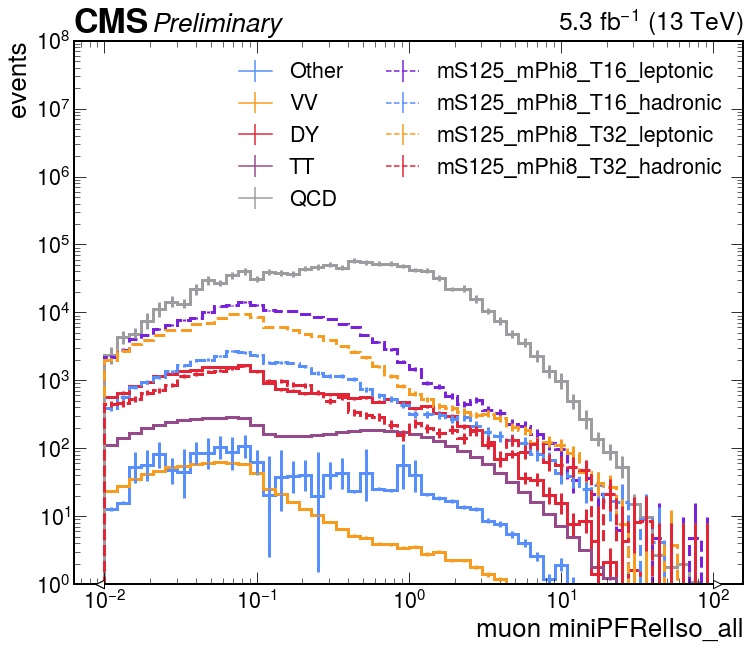

In [91]:
mc_processes = [
    'Other_2018',
    'VV_2018',
    'DY_2018',
    'TT_powheg_2018',
    'QCD_Pt_MuEnriched_2018'
]
mc_labels = [
    'Other',
    'VV',
    'DY',
    'TT',
    'QCD'
]

signal_processes = [
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
]
signal_labels = [
    'mS125_mPhi8_T16_leptonic',
    'mS125_mPhi8_T16_hadronic',
    'mS125_mPhi8_T32_leptonic',
    'mS125_mPhi8_T32_hadronic',    
]


hist_name = 'ip3d_cut_vs_mini_iso_cut_vs_neutral_iso_cut_vs_pt_cut_vs_muon_miniPFRelIso_all'
slc = (1, 0, 1, 1, slice(None, None, 2j))

hists_mc = []
hist_bkg_total = None

for process in mc_processes:
    h_mc = plots[process][hist_name][slc]
    hists_mc.append(h_mc)

h_data = plots[data][hist_name][slc]

hists_signal = []
for process in signal_processes:
    h_signal = plots[process][hist_name][slc]
    hists_signal.append(h_signal)

fig, ax = plt.subplots(figsize=(12,10))

hep.histplot(
    hists_mc, 
    label=mc_labels,        
    lw=3,
    ax=ax,
)

hep.histplot(
    hists_signal,
    label=signal_labels,
    lw=3,
    ls="--",
    ax=ax,
)
    
hep.cms.label(llabel="Preliminary", data=True, lumi=5.3, ax=ax)
plt.ylim(1e0, 1e8)
plt.xscale('log')
plt.yscale('log')
plt.legend(ncol=2)
plt.xlabel("muon miniPFRelIso_all")
plt.ylabel("events")
plt.show()

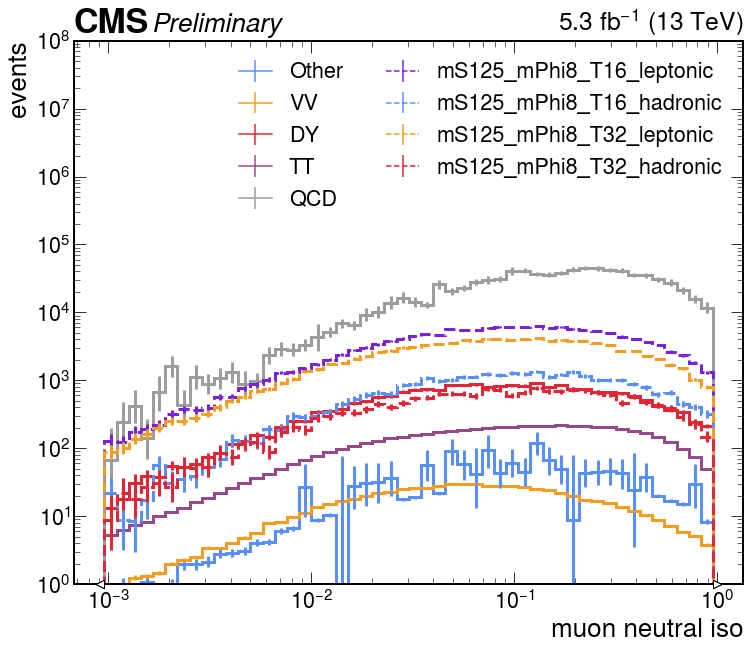

In [96]:
mc_processes = [
    'Other_2018',
    'VV_2018',
    'DY_2018',
    'TT_powheg_2018',
    'QCD_Pt_MuEnriched_2018'
]
mc_labels = [
    'Other',
    'VV',
    'DY',
    'TT',
    'QCD'
]

signal_processes = [
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modehadronic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
]
signal_labels = [
    'mS125_mPhi8_T16_leptonic',
    'mS125_mPhi8_T16_hadronic',
    'mS125_mPhi8_T32_leptonic',
    'mS125_mPhi8_T32_hadronic',    
]


hist_name = 'ip3d_cut_vs_mini_iso_cut_vs_neutral_iso_cut_vs_pt_cut_vs_muon_neutral_iso'
slc = (1, 1, 0, 1, slice(1e-3j, 1j, 1j))

hists_mc = []
hist_bkg_total = None

for process in mc_processes:
    h_mc = plots[process][hist_name][slc]
    hists_mc.append(h_mc)

h_data = plots[data][hist_name][slc]

hists_signal = []
for process in signal_processes:
    h_signal = plots[process][hist_name][slc]
    hists_signal.append(h_signal)

fig, ax = plt.subplots(figsize=(12,10))

hep.histplot(
    hists_mc, 
    label=mc_labels,        
    lw=3,
    ax=ax,
)

hep.histplot(
    hists_signal,
    label=signal_labels,
    lw=3,
    ls="--",
    ax=ax,
)
    
hep.cms.label(llabel="Preliminary", data=True, lumi=5.3, ax=ax)
plt.ylim(1e0, 1e8)
plt.xscale('log')
plt.yscale('log')
plt.legend(ncol=2)
plt.xlabel("muon neutral iso")
plt.ylabel("events")
plt.show()

In [30]:
print(
    round(
        plots[
            "GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018"
        ]["nMuon_inv_vs_nMuon_tight_vs_nMuon"].sum().value
    )
)

1225551

In [32]:
# ggF xs (pb) * BR(H–>4mu) * 2018 lumi (1/pb)
print(round(45.2 * 55000))

# ggF xs (pb) * BR(H–>4mu) * 2018 lumi (1/pb)
print(round(45.2 * 5.5e-5 * 55000))

2486000

137

In [47]:
list(itertools.product([False, True], repeat=3))

[(False, False, False),
 (False, False, True),
 (False, True, False),
 (False, True, True),
 (True, False, False),
 (True, False, True),
 (True, True, False),
 (True, True, True)]

In [49]:
import awkward as ak

<Array [] type='0 * unknown'>

In [53]:
False & ak.Array([True, False])

<Array [False, False] type='2 * bool'>

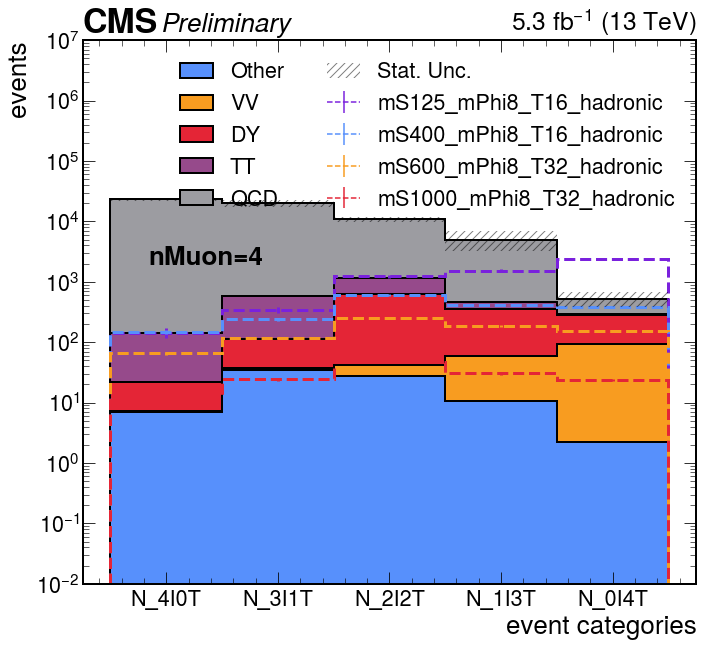

In [94]:
mc_processes = [
    'Other_2018',
    'VV_2018',
    'DY_2018',
    'TT_powheg_2018',
    'QCD_Pt_MuEnriched_2018'
]
mc_labels = [
    'Other',
    'VV',
    'DY',
    'TT',
    'QCD'
]

signal_processes = [
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
    'GluGluToSUEP_mS400.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
    'GluGluToSUEP_mS600.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
    'GluGluToSUEP_mS1000.000_mPhi8.000_T32.000_modehadronic_13TeV_2018',
]
signal_labels = [
    'mS125_mPhi8_T16_hadronic',
    'mS400_mPhi8_T16_hadronic',
    'mS600_mPhi8_T32_hadronic',
    'mS1000_mPhi8_T32_hadronic',    
]


hist_name = 'nMuon_inv_vs_nMuon_tight_vs_nMuon'

nMuon = 4

fig, ax = plt.subplots(figsize=(10+nMuon-3,10))

hists_mc = []
hist_bkg_total = None

for process in mc_processes:
    N_mc = plots[process][hist_name][..., nMuon*1j]
    h_mc = hist.Hist.new.StrCategory(
        [f"N_{nMuon - i}I{i}T" for i in range(nMuon + 1)], name="event categories"
    ).Weight()
    for m in range(nMuon + 1):
        k = nMuon - m
        h_mc[f"N_{k}I{m}T"] = N_mc[k*1j, m*1j]
    hists_mc.append(h_mc)
    if hist_bkg_total is None:
        hist_bkg_total = h_mc.copy()
    else:
        hist_bkg_total += h_mc.copy()

N_data = plots[data][hist_name][..., nMuon*1j]
h_data = hist_bkg_total.copy().reset()
for m in range(nMuon + 1):
    k = nMuon - m
    h_data[f"N_{k}I{m}T"] = N_data[k*1j, m*1j]

hep.histplot(
    hists_mc, 
    stack=True, 
    label=mc_labels,        
    histtype="fill",
    ec="black",
    lw=2,
    ax=ax,
)

x_hatch = np.vstack(
    (hist_bkg_total.axes[0].edges[:-1], hist_bkg_total.axes[0].edges[1:])
).reshape((-1,), order="F")
y_hatch1 = np.vstack((hist_bkg_total.values(), hist_bkg_total.values())).reshape(
    (-1,), order="F"
)
y_hatch1_unc = np.vstack(
    (np.sqrt(hist_bkg_total.variances()), np.sqrt(hist_bkg_total.variances()))
).reshape((-1,), order="F")
ax.fill_between(
    x=x_hatch,
    y1=y_hatch1 - y_hatch1_unc,
    y2=y_hatch1 + y_hatch1_unc,
    label="Stat. Unc.",
    step="pre",
    facecolor="none",
    edgecolor=(0, 0, 0, 0.5),
    linewidth=0,
    hatch="///",
    zorder=2,
)

hists_signal = []
for process in signal_processes:
    N_signal = plots[process][hist_name][..., nMuon*1j]
    h_signal = hist.Hist.new.StrCategory(
        [f"N_{nMuon - i}I{i}T" for i in range(nMuon + 1)], name="event categories"
    ).Weight()
    for m in range(nMuon + 1):
        k = nMuon - m
        h_signal[f"N_{k}I{m}T"] = N_signal[k*1j, m*1j]
    hists_signal.append(h_signal)

hep.histplot(
    hists_signal,
    label=signal_labels,
    lw=3,
    ls="--",
    ax=ax,
)

    
hep.cms.label(llabel="Preliminary", data=True, lumi=5.3, ax=ax)
plt.ylim(1e-2, 1e7)
plt.yscale('log')
plt.legend(ncol=2)
plt.xlabel("event categories")
plt.ylabel("events")
plt.text(
    0.2, 0.6, f"nMuon={nMuon}", horizontalalignment='center',
    verticalalignment='center', transform=ax.transAxes, fontweight='bold'
)
plt.show()

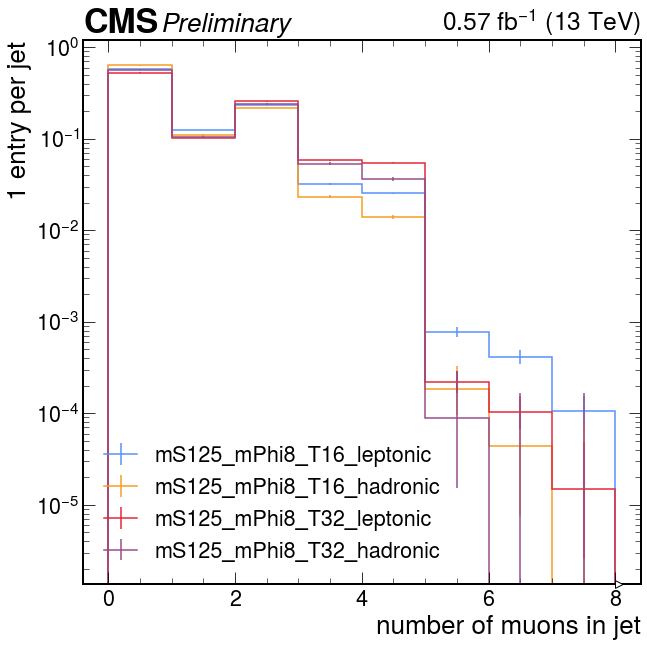

In [41]:
plots[
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018'
]['nMuons_per_jet_vs_nMuon'][:, ::sum].plot(density=True, label="mS125_mPhi8_T16_leptonic")
plots[
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modehadronic_13TeV_2018'
]['nMuons_per_jet_vs_nMuon'][:, ::sum].plot(density=True, label="mS125_mPhi8_T16_hadronic")
plots[
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018'
]['nMuons_per_jet_vs_nMuon'][:, ::sum].plot(density=True, label="mS125_mPhi8_T32_leptonic")
plots[
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modehadronic_13TeV_2018'
]['nMuons_per_jet_vs_nMuon'][:, ::sum].plot(density=True, label="mS125_mPhi8_T32_hadronic")
plt.yscale('log')
plt.xlabel("number of muons in jet")
plt.ylabel("1 entry per jet")
hep.cms.label(llabel="Preliminary", data=True, lumi=0.57)
plt.legend()
plt.show()

In [44]:
print(plots[
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018'
]['nMuons_per_jet_vs_nMuon'][::sum, ::sum])
print(plots[
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018'
]['nMuons_per_jet_vs_nMuon'][3j::sum, ::sum])

WeightedSum(value=29572.7, variance=12164.4)

WeightedSum(value=3356.78, variance=1374.99)

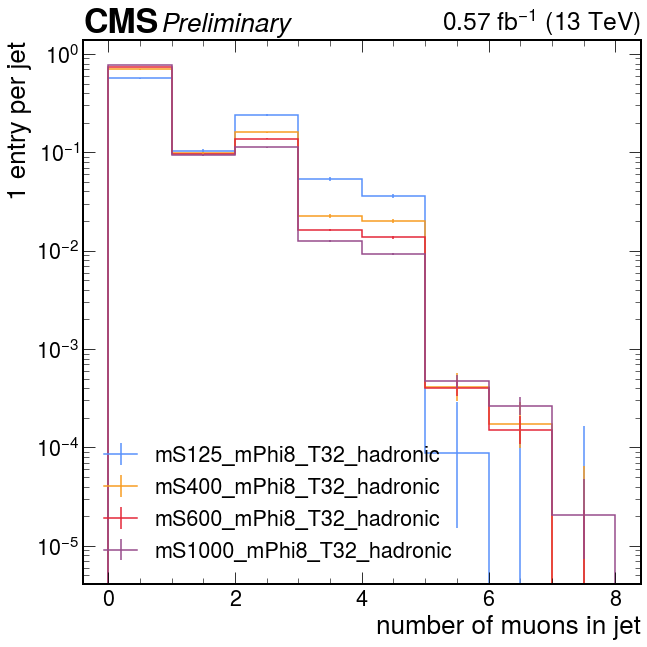

In [34]:
plots[
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modehadronic_13TeV_2018'
]['nMuons_per_jet_vs_nMuon'][:, ::sum].plot(density=True, label="mS125_mPhi8_T32_hadronic")
plots[
    'GluGluToSUEP_mS400.000_mPhi8.000_T32.000_modehadronic_13TeV_2018'
]['nMuons_per_jet_vs_nMuon'][:, ::sum].plot(density=True, label="mS400_mPhi8_T32_hadronic")
plots[
    'GluGluToSUEP_mS600.000_mPhi8.000_T32.000_modehadronic_13TeV_2018'
]['nMuons_per_jet_vs_nMuon'][:, ::sum].plot(density=True, label="mS600_mPhi8_T32_hadronic")
plots[
    'GluGluToSUEP_mS1000.000_mPhi8.000_T32.000_modehadronic_13TeV_2018'
]['nMuons_per_jet_vs_nMuon'][:, ::sum].plot(density=True, label="mS1000_mPhi8_T32_hadronic")
plt.yscale('log')
plt.xlabel("number of muons in jet")
plt.ylabel("1 entry per jet")
hep.cms.label(llabel="Preliminary", data=True, lumi=0.57)
plt.legend()
plt.show()

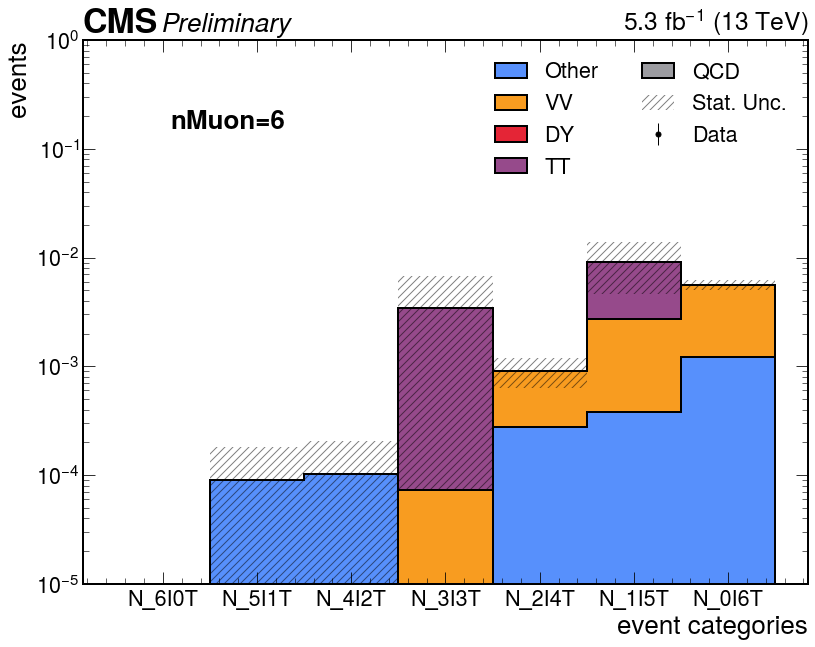

In [37]:
data = "DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018"
mc_processes = [
    'Other_2018',
    'VV_2018',
    'DY_2018',
    'TT_powheg_2018',
    'QCD_Pt_MuEnriched_2018'
]

mc_labels = [
    'Other',
    'VV',
    'DY',
    'TT',
    'QCD'
]


hist_name = 'nMuon_inv_vs_nMuon_tight_vs_nMuon'

nMuon = 6

fig, ax = plt.subplots(figsize=(10+nMuon-3,10))

hists_mc = []
hist_bkg_total = None

for process in mc_processes:
    N_mc = plots[process][hist_name][..., nMuon*1j]
    h_mc = hist.Hist.new.StrCategory(
        [f"N_{nMuon - i}I{i}T" for i in range(nMuon + 1)], name="event categories"
    ).Weight()
    for m in range(nMuon + 1):
        k = nMuon - m
        h_mc[f"N_{k}I{m}T"] = N_mc[k*1j, m*1j]
    hists_mc.append(h_mc)
    if hist_bkg_total is None:
        hist_bkg_total = h_mc.copy()
    else:
        hist_bkg_total += h_mc.copy()

N_data = plots[data][hist_name][..., nMuon*1j]
h_data = hist_bkg_total.copy().reset()
for m in range(nMuon + 1):
    k = nMuon - m
    h_data[f"N_{k}I{m}T"] = N_data[k*1j, m*1j]

hep.histplot(
    hists_mc, 
    stack=True, 
    label=mc_labels,        
    histtype="fill",
    ec="black",
    lw=2,
    ax=ax,
)

x_hatch = np.vstack(
    (hist_bkg_total.axes[0].edges[:-1], hist_bkg_total.axes[0].edges[1:])
).reshape((-1,), order="F")
y_hatch1 = np.vstack((hist_bkg_total.values(), hist_bkg_total.values())).reshape(
    (-1,), order="F"
)
y_hatch1_unc = np.vstack(
    (np.sqrt(hist_bkg_total.variances()), np.sqrt(hist_bkg_total.variances()))
).reshape((-1,), order="F")
ax.fill_between(
    x=x_hatch,
    y1=y_hatch1 - y_hatch1_unc,
    y2=y_hatch1 + y_hatch1_unc,
    label="Stat. Unc.",
    step="pre",
    facecolor="none",
    edgecolor=(0, 0, 0, 0.5),
    linewidth=0,
    hatch="///",
    zorder=2,
)

hep.histplot(
    h_data,
    label=["Data"],
    histtype="errorbar",
    mec="black",
    mfc="black",
    ecolor="black",
    ax=ax
)

hep.cms.label(llabel="Preliminary", data=True, lumi=5.3, ax=ax)
plt.ylim(1e-5, 1e0)
plt.yscale('log')
plt.legend(ncol=2)
plt.xlabel("event categories")
plt.ylabel("events")
plt.text(
    0.2, 0.85, f"nMuon={nMuon}", horizontalalignment='center',
    verticalalignment='center', transform=ax.transAxes, fontweight='bold'
)
plt.show()

In [18]:
hist.Hist.new.Reg(9, 3, 300, transform=hist.axis.transform.log).Double().axes[0].edges

array([  3.        ,   5.00430161,   8.34767821,  13.9247665 ,
        23.22791048,  38.74648995,  64.6330407 , 107.81440991,
       179.8452751 , 300.        ])

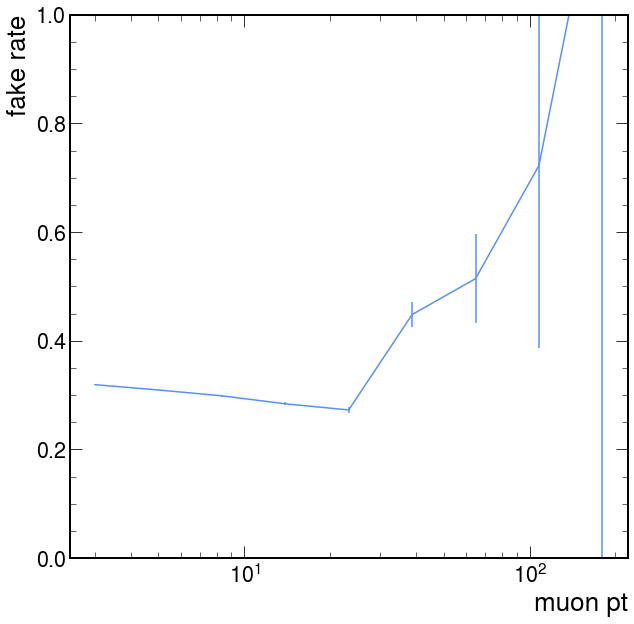

In [95]:
f_values = []
delta_f_values = []
histogram = plots['data_non_qcd_subtracted']['check_pt_dependency'][..., ::sum]
pt_values = np.logspace(np.log10(3), np.log10(300), 10)[:-1]
for pt_i, pt in enumerate(pt_values):
    nTights = 0
    nTights_var = 0
    nAll = 0
    nAll_var = 0
    for j in range(8):
        nTights += j * histogram[pt_i, j, ::sum].value
        nTights_var += j * histogram[pt_i, j, ::sum].variance
        nAll += (
            j * histogram[pt_i, j, ::sum].value
            + j * histogram[pt_i, ::sum, j].value
        )
        nAll_var += (
            j * histogram[pt_i, j, ::sum].variance
            + j * histogram[pt_i, ::sum, j].variance
        )
    f = nTights / nAll
    delta_f = np.sqrt( nTights_var / nAll**2 + f**2 * nAll_var / nAll**2 )
    f_values.append(f)
    delta_f_values.append(delta_f)

plt.errorbar(pt_values, f_values, yerr=delta_f_values)
plt.xscale('log')
plt.xlabel('muon pt')
plt.ylabel('fake rate')
plt.ylim(0, 1)
plt.show()

In [25]:
plots['data_non_qcd_subtracted']['check_pt_dependency'][::sum, ::sum, ::sum, 3j]

WeightedSum(value=824.917, variance=831.267)

In [15]:
plots['QCD_Pt_MuEnriched_2018']['full_method_hist']

Hist(
  Regular(8, 0, 8, name='nMuon_tight_l2'),
  Regular(8, 0, 8, name='nMuon_inverse_l2'),
  Regular(4, 0, 4, name='nJet_2T_muons'),
  Regular(4, 0, 4, name='nJet_2I_muons'),
  Regular(4, 0, 4, name='nJet_1I1T_muons'),
  Regular(8, 0, 8, name='nMuon'),
  storage=Weight()) # Sum: WeightedSum(value=26490.8, variance=1.48947e+06)

In [63]:
# Let's do everything manually
histogram = plots['data_non_qcd_subtracted']['full_method_hist']
#histogram = plots['QCD_Pt_MuEnriched_2018']['full_method_hist']

# Begin with uncorrelated objects
nTights = 0
nTights_var = 0
nAll = 0
nAll_var = 0
nMuon = 3
for i in range(8):
    nTights += i * histogram[i, ::sum, ::sum, ::sum, ::sum, nMuon*1j].value
    nTights_var += i * histogram[i, ::sum, ::sum, ::sum, ::sum, nMuon*1j].variance
    nAll += (
        i * histogram[i, ::sum, ::sum, ::sum, ::sum, nMuon*1j].value
        + i * histogram[::sum, i, ::sum, ::sum, ::sum, nMuon*1j].value
    )
    nAll_var += (
        i * histogram[i, ::sum, ::sum, ::sum, ::sum, nMuon*1j].variance
        + i * histogram[::sum, i, ::sum, ::sum, ::sum, nMuon*1j].variance
    )
f = nTights / nAll
delta_f = np.sqrt(nTights_var / nAll**2 + nAll_var * (f / nAll)**2)
print("Calculate stuff for uncorrelated muons:")
print(f"{nTights=:.0f} ± {np.sqrt(nTights_var):.3f}")
print(f"{nAll=:.0f} ± {np.sqrt(nAll_var):.3f}")
print(f"{f=:.3f} ± {delta_f:.3f}")

# Now let's move on to jets with two muons
P_2T = 0
P_2I = 0
P_1I1T = 0
P_2T_var = 0
P_2I_var = 0
P_1I1T_var = 0
for i in range(4):
    P_2T += i * histogram[::sum, ::sum, i, ::sum, ::sum, nMuon*1j].value
    P_2I += i * histogram[::sum, ::sum, ::sum, i, ::sum, nMuon*1j].value
    P_1I1T += i * histogram[::sum, ::sum, ::sum, ::sum, i, nMuon*1j].value
    P_2T_var += i * histogram[::sum, ::sum, i, ::sum, ::sum, nMuon*1j].variance
    P_2I_var += i * histogram[::sum, ::sum, ::sum, i, ::sum, nMuon*1j].variance
    P_1I1T_var += i * histogram[::sum, ::sum, ::sum, ::sum, i, nMuon*1j].variance
N_all_jets = P_2T + P_2I + P_1I1T
N_all_jets_var = P_2T_var + P_2I_var + P_1I1T_var
P_2T /= N_all_jets
P_2I /= N_all_jets
P_1I1T /= N_all_jets
P_2T_var = np.sqrt(P_2T_var / N_all_jets**2 + N_all_jets_var * (P_2T / N_all_jets)**2)
P_2I_var = np.sqrt(P_2I_var / N_all_jets**2 + N_all_jets_var * (P_2I / N_all_jets)**2)
P_1I1T_var = np.sqrt(P_1I1T_var / N_all_jets**2 + N_all_jets_var * (P_1I1T / N_all_jets)**2)
print(60 * "–")
print("Calculate stuff for muons in jets with two muons (correlated):")
print(f"{P_2T=:.3f} ± {P_2T_var:.3f}")
print(f"{P_2I=:.3f} ± {P_2I_var:.3f}")
print(f"{P_1I1T=:.3f} ± {P_1I1T_var:.3f}")
print(f"α = {P_2I:.3f} ± {P_2I_var:.3f}")
print(f"ρ = {(P_2I - (1-f)**2) / (f*(1-f)):.3f}")
f1 = 1 - P_2I - P_1I1T/2
print(f"f1 = {f1:.3f} ± {0.5 * np.sqrt(P_2I_var + P_1I1T_var):.3f}")
print(f"f2 = {(1 - P_2I + P_2T)/2:.3f} ± {0.5 * np.sqrt(P_2I_var + P_2T_var):.3f}")
print(f"ρ = {(P_2I - (1-f1)**2) / (f1*(1-f1)):.3f}")
print(60 * "–")
print("Now take f from uncorrelated case and calculate α base on it:")
print(f"α1 = {P_2I:.3f} ± {P_2I_var:.3f}")
print(f"α2 = {1 - f - P_1I1T / 2:.3f} ± {np.sqrt(delta_f**2 + P_1I1T_var/4):.3f}")
print(f"α3 = {1 + P_2T - 2 * f:.3f} ± {np.sqrt(4 * delta_f**2 + P_2T_var):.3f}")

Calculate stuff for uncorrelated muons:

nTights=551569 ± 825.702

nAll=885130 ± 1018.909

f=0.623 ± 0.001

––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

Calculate stuff for muons in jets with two muons (correlated):

P_2T=0.435 ± 0.003

P_2I=0.224 ± 0.002

P_1I1T=0.341 ± 0.002

α = 0.224 ± 0.002

ρ = 0.349

f1 = 0.606 ± 0.030

f2 = 0.606 ± 0.032

ρ = 0.286

––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

Now take f from uncorrelated case and calculate α base on it:

α1 = 0.224 ± 0.002

α2 = 0.206 ± 0.023

α3 = 0.189 ± 0.051

In [42]:
type((1., 1.))

tuple

In [46]:
binom(2, 3)

0.0

In [60]:
def binomial(m, n, f):
    """
    Will return the probability for m successes out n trials given a success rate f.
    
    If f is a tuple (value & uncertainty) it will also return 
    a tuple (probability value & uncertainty).
    """
    if type(f) == tuple:
        value = binom(n, m) * f[0]**m * (1 - f[0])**(n - m)
        unc = binom(n, m) * abs(m - n * f[0]) * f[0]**(m - 1) * (1 - f[0])**(n - m - 1) * f[1]
        return (value, unc)
    return binom(n, m) * f**m * (1 - f)**(n - m)
    

def corr_binomial(y1, y2, n, f, alpha):
    """
    Will return the probability for y1 and y2 successes out n trials for two 
    correlated Bernoulli variables given a success rate f and correlation parameter 
    alpha.
    
    If f and alpha are tuples (value & uncertainty) it will also return 
    a tuple (probability value & uncertainty).
    """
    f_y1y2 = 0
    df_y1y2_df = 0
    df_y1y2_dalpha = 0
    do_unc = False
    if type(f) is tuple and type(alpha) is tuple:
        do_unc = True
    if type(f) is tuple:
        f, delta_f = f
    if type(alpha) is tuple:
        alpha, delta_alpha = alpha
    min_j1 = max(y1 + y2 - n, 0)
    max_j1 = min(y1, y2)
    for j1 in range(min_j1, max_j1+1):
        j2 = y2 - j1
        f_y1y2 += (
            (1 + alpha)**(-n) * binom(n, y1) * binom(y1, j1) * binom(n - y1, j2) 
            * (f + alpha)**j1 * (1 - f)**(n - j1) * f**(y1 + j2) * (1 - f + alpha)**(n - y1 - j2)
        )
        
        df_y1y2_df += (
            (1 + alpha)**(-n) * binom(n, y1) * binom(y1, j1) * binom(n - y1, j2) 
            * (f + alpha)**(1 - j1) * (1 - f)**(n - j1 - 1) 
            * f**(y1 - j2 - 1) * (1- f + alpha)**(n - y1 - j2 - 1)
            * (
                alpha**2 * (f * (j1 + j2 - n - y1) - j2 + y1) 
                + alpha * (f**2 * (n - j1 - j2 - y1) + 2 * f * (j1 + j2 - n) - j2 + y1) 
                + (1 - f) * f * (2 * f * (j2 - n) + j1 - j2 + y1)
            )
        )
        df_y1y2_dalpha += (
            binom(n, y1) * binom(y1, j1) * binom(n - y1, j2) 
            * (1 + alpha)**(-n - 1) * (f + alpha)**(j1 - 1) * (1 - f)**(n - j1) 
            * f**(y1 - j2) * (1 - f + alpha)**(-j2 + n - y1 - 1)
            * ((1 + alpha) * j1 * (1 - f + alpha) - (f + alpha) * (alpha * j2 + alpha * y1 - f * n + j2 + y1))
        )
    
    if do_unc:
        return (f_y1y2, np.sqrt((df_y1y2_df * delta_f)**2 + (df_y1y2_dalpha * delta_alpha)**2))
    return f_y1y2

In [62]:
# For alpha = 1.4, fake rate = 0.6
# What's the probability to have 1 + 1 tight when looking at 2 2-muon jets
corr_binomial(0, 0, 1, (0.6, 0.01), (1.4, 0.01))

(0.3, 0.036669034014486325)

In [39]:
# Suppose you have a bunch of events with two uncorr muons and one two-muon jet
# How are these going to be distributed?
binom(2, i) * f**i * (1-f)**(2-i) for i in [0, 1, 2]

x

corr_binomial(i, j, 1, 0.6, 1.4) for i, j in [0, 1] x [0, 1] 

0.5

## Try to apply the full method

In [38]:
n_corr_tight = 0
n_corr_inverse = 4

i_min = max(int((n_corr_tight-n_corr_inverse)/2), 0)
i_max = min(int((n_corr_tight+n_corr_inverse)/2), n_corr_tight)
for i in range(i_min, i_max + 1):
    print(f"({i}, {n_corr_tight - i}, {int((n_corr_tight+n_corr_inverse)/2)})")

(0, 0, 2)

In [56]:
binom(2, 1)

2.0

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f29c8891750>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f29c88b6c10>, text=[])

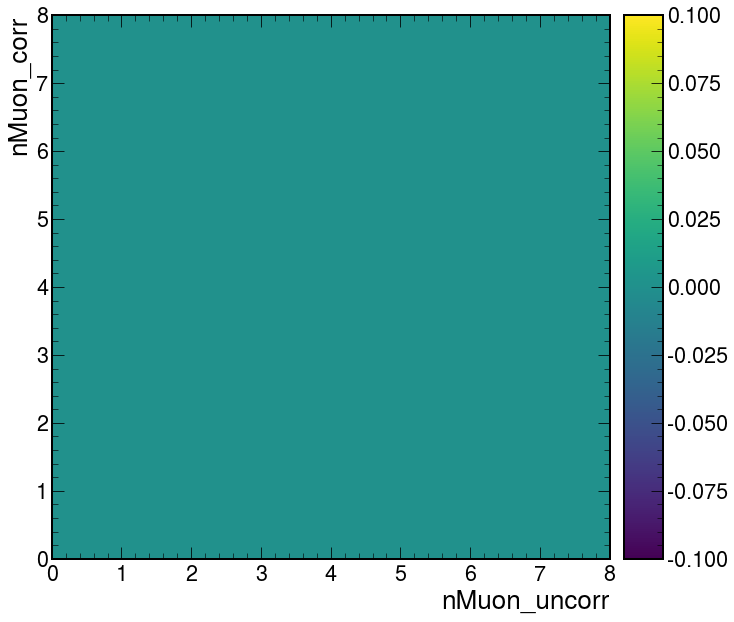

In [39]:
plots["DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018"]['full_method_hist_inference'][..., 6j].plot()

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f29ca519ed0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f2a12653050>, text=[])

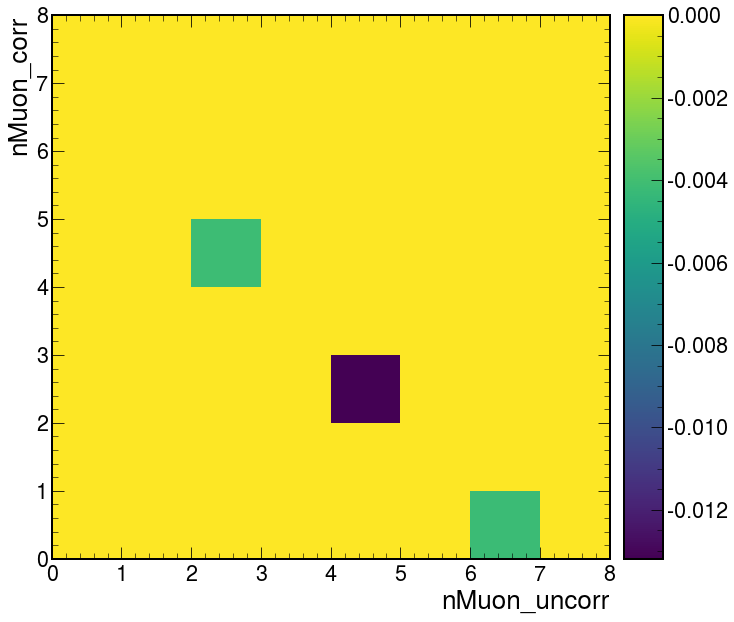

In [38]:
plots["data_non_qcd_subtracted"]['full_method_hist_inference'][..., 6j].plot()

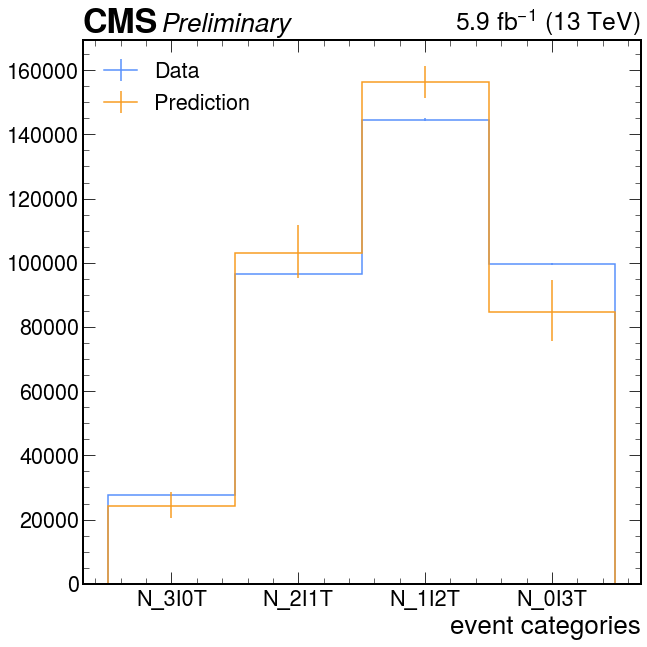

In [79]:
dataset = "data_non_qcd_subtracted"
debug = False

# Suppose that we are working with events with 3 muons
nMuon = 3

# Get the histogram
h_in = plots[dataset]['full_method_hist_inference'][..., nMuon*1j]

# Final histogram is:
h_out = hist.Hist.new.StrCategory(
    [f"N_{nMuon-i}I{i}T" for i in range(nMuon+1)], name="event categories"
).Weight()

# Let's assume f and alpha to be known numbers
f = (0.606, 0.030)
alpha = (0.206, 0.023)

# First, we want to go over the uncorrelated muons. That should be just a simple binomial.
# Be careful, since we also have the correlated muons in the jets, the number of uncorrelated 
# muons is nMuon - nMuon_corr where nMuon_corr is a multiple of 2. It's better to keep the 2D 
# histogram and perform the binomial calculation on it.

for nMuon_corr in range(0, nMuon + 1, 2):
    nMuon_uncorr = nMuon - nMuon_corr
    if debug:
        print(f"Going for {nMuon_uncorr} uncorrelated and {nMuon_corr} correlated:")
    N = h_in[nMuon_uncorr, nMuon_corr] 
    for nMuon_tight_uncorr in range(nMuon_uncorr + 1):
        nMuon_inverse_uncorr = nMuon_uncorr - nMuon_tight_uncorr
        for nMuon_tight_corr in range(nMuon_corr + 1):
            nMuon_inverse_corr = nMuon_corr - nMuon_tight_corr
            nMuon_tight = nMuon_tight_uncorr + nMuon_tight_corr
            nMuon_inverse = nMuon_inverse_uncorr + nMuon_inverse_corr
            if debug:
                print(
                    f"\t{nMuon_inverse_uncorr}I{nMuon_tight_uncorr}T "
                    f"{nMuon_inverse_corr}I{nMuon_tight_corr}T",
                    "––>", f"N_{nMuon_inverse}I{nMuon_tight}T"
                )
                print(
                    f"\th_out['N_{nMuon_inverse}I{nMuon_tight}T'] "
                    f"+= N * binomial({nMuon_tight_uncorr}, {nMuon_uncorr}, p) * ("
                )
            uncorrelated_prob = binomial(nMuon_tight_uncorr, nMuon_uncorr, f)
            total_correlated_binom_prob = (0, 0)
            i_min = max(int((nMuon_tight_corr-nMuon_inverse_corr)/2), 0)
            i_max = min(int((nMuon_tight_corr+nMuon_inverse_corr)/2), nMuon_tight_corr)
            for i in range(i_min, i_max + 1):
                corr_binom_prob = corr_binomial(
                    i, nMuon_tight_corr - i, int(nMuon_corr/2), f, alpha
                )
                total_correlated_binom_prob = (
                    total_correlated_binom_prob[0] + corr_binom_prob[0],
                    total_correlated_binom_prob[1] + corr_binom_prob[1]
                )
                    
                if debug:
                    if i < i_max:
                        print(f"\t\tcorr_binomial({i}, {nMuon_tight_corr - i}, {int(nMuon_corr/2)}, f, alpha) +")
                    else:
                        print(f"\t\tcorr_binomial({i}, {nMuon_tight_corr - i}, {int(nMuon_corr/2)}, f, alpha)")
            if debug:
                print(
                    f"\t) = {N.value:.3f} * {uncorrelated_prob[0]:.3f} * {total_correlated_binom_prob[0]:.3f} "
                    f"= {N.value * uncorrelated_prob[0] * total_correlated_binom_prob[0]:.3f}"
                )
            final_value = N.value * uncorrelated_prob[0] * total_correlated_binom_prob[0]
            final_unc = np.sqrt(
                N.variance * (uncorrelated_prob[0] * total_correlated_binom_prob[0])**2
                + (N.value * uncorrelated_prob[1] * total_correlated_binom_prob[0])**2
                + (N.value * uncorrelated_prob[0] * total_correlated_binom_prob[1])**2
            )
            
            h_out[f"N_{nMuon_inverse}I{nMuon_tight}T"] = (
                h_out[f"N_{nMuon_inverse}I{nMuon_tight}T"].value 
                + final_value, 
                h_out[f"N_{nMuon_inverse}I{nMuon_tight}T"].variance 
                + final_unc**2, 
            )

            
N_hist = plots[dataset]["nMuon_inv_vs_nMuon_tight_vs_nMuon"][..., nMuon*1j]
h = hist.Hist.new.StrCategory(
    [f"N_{nMuon-i}I{i}T" for i in range(nMuon+1)], name="event categories"
).Weight()
for m in range(nMuon+1):
    k = nMuon - m
    h[f"N_{m}I{k}T"] = N_hist[m*1j, k*1j]

density=False
h.plot(density=density, label="Data")
h_out.plot(density=density, label="Prediction")
#plt.ylabel("density")
plt.xlabel("event categories")
hep.cms.label(llabel="Preliminary", data=True, lumi=5.9)
plt.legend()
plt.show()

In [74]:
h_out

Hist(StrCategory(['N_4I0T', 'N_3I1T', 'N_2I2T', 'N_1I3T', 'N_0I4T'], name='event categories'), storage=Weight()) # Sum: WeightedSum(value=6527.56, variance=48505.6)

In [35]:
h_in

Hist(
  Regular(8, 0, 8, name='nMuon_tight_l2'),
  Regular(8, 0, 8, name='nMuon_inverse_l2'),
  Regular(4, 0, 4, name='nJet_2T_muons'),
  Regular(4, 0, 4, name='nJet_2I_muons'),
  Regular(4, 0, 4, name='nJet_1I1T_muons'),
  storage=Weight()) # Sum: WeightedSum(value=42817, variance=45342.6)

In [49]:
# Can we validate the histogram to make sure everything makes sense?
h_in = plots['data_non_qcd_subtracted']['full_method_hist'][..., 3j]

# Define an out histogram that will look like the old ones
h_out = hist.Hist.new.Regular(
    20, 0, 20, name="nMuon_tight", label="nMuon_tight"
).Regular(
    20, 0, 20, name="nMuon_inv", label="nMuon_inv"
).Weight()

# Let's add the last 3 axes back to the first two to recreate the old histograms
for nMuon_tight_l2 in range(8):
    for nMuon_inverse_l2 in range(8):
        for nJet_2T_muons in range(4):
            for nJet_2I_muons in range(4):
                for nJet_1I1T_muons in range(4):
                    nMuon_tight = nMuon_tight_l2 + 2 * nJet_2T_muons + nJet_1I1T_muons
                    nMuon_inv = nMuon_inverse_l2 + 2 * nJet_2I_muons + nJet_1I1T_muons
                    bin_i = h_in[
                        nMuon_tight_l2, nMuon_inverse_l2, nJet_2T_muons, nJet_2I_muons, nJet_1I1T_muons
                    ]
                    h_out[nMuon_tight, nMuon_inv] = (
                        h_out[nMuon_tight, nMuon_inv].value + bin_i.value, 
                        h_out[nMuon_tight, nMuon_inv].variance + bin_i.variance
                    )

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f77dc75e510>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f774f359250>, text=[])

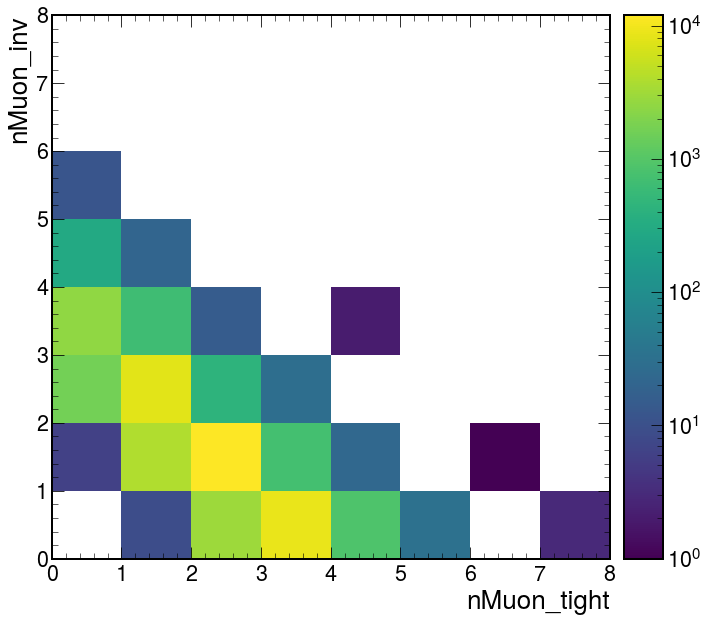

In [55]:
h_out[:8, :8].plot(norm=mpl.colors.LogNorm())

In [19]:
def get_correlated_params(h):
    alpha = h["N_2I0T"].value
    delta_alpha = np.sqrt(h["N_2I0T"].variance)
    p1 = 1 - h["N_1I1T"].value / 2 - h["N_1I1T"].value
    delta_p1 = np.sqrt(h["N_1I1T"].variance / 4 + h["N_1I1T"].variance)
    p2 = (1 + h["N_0I2T"].value - h["N_2I0T"].value) / 2
    delta_p2 = 0.5 * np.sqrt(h["N_0I2T"].variance + h["N_2I0T"].variance)
    return alpha, delta_alpha, p1, delta_p1, p2, delta_p2

In [25]:
def get_correlated_hist(alpha, delta_alpha, p, delta_p):
    h_corr = hist.Hist.new.StrCategory(
        [f"N_{2-i}I{i}T" for i in range(3)], name="categories"
    ).Weight()
    h_corr["N_2I0T"] = (alpha, delta_alpha**2)
    h_corr["N_1I1T"] = (2*(1 - p - alpha), 4*(delta_p**2 + delta_alpha**2))
    h_corr["N_0I2T"] = (2*p + alpha -1, 4*delta_p**2 + delta_alpha**2)
    return h_corr

α = 0.227 ± 0.004

p = 0.602 ± 0.004

ρ = 0.287

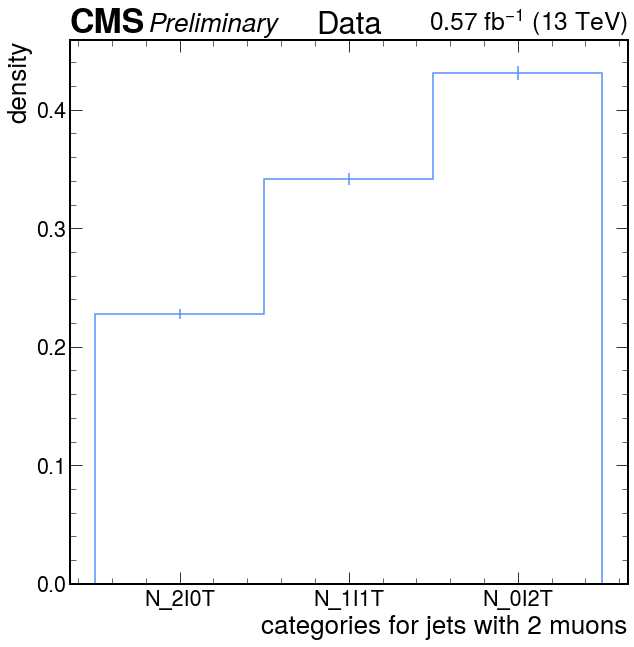

α = 0.304 ± 0.041

p = 0.513 ± 0.027

ρ = 0.268

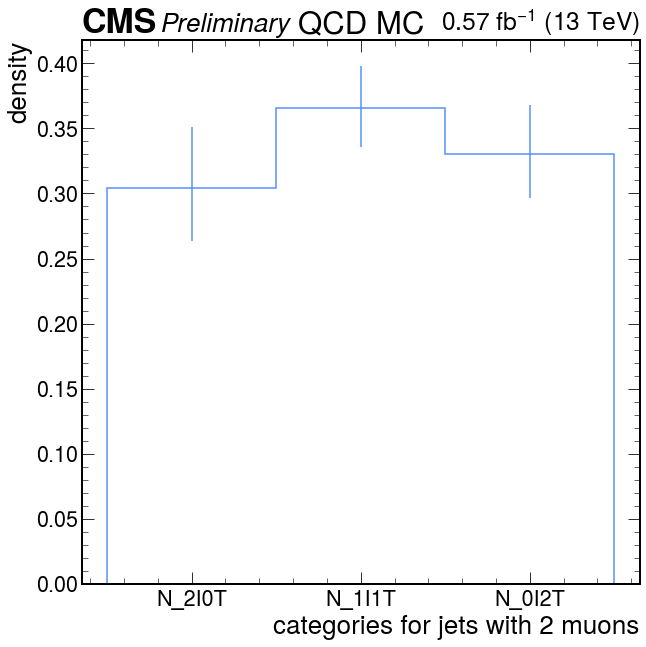

In [31]:
datasets = [
    ("DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018", "Data"),
    ('QCD_Pt_MuEnriched_2018', 'QCD MC')
]

hist_name = 'nMuon_tight_per_jet_vs_nMuon_inverse_per_jet'

for dataset, label in datasets:
    fig, ax = plt.subplots(figsize=(10,10))
    N_hist = plots[dataset][hist_name]
    h = hist.Hist.new.StrCategory(
        [f"N_{2-i}I{i}T" for i in range(3)], name="categories"
    ).Weight()
    for m in range(3):
        k = 2 - m
        h[f"N_{k}I{m}T"] = N_hist[m*1j, k*1j]
    h = h / N_hist.sum().value
    alpha, delta_alpha, p1, delta_p1, p2, delta_p2 = get_correlated_params(h)
    print(f"α = {alpha:.3f} ± {delta_alpha:.3f}")
    #print(f"p1 = {p1:.3f} ± {delta_p1:.3f}")
    print(f"p = {p2:.3f} ± {delta_p2:.3f}")
    #print(f"ρ1 = {(alpha - (1 - p1)**2) / (p1 * (1 - p1)):.3f}")
    print(f"ρ = {(alpha - (1 - p2)**2) / (p2 * (1 - p2)):.3f}")
    h.plot()
    
    h_corr1 = get_correlated_hist(alpha, delta_alpha, p1, delta_p1)
    h_corr2 = get_correlated_hist(alpha, delta_alpha, p2, delta_p2)
    
#     h_corr1.plot()
#     h_corr2.plot()

    plt.xlabel('categories for jets with 2 muons')
    plt.ylabel('density')
    hep.cms.label(llabel="Preliminary", data=True, lumi=0.57)
    plt.title(label)
    plt.show()

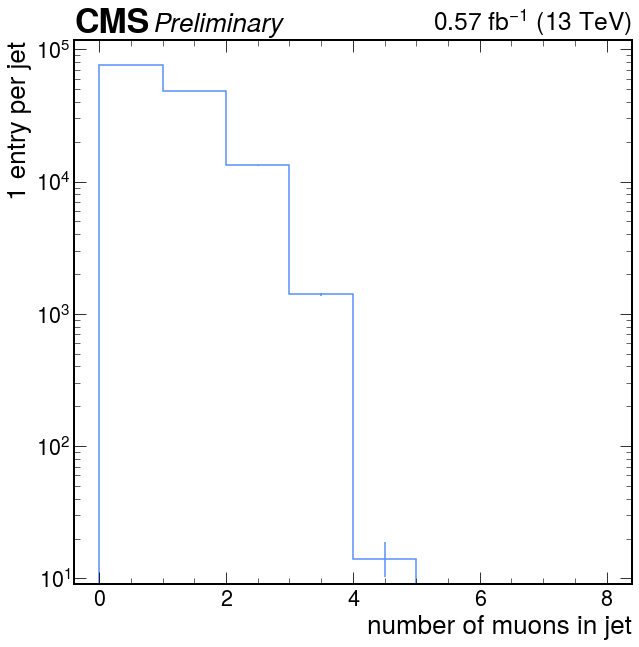

In [22]:
plots[
    'DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018'
]['nMuons_per_jet_vs_nMuon'][:, ::sum].plot()
plt.yscale('log')
plt.xlabel("number of muons in jet")
plt.ylabel("1 entry per jet")
hep.cms.label(llabel="Preliminary", data=True, lumi=0.57)
plt.show()

## ROC curves

In [ ]:
# Define input variables
nTight_cutoff = 3j
nMuon_cutoff = 3j
slc = (slice(None), slice(nTight_cutoff, None, sum), slice(nMuon_cutoff, None, sum))
bkg_dataset = 'QCD_Pt_MuEnriched_2018'
# bkg_dataset = 'DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018'
signal_dataset = 'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modehadronic_13TeV_2018'

# Get b-veto yields
hist_name = 'btag_score_cut_vs_nTights_vs_nMuon'
cut_values_bveto = plots[bkg_dataset][hist_name].axes[0].edges[:-1]
false_pos_bveto = plots[bkg_dataset][hist_name][slc].values()
true_pos_bveto = plots[signal_dataset][hist_name][slc].values()
false_pos_bveto = false_pos_bveto / max(false_pos_bveto)
true_pos_bveto = true_pos_bveto / max(true_pos_bveto)

# Get ip3d cut yields
hist_name = 'ip3d_cut_vs_nTights_vs_nMuon'
cut_values_ip3d = plots[bkg_dataset][hist_name].axes[0].edges[:-1]
false_pos_ip3d = plots[bkg_dataset][hist_name][slc].values()
true_pos_ip3d = plots[signal_dataset][hist_name][slc].values()
false_pos_ip3d = false_pos_ip3d / max(false_pos_ip3d)
true_pos_ip3d = true_pos_ip3d / max(true_pos_ip3d)

# Plot b-veto ROC
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,8))
ax1.plot(false_pos_bveto, true_pos_bveto)
sc = ax1.scatter(false_pos_bveto, true_pos_bveto, c=cut_values_bveto, zorder=2)#, norm=mpl.colors.LogNorm())
cbar = plt.colorbar(sc, ax=ax1)
cbar.set_label("b-tag score cut")
ax1.set_xlabel('false positive')
ax1.set_ylabel('true positive')

# Plot ip3d ROC
ax2.plot(false_pos_ip3d, true_pos_ip3d)
sc = ax2.scatter(false_pos_ip3d, true_pos_ip3d, c=cut_values_ip3d, zorder=2, norm=mpl.colors.LogNorm())
cbar = plt.colorbar(sc, ax=ax2)
cbar.set_label("ip3d cut")
ax2.set_xlabel('false positive')
ax2.set_ylabel('true positive')

plt.tight_layout()
plt.show()

# Compare ROC curves
fig, ax = plt.subplots(figsize=(9,8))
ax.plot(false_pos_bveto, true_pos_bveto, label="b-veto")
ax.plot(false_pos_ip3d, true_pos_ip3d, label="ip3d cut", linestyle="-")
ax.set_xlabel('false positive')
ax.set_ylabel('true positive')
plt.legend()
plt.tight_layout()
plt.show()

print(cut_values_ip3d[29:37])
print(false_pos_ip3d[29:37])
print(true_pos_ip3d[29:37])

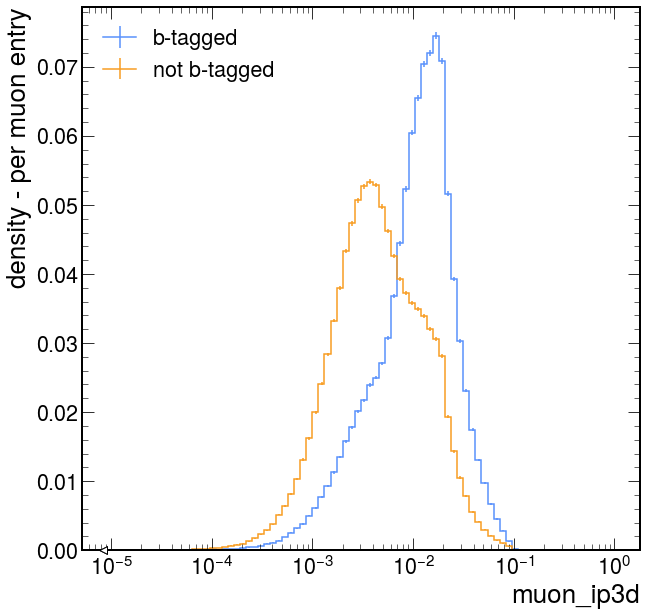

In [31]:
#histogram = plots['QCD_Pt_MuEnriched_2018']['tag_vs_muon_ip3d']
histogram = plots['DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018']['btag_vs_muon_ip3d']
density=True

sum1 = histogram[True, 1e-5j::sum].value
(histogram[True, 1e-5j:]/sum1).plot(
    yerr=np.sqrt((histogram[True, 1e-5j:]/sum1).variances()),
    label="b-tagged",
    #density=density,
)
sum2 = histogram[False, 1e-5j::sum].value
(histogram[False, 1e-5j:]/sum2).plot(
    yerr=np.sqrt((histogram[False, 1e-5j:]/sum2).variances()),
    label="not b-tagged",
    #density=density,
)
plt.legend()
plt.ylabel("density - per muon entry")
plt.xscale('log')
#plt.yscale('log')

In [19]:
plots['QCD_Pt_MuEnriched_2018']['muon_iso_sub_muons_vs_nMuon'][::sum, :, :].plot2d(norm=mpl.colors.LogNorm())
plt.xscale('log')
plt.yscale('log')

KeyError: 'muon_iso_sub_muons_vs_nMuon'

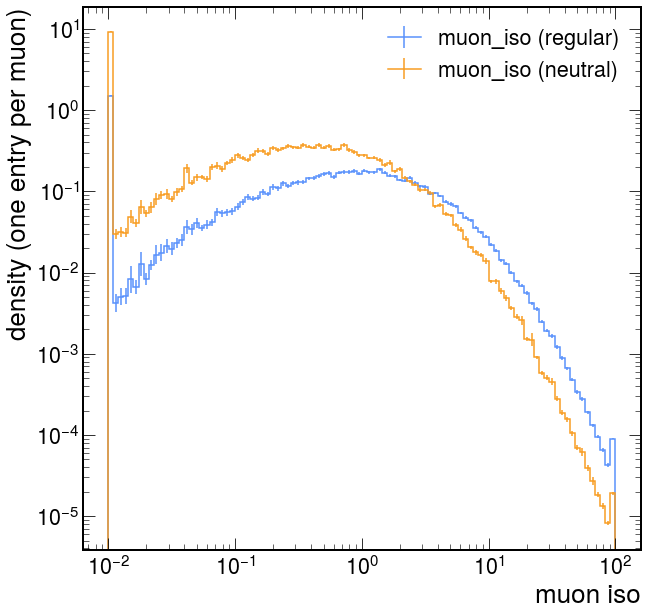

In [100]:
datasets = [
    ('QCD_Pt_MuEnriched_2018', "QCD MC"),
]

for dataset, label in datasets:
    plots[dataset]['muon_iso_sub_muons_vs_nMuon'][::sum, :, ::sum].plot(
        density=True, label="muon_iso (regular)"
    )
    plots[dataset]['muon_iso_sub_muons_vs_nMuon'][::sum, ::sum, :].plot(
        density=True, label="muon_iso (neutral)"
    )

plt.legend()
plt.xlabel("muon iso")
plt.ylabel("density (one entry per muon)")
plt.xscale('log')
plt.yscale('log')

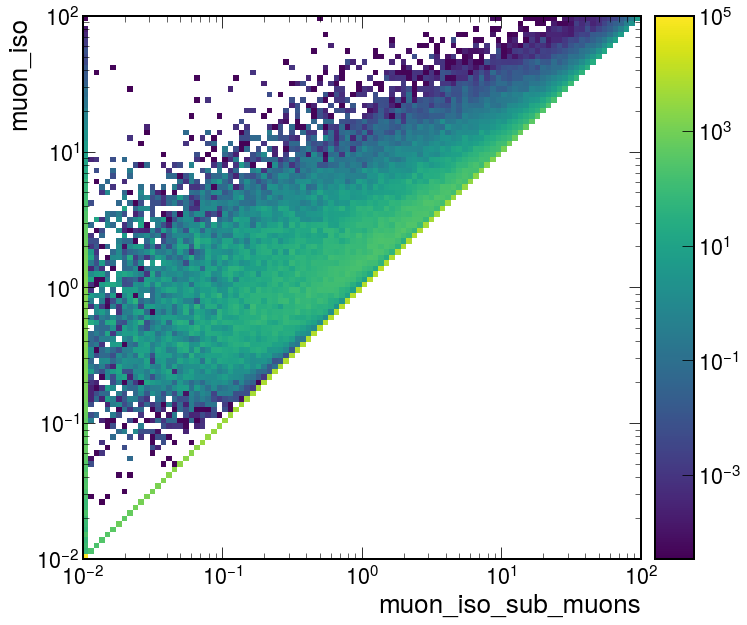

In [85]:
plots[dataset]['muon_iso_sub_muons_vs_nMuon'][:, :, ::sum].plot2d(norm=mpl.colors.LogNorm())
plt.xscale('log')
plt.yscale('log')

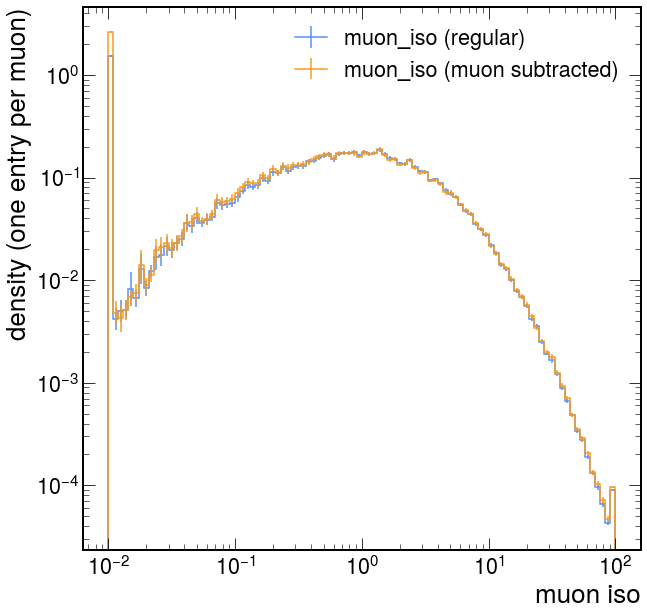

In [89]:
datasets = [
    ('QCD_Pt_MuEnriched_2018', "QCD MC"),
]

for dataset, label in datasets:
    plots[dataset]['muon_iso_sub_muons_vs_nMuon'][::sum, :, ::sum].plot(
        density=True, label="muon_iso (regular)"
    )
    plots[dataset]['muon_iso_sub_muons_vs_nMuon'][:, ::sum, ::sum].plot(
        density=True, label="muon_iso (muon subtracted)"
    )

plt.legend()
plt.xlabel("muon iso")
plt.ylabel("density (one entry per muon)")
plt.xscale('log')
plt.yscale('log')

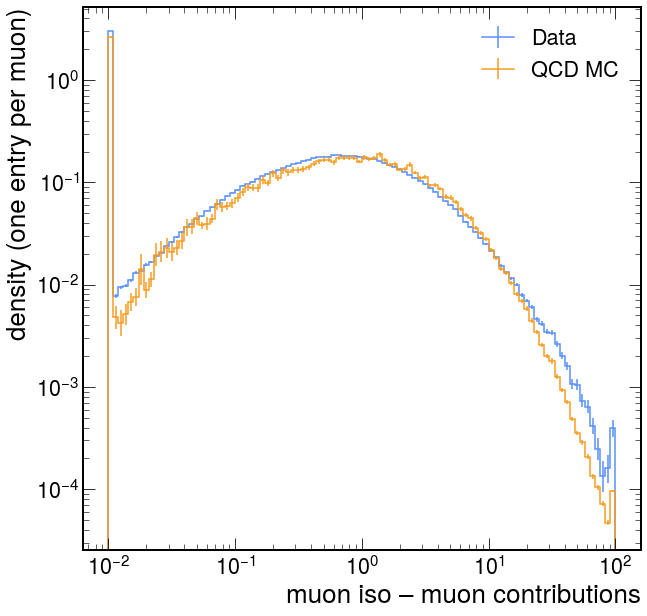

In [80]:
datasets = [
    ("DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018", "Data"),
    ('QCD_Pt_MuEnriched_2018', "QCD MC"),
]

for dataset, label in datasets:
    plots[dataset]['muon_iso_sub_muons_vs_nMuon'][:,::sum,::sum].plot(density=True, label=label)

plt.legend()
plt.xlabel("muon iso – muon contributions")
plt.ylabel("density (one entry per muon)")
plt.xscale('log')
plt.yscale('log')

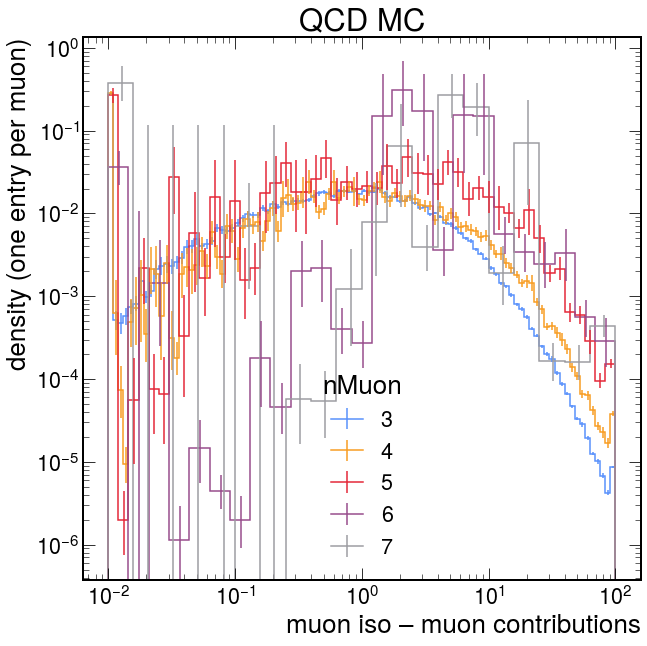

In [76]:
datasets = [
    ('QCD_Pt_MuEnriched_2018', "QCD MC"),
]

for dataset, label in datasets:
    for nMuon in range(3, 8):
        slc = slice(None)
        if nMuon == 5:
            slc = slice(None, None, 2j)
        if nMuon == 6:
            slc = slice(None, None, 4j)
        if nMuon == 7:
            slc = slice(None, None, 5j)
        hist_sum = plots[dataset]['muon_iso_sub_muons_vs_nMuon'][::sum, ::sum, nMuon*1j]
        (plots[dataset]['muon_iso_sub_muons_vs_nMuon'][slc, ::sum, nMuon*1j] / hist_sum.value).plot(label=nMuon)

plt.title("QCD MC")
plt.legend(title="nMuon")
plt.xlabel("muon iso – muon contributions")
plt.ylabel("density (one entry per muon)")
plt.xscale('log')
plt.yscale('log')

[[0.         0.         0.         0.50178404]
 [0.         0.         0.21774648 0.        ]
 [0.         0.15023474 0.         0.        ]
 [0.13023474 0.         0.         0.        ]]

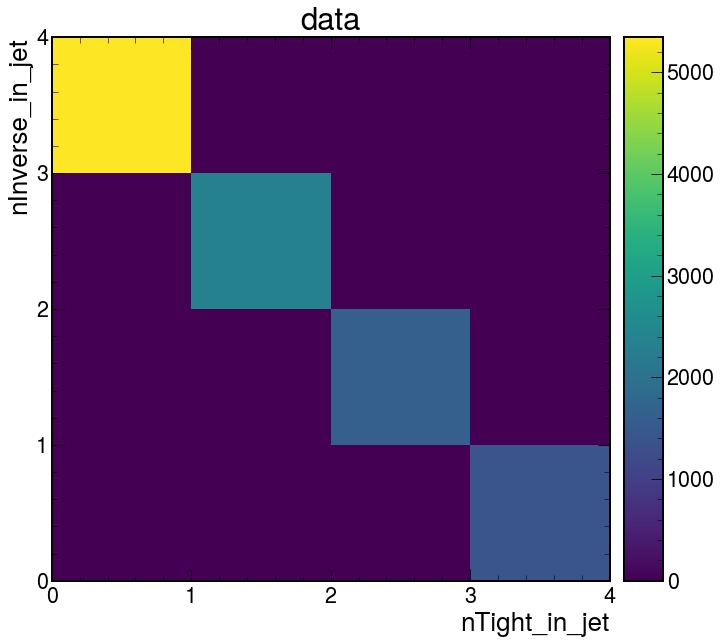

[[0.         0.         0.         0.55774711]
 [0.         0.         0.18621634 0.        ]
 [0.         0.11635056 0.         0.        ]
 [0.139686   0.         0.         0.        ]]

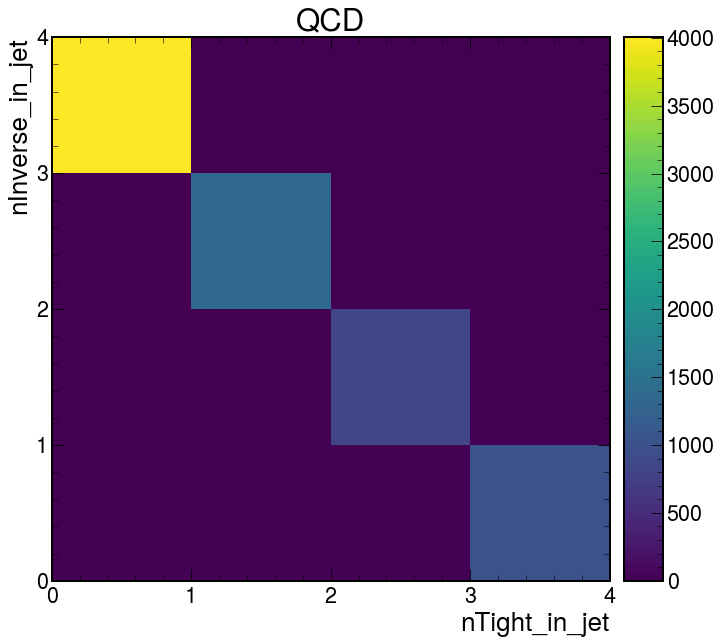

In [12]:
datasets = [
    "DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018",
    'QCD_Pt_MuEnriched_2018'
]

labels = [
    'data',
    'QCD'
]

nMuon=3

for dataset, label in zip(datasets, labels):
    print(
        plots[dataset]['nTight_in_jet_vs_nInverse_in_jet_vs_nMuon'][:,:,::sum].values() / plots[dataset]['nTight_in_jet_vs_nInverse_in_jet_vs_nMuon'][:,:,::sum].values().sum()
    )
    plots[dataset]['nTight_in_jet_vs_nInverse_in_jet_vs_nMuon'][:,:,::sum].plot2d()
    plt.title(label)
    plt.show()

In [13]:
plots[dataset][hist_name]

Hist(
  Regular(3, 0, 3, name='nTight_in_jet'),
  Regular(3, 0, 3, name='nInverse_in_jet'),
  Regular(5, 3, 8, name='nMuon'),
  storage=Weight()) # Sum: WeightedSum(value=101286, variance=101286)

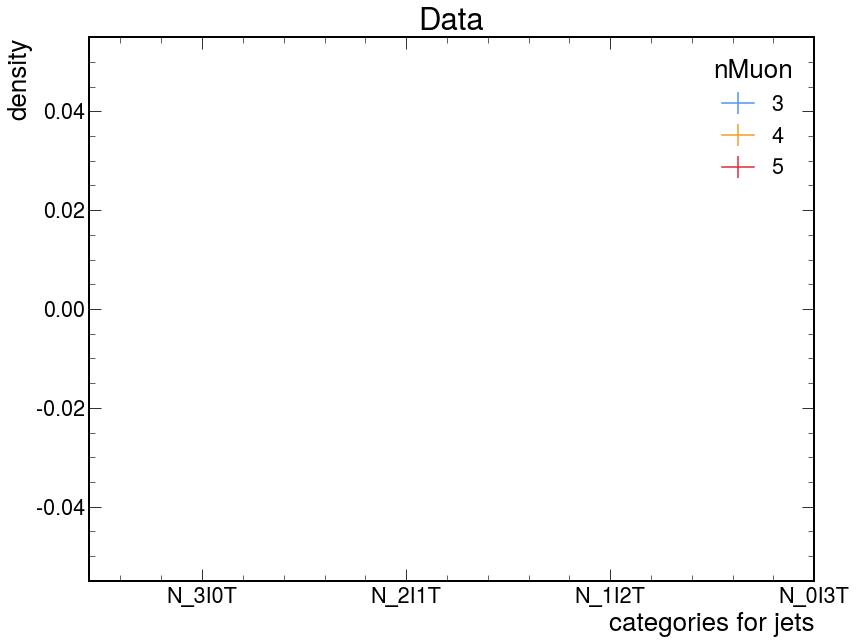

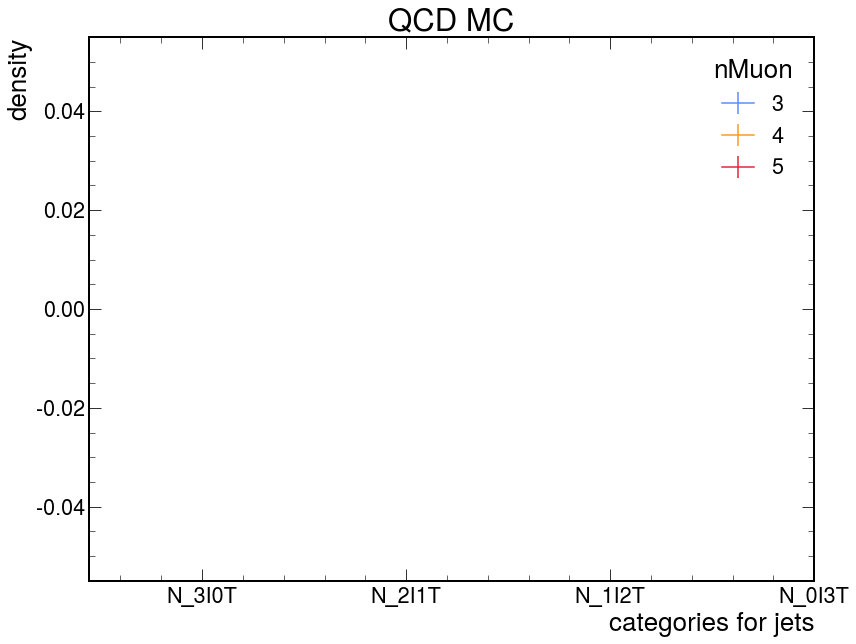

In [10]:
datasets = [
    ("DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018", "Data"),
    ('QCD_Pt_MuEnriched_2018', 'QCD MC')
]

hist_name = 'nTight_in_jet_vs_nInverse_in_jet_vs_nMuon'
nMuon_in_jet = 3

for dataset, label in datasets:
    fig, ax = plt.subplots(figsize=(13,10))
    for nMuon in range(3, 6):
        N_hist = plots[dataset][hist_name][:, :, nMuon*1j]
        h = hist.Hist.new.StrCategory(
            [f"N_{nMuon_in_jet-i}I{i}T" for i in range(nMuon_in_jet+1)], name="categories"
        ).Weight()
        for m in range(nMuon_in_jet+1):
            k = nMuon_in_jet - m
            h[f"N_{k}I{m}T"] = N_hist[m*1j, k*1j]
        h.plot(label=nMuon, density=True)
    plt.legend(title="nMuon")
    plt.xlabel('categories for jets')
    plt.ylabel('density')
    plt.title(label)
    plt.show()

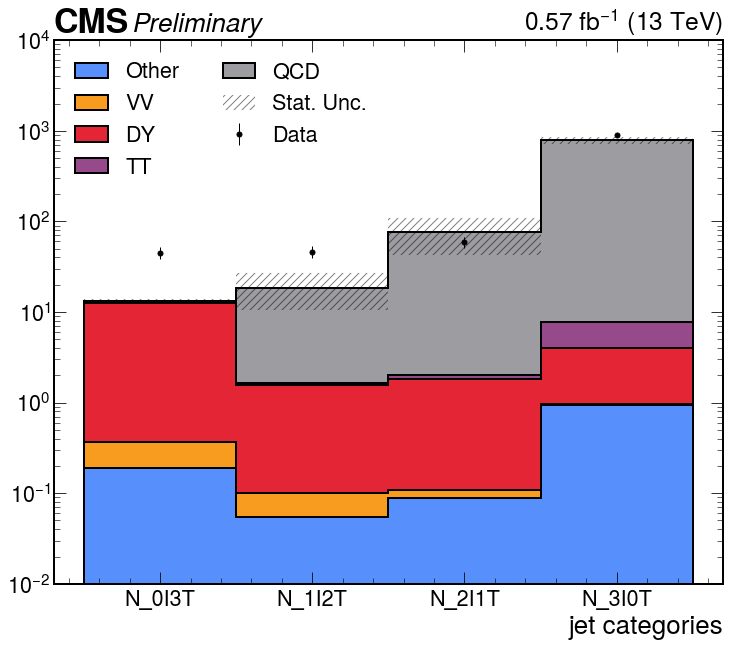

In [27]:
data = "DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018"
mc_processes = [
    'Other_2018',
    'VV_2018',
    'DY_2018',
    'TT_powheg_2018',
    'QCD_Pt_MuEnriched_2018'
]

mc_labels = [
    'Other',
    'VV',
    'DY',
    'TT',
    'QCD'
]

fig, ax = plt.subplots(figsize=(12,10))

hist_name = 'nTight_in_jet_vs_nInverse_in_jet_vs_nMuon'

nMuon = 4

nMuon_in_jet = 3

hists_mc = []
hist_bkg_total = None

for process in mc_processes:
    N_mc = plots[process][hist_name][:, :, nMuon*1j]
    h_mc = hist.Hist.new.StrCategory(
        [f"N_{i}I{nMuon_in_jet-i}T" for i in range(nMuon_in_jet+1)], name="categories"
    ).Weight()
    for m in range(nMuon_in_jet + 1):
        k = nMuon_in_jet - m
        h_mc[f"N_{k}I{m}T"] = N_mc[m*1j, k*1j]
    hists_mc.append(h_mc)
    if hist_bkg_total is None:
        hist_bkg_total = h_mc.copy()
    else:
        hist_bkg_total += h_mc.copy()

N_data = plots[data][hist_name][:, :, nMuon*1j]
h_data = hist.Hist.new.StrCategory(
    [f"N_{i}I{nMuon_in_jet-i}T" for i in range(nMuon_in_jet+1)], name="categories"
).Weight()
for m in range(nMuon_in_jet + 1):
    k = nMuon_in_jet - m
    h_data[f"N_{k}I{m}T"] = N_data[m*1j, k*1j]

hep.histplot(
    hists_mc, 
    stack=True, 
    label=mc_labels,        
    histtype="fill",
    ec="black",
    lw=2,
    ax=ax,
)

x_hatch = np.vstack(
    (hist_bkg_total.axes[0].edges[:-1], hist_bkg_total.axes[0].edges[1:])
).reshape((-1,), order="F")
y_hatch1 = np.vstack((hist_bkg_total.values(), hist_bkg_total.values())).reshape(
    (-1,), order="F"
)
y_hatch1_unc = np.vstack(
    (np.sqrt(hist_bkg_total.variances()), np.sqrt(hist_bkg_total.variances()))
).reshape((-1,), order="F")
ax.fill_between(
    x=x_hatch,
    y1=y_hatch1 - y_hatch1_unc,
    y2=y_hatch1 + y_hatch1_unc,
    label="Stat. Unc.",
    step="pre",
    facecolor="none",
    edgecolor=(0, 0, 0, 0.5),
    linewidth=0,
    hatch="///",
    zorder=2,
)

hep.histplot(
    h_data,
    label=["Data"],
    histtype="errorbar",
    mec="black",
    mfc="black",
    ecolor="black",
    ax=ax
)

hep.cms.label(llabel="Preliminary", data=True, lumi=0.57, ax=ax)
plt.ylim(1e-2, 1e4)
plt.yscale('log')
plt.legend(ncol=2)
plt.xlabel("jet categories")
#plt.title(f"nMuon={nMuon}, nMuon_in_jet={nMuon_in_jet}")
plt.show()

In [78]:
N_data[1j, 1j].value

26289.0

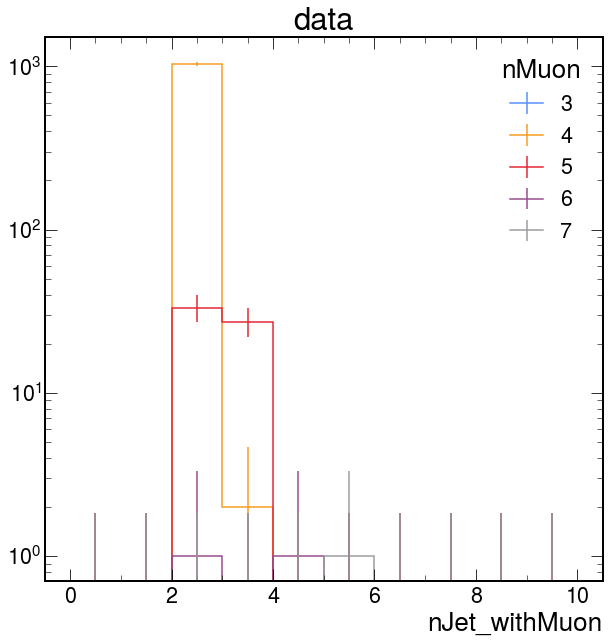

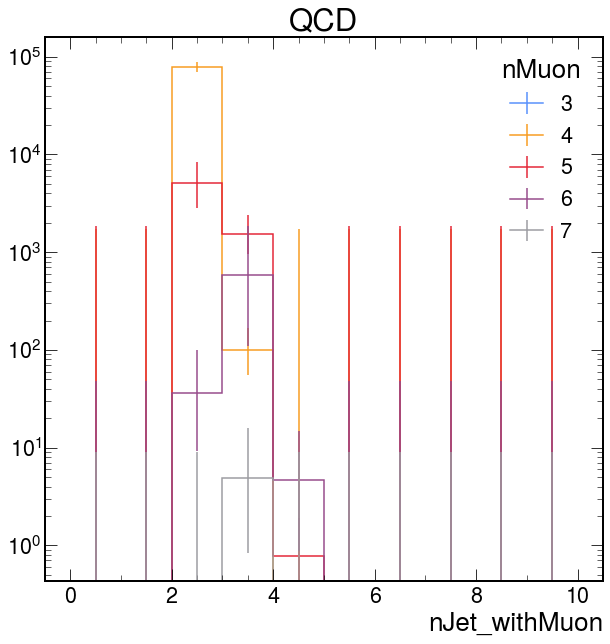

In [13]:
datasets = [
    "DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018",
    'QCD_Pt_MuEnriched_2018'
]

labels = [
    'data',
    'QCD'
]

for dataset, label in zip(datasets, labels):
    for nMuon in range(3, 8):
        plots[dataset]['nMuon_vs_nJet_with_muon'][nMuon*1j, :].plot(label=nMuon)
    plt.legend(title="nMuon")
    plt.yscale('log')
    plt.title(label)
    plt.show()

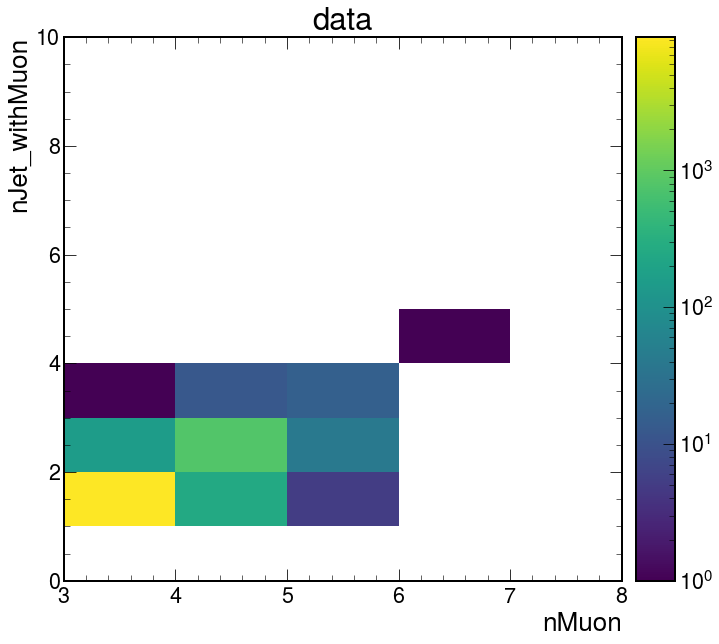

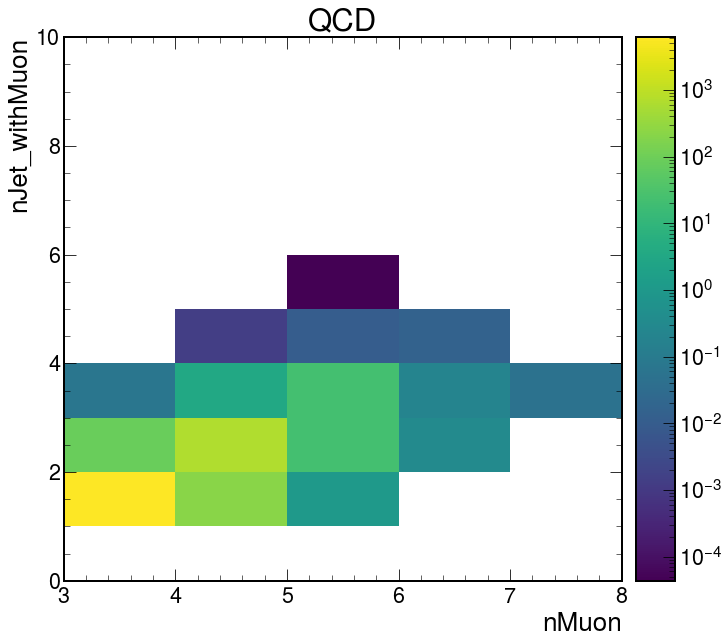

In [55]:
datasets = [
    "DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018",
    'QCD_Pt_MuEnriched_2018'
]

labels = [
    'data',
    'QCD'
]

for dataset, label in zip(datasets, labels):
    plots[dataset]['nMuon_vs_nJet_with_muon'][3j:8j, :].plot2d(norm=mpl.colors.LogNorm())
    plt.title(label)
    plt.show()

In [10]:
plots['QCD_Pt_MuEnriched_2018']['nMuon_inv_vs_nMuon_tight_vs_nMuon']

Hist(
  Regular(10, 0, 10, name='nMuon_inv'),
  Regular(10, 0, 10, name='nMuon_tight'),
  Regular(5, 3, 8, name='nMuon'),
  storage=Weight()) # Sum: WeightedSum(value=7171.38, variance=737695)

DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018 [ 3371. 11608. 17880. 13464.]

data_non_qcd_subtracted [ 3364.22505561 11539.67617293 17026.41981993 12179.69133869]

QCD_Pt_MuEnriched_2018 [ 2124.60528843  9047.07642954 10088.1072287   5907.10577234]

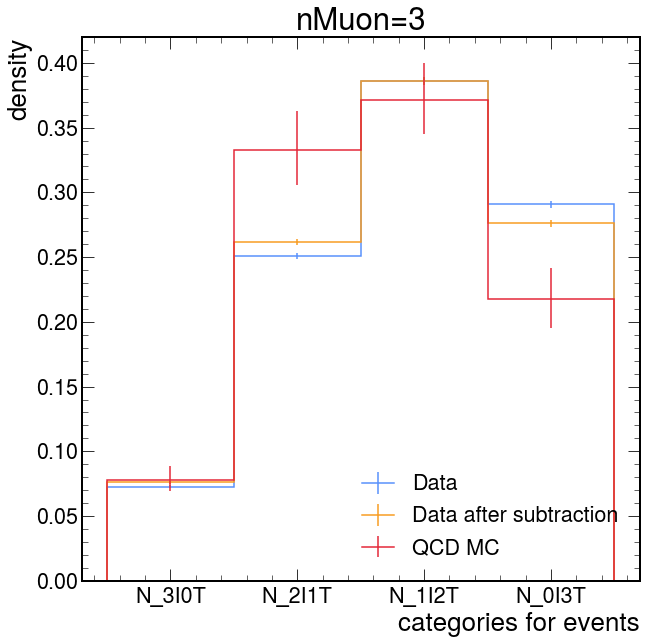

DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018 [ 42. 152. 280. 279. 210.]

data_non_qcd_subtracted [ 41.97227286 150.92843802 273.07307622 266.00983866 166.50680511]

QCD_Pt_MuEnriched_2018 [ 43.27929895  52.63502353 102.84255738  82.93162623  38.16777828]

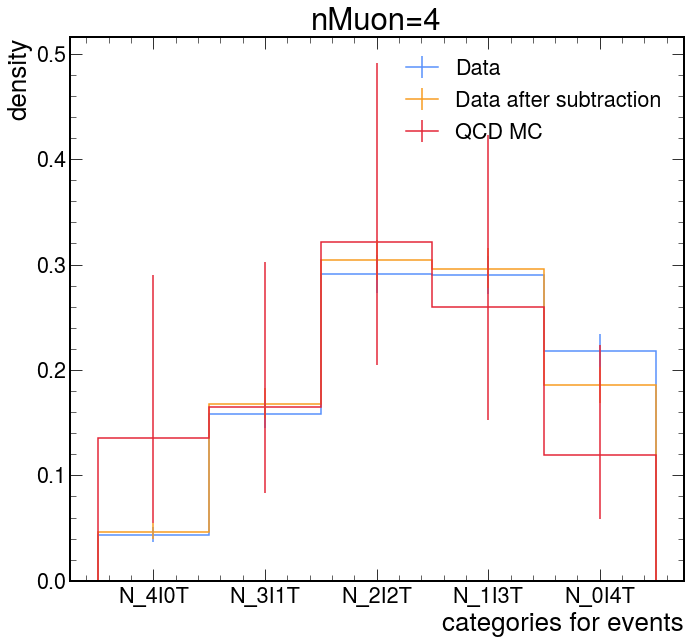

DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018 [0. 1. 3. 1. 2. 1.]

data_non_qcd_subtracted [-0.00036404  0.99803788  3.01233197  0.88376395  1.94587063  0.6127859 ]

QCD_Pt_MuEnriched_2018 [ 0.          0.         13.54369852  0.          0.          0.        ]

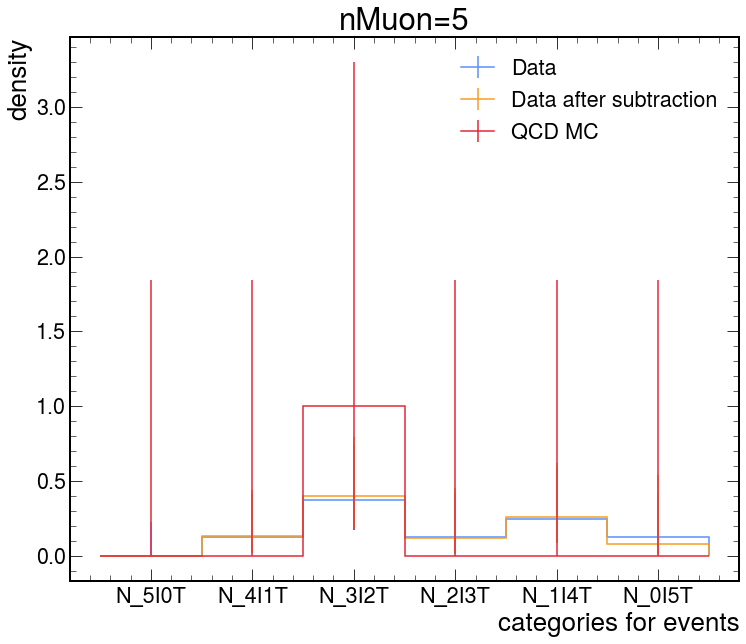

In [101]:
datasets = [
    ("DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018", "Data"),
    ("data_non_qcd_subtracted", "Data after subtraction"),
    ('QCD_Pt_MuEnriched_2018', 'QCD MC')
]

hist_name = 'nMuon_inv_vs_nMuon_tight_vs_nMuon'

for nMuon in range(3, 6):
    fig, ax = plt.subplots(figsize=(10+nMuon-3,10))
    for dataset, label in datasets:
        N_hist = plots[dataset][hist_name][:, :, nMuon*1j]
        h = hist.Hist.new.StrCategory(
            [f"N_{nMuon-i}I{i}T" for i in range(nMuon+1)], name="categories"
        ).Weight()
        for m in range(nMuon+1):
            k = nMuon - m
            h[f"N_{m}I{k}T"] = N_hist[m*1j, k*1j]
        print(dataset, h.values())
        h.plot(label=label, density=True)
    plt.legend()
    plt.xlabel('categories for events')
    plt.ylabel('density')
    plt.title(f"{nMuon=}")
    plt.show()

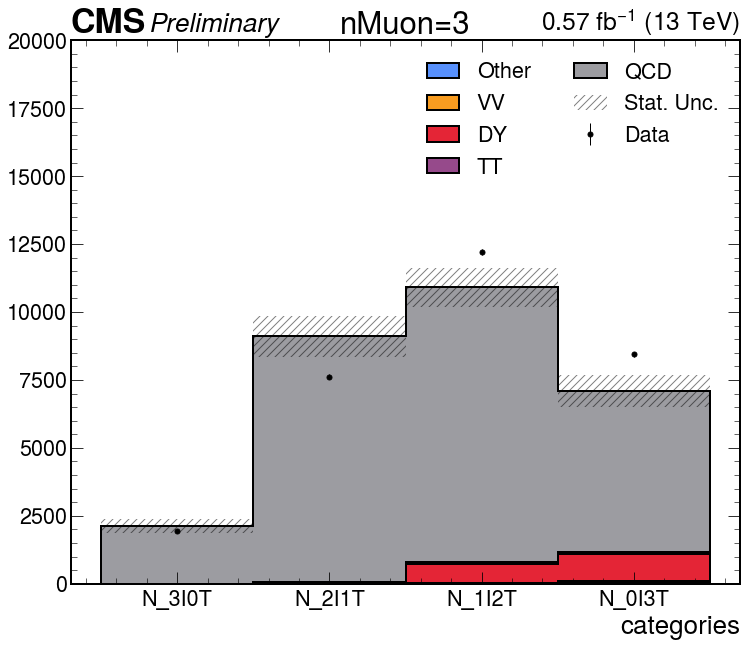

In [70]:
#data = "DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018"
data = "data_non_qcd_subtracted"
mc_processes = [
    'Other_2018',
    'VV_2018',
    'DY_2018',
    'TT_powheg_2018',
    'QCD_Pt_MuEnriched_2018'
]

mc_labels = [
    'Other',
    'VV',
    'DY',
    'TT',
    'QCD'
]

fig, ax = plt.subplots(figsize=(12,10))

hist_name = 'nMuon_inv_vs_nMuon_tight_vs_nMuon'

n = 3

hists_mc = []
hist_bkg_total = None

for process in mc_processes:
    N_mc = plots[process][hist_name][:, :, n*1j]
    h_mc = hist.Hist.new.StrCategory(
        [f"N_{n-i}I{i}T" for i in range(n+1)], name="categories"
    ).Weight()
    for m in range(n + 1):
        k = n - m
        mc, mc_unc = N_mc[m*1j, k*1j].value, np.sqrt(N_mc[m*1j, k*1j].variance)
        h_mc[f"N_{m}I{k}T"] = hist.accumulators.WeightedSum(mc, mc_unc**2)
    hists_mc.append(h_mc)
    if hist_bkg_total is None:
        hist_bkg_total = h_mc.copy()
    else:
        hist_bkg_total += h_mc.copy()

N_data = plots[data][hist_name][:, :, n*1j]
h_data = hist.Hist.new.StrCategory(
    [f"N_{n-i}I{i}T" for i in range(n+1)], name="categories"
).Weight()
for m in range(n + 1):
    k = n - m
    data, data_unc = N_data[m*1j, k*1j].value, np.sqrt(N_data[m*1j, k*1j].variance)
    h_data[f"N_{m}I{k}T"] = hist.accumulators.WeightedSum(data, data_unc**2)

hep.histplot(
    hists_mc, 
    stack=True, 
    label=mc_labels,        
    histtype="fill",
    ec="black",
    lw=2,
    ax=ax,
)

x_hatch = np.vstack(
    (hist_bkg_total.axes[0].edges[:-1], hist_bkg_total.axes[0].edges[1:])
).reshape((-1,), order="F")
y_hatch1 = np.vstack((hist_bkg_total.values(), hist_bkg_total.values())).reshape(
    (-1,), order="F"
)
y_hatch1_unc = np.vstack(
    (np.sqrt(hist_bkg_total.variances()), np.sqrt(hist_bkg_total.variances()))
).reshape((-1,), order="F")
ax.fill_between(
    x=x_hatch,
    y1=y_hatch1 - y_hatch1_unc,
    y2=y_hatch1 + y_hatch1_unc,
    label="Stat. Unc.",
    step="pre",
    facecolor="none",
    edgecolor=(0, 0, 0, 0.5),
    linewidth=0,
    hatch="///",
    zorder=2,
)

hep.histplot(
    h_data,
    label=["Data"],
    histtype="errorbar",
    mec="black",
    mfc="black",
    ecolor="black",
    ax=ax
)

hep.cms.label(llabel="Preliminary", data=True, lumi=0.57, ax=ax)
#plt.ylim(1e-2, 1e7)
plt.ylim(0, 2e4)
#plt.yscale('log')
plt.legend(ncol=2)
plt.title(f"nMuon={n}")
plt.show()

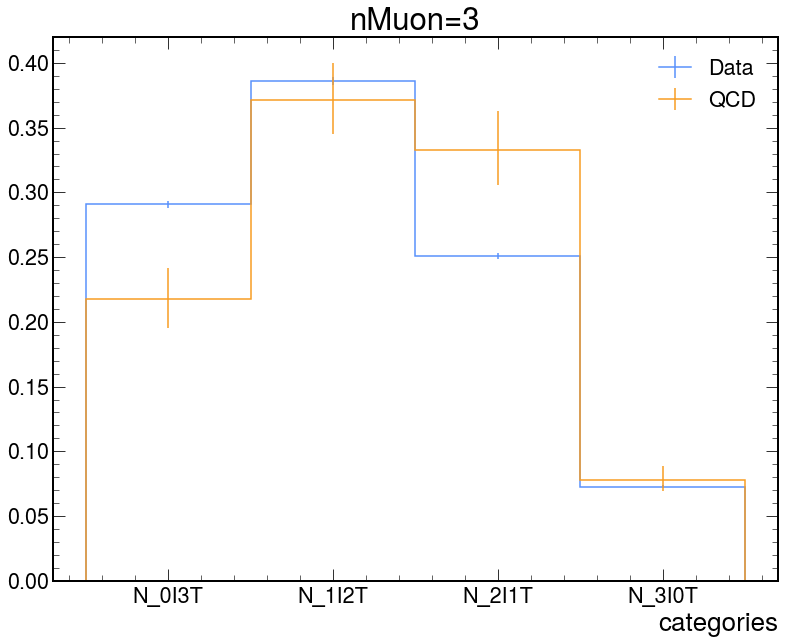

In [41]:
dataset = "DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018"
qcd = 'QCD_Pt_MuEnriched_2018'

fig, ax = plt.subplots(figsize=(13,10))

hist_name = 'nMuon_inv_vs_nMuon_tight_vs_nMuon'

n = 3

N_data = plots[dataset][hist_name][:, :, n*1j]
N_qcd = plots[qcd][hist_name][:, :, n*1j]

h_data = hist.Hist.new.StrCategory(
    [f"N_{i}I{n-i}T" for i in range(n+1)], name="categories"
).Weight()
h_qcd = hist.Hist.new.StrCategory(
    [f"N_{i}I{n-i}T" for i in range(n+1)], name="categories"
).Weight()

for m in range(n + 1):
    k = n - m
    data, data_unc = N_data[m*1j, k*1j].value, np.sqrt(N_data[m*1j, k*1j].variance)
    qcd, qcd_unc = N_qcd[m*1j, k*1j].value, np.sqrt(N_qcd[m*1j, k*1j].variance)
    h_data[f"N_{m}I{k}T"] = hist.accumulators.WeightedSum(data, data_unc**2)
    h_qcd[f"N_{m}I{k}T"] = hist.accumulators.WeightedSum(qcd, qcd_unc**2)

h_data.plot(label="Data", density=True)
h_qcd.plot(label="QCD", density=True)

#plt.yscale('log')
plt.legend()
plt.title(f"nMuon={n}")
plt.show()

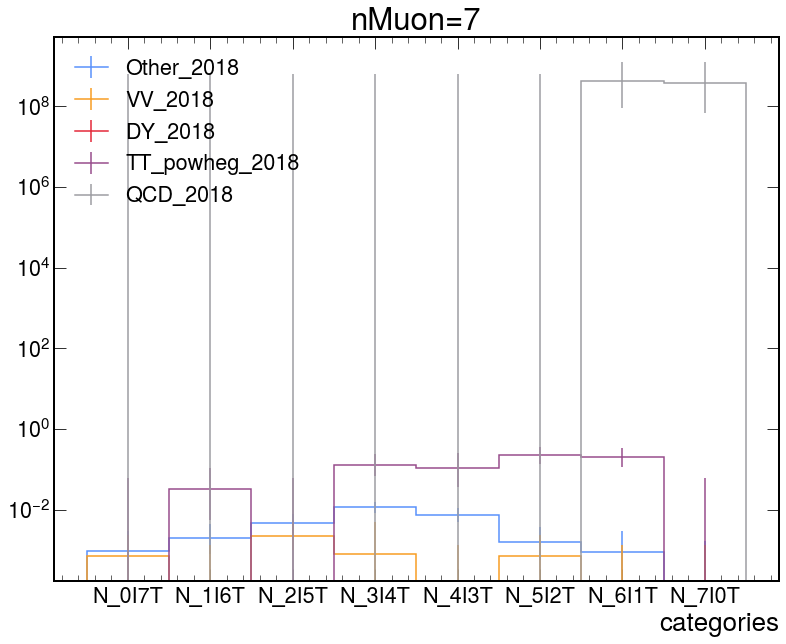

In [22]:
processes = [
    'Other_2018',
    'VV_2018',
    'DY_2018',
    'TT_powheg_2018',
    'QCD_2018'
]

fig, ax = plt.subplots(figsize=(13,10))

hist_name = 'nMuon_inv_vs_nMuon_tight_vs_nMuon'

n = 7

for p in processes:
    N_p = plots[p][hist_name][:, :, n*1j]

    h_p = hist.Hist.new.StrCategory(
        [f"N_{i}I{n-i}T" for i in range(n+1)], name="categories"
    ).Weight()

    for m in range(n + 1):
        k = n - m
        y_p, y_p_unc = N_p[m*1j, k*1j].value, np.sqrt(N_p[m*1j, k*1j].variance)
        h_p[f"N_{m}I{k}T"] = hist.accumulators.WeightedSum(y_p, y_p_unc**2)

    h_p.plot(label=p)

plt.yscale('log')
plt.legend()
plt.title(f"nMuon={n}")
plt.show()

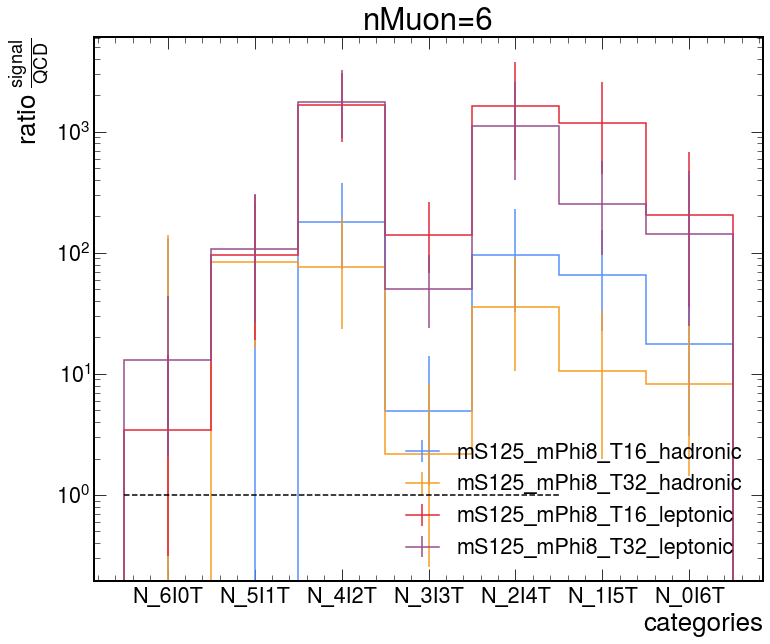

In [136]:
signal_list = [
    "GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modehadronic_13TeV_2018",
    "GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modehadronic_13TeV_2018",
    'GluGluToSUEP_mS125.000_mPhi8.000_T16.000_modeleptonic_13TeV_2018',
    'GluGluToSUEP_mS125.000_mPhi8.000_T32.000_modeleptonic_13TeV_2018',
]

fig, ax = plt.subplots(figsize=(12,10))

for signal_name in signal_list:
    qcd_name = 'QCD_Pt_MuEnriched_2018'
    hist_name = 'nMuon_inv_vs_nMuon_tight_vs_nMuon'

    nMuon = 6

    N_signal = plots[signal_name][hist_name][..., nMuon*1j]
    N_qcd = plots[qcd_name][hist_name][..., nMuon*1j]

    h_ratio = hist.Hist.new.StrCategory(
        [f"N_{nMuon - i}I{i}T" for i in range(nMuon+1)], name="categories"
    ).Weight()

    for m in range(nMuon + 1):
        k = nMuon - m
        mc_signal, mc_unc_signal = N_signal[m*1j, k*1j].value, np.sqrt(N_signal[m*1j, k*1j].variance)
        mc_qcd, mc_unc_qcd = N_qcd[m*1j, k*1j].value, np.sqrt(N_qcd[m*1j, k*1j].variance)
        if mc_qcd == 0:
            ratio = mc_signal / 1e-5
            ratio_unc = ratio * np.sqrt((mc_unc_signal/mc_signal)**2)
        elif mc_signal == 0:
            ratio = mc_signal / mc_qcd
            ratio_unc = ratio * np.sqrt((mc_unc_qcd/mc_qcd)**2)
        else:
            ratio = mc_signal / mc_qcd
            ratio_unc = ratio * np.sqrt((mc_unc_signal/mc_signal)**2 + (mc_unc_qcd/mc_qcd)**2)

        h_ratio[f"N_{m}I{k}T"] = hist.accumulators.WeightedSum(ratio, ratio_unc**2)


    h_ratio.plot(label=signal_name[13:-11].replace(".000","").replace("mode",""))
    
plt.hlines(1, 0, n+1, linestyles="dashed", color="black")
plt.yscale('log')
plt.legend()
plt.title(f"nMuon={nMuon}")
plt.ylabel(r"ratio $\frac{signal}{QCD}$")
plt.show()

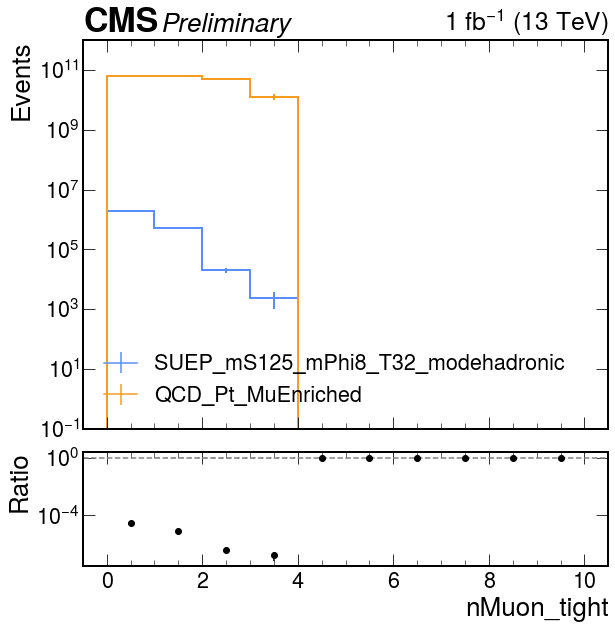

In [10]:
hist_name = 'nMuon_inv_vs_nMuon_tight_vs_nMuon'
hist_axis = 'nMuon_tight'

processes = [
    'SUEP_mS125_mPhi8_T32_modehadronic_2018',
    "QCD_Pt_MuEnriched_2018",
]

plot_utils_extras.plot_ratio_overlay(
    plots,
    processes,
    (hist_name, hist_axis),
    ylog=True,
    ratio_ylog=True,
)

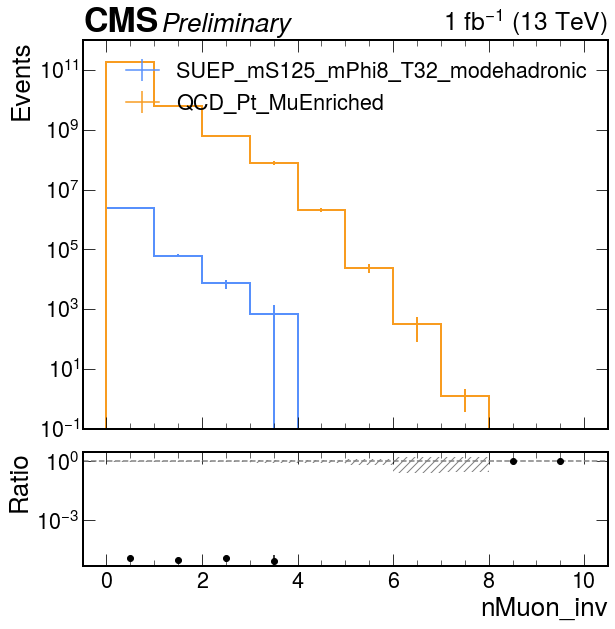

In [80]:
hist_name = 'nMuon_inv_vs_nMuon_tight_vs_nMuon'
hist_axis = 'nMuon_inv'

processes = [
    'SUEP_mS125_mPhi8_T32_modehadronic_2018',
    "QCD_Pt_MuEnriched_2018",
]

plot_utils_extras.plot_ratio_overlay(
    plots,
    processes,
    (hist_name, hist_axis),
    ylog=True,
    ratio_ylog=True,
)

QCD_Pt_MuEnriched_2018

WeightedSum(value=1.38151e+06, variance=1.76932e+12)

SUEP_mS125_mPhi8_T32_modehadronic_2018

WeightedSum(value=113234, variance=9.06938e+07)

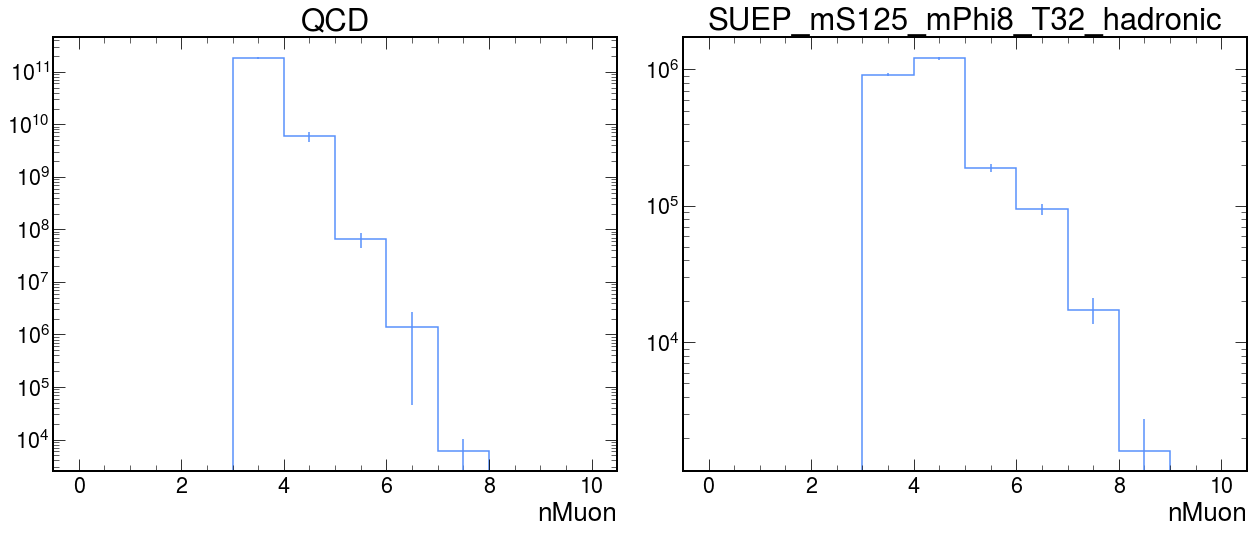

In [38]:
hist_name = 'nMuon_inv_vs_nMuon_tight_vs_nMuon'

processes = [
    "QCD_Pt_MuEnriched_2018",
    'SUEP_mS125_mPhi8_T32_modehadronic_2018',
]

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(18, 8))
for i, p in enumerate(processes):
    print(p)
    ax = axs[i]
    histogram = plots[p][hist_name][::sum, ::sum, :]
    print(histogram[6j::sum])
    histogram.plot(
        yerr=np.sqrt(histogram.variances()),
        ax=ax,
    )
    ax.set_title(p.replace("_2018", "").replace("mode", "").replace("_Pt_MuEnriched", ""))
    ax.set_yscale('log')
plt.tight_layout()
plt.show()

QCD_Pt_MuEnriched_2018

WeightedSum(value=0, variance=0)

SUEP_mS125_mPhi8_T32_modehadronic_2018

WeightedSum(value=39279.2, variance=3.10247e+07)

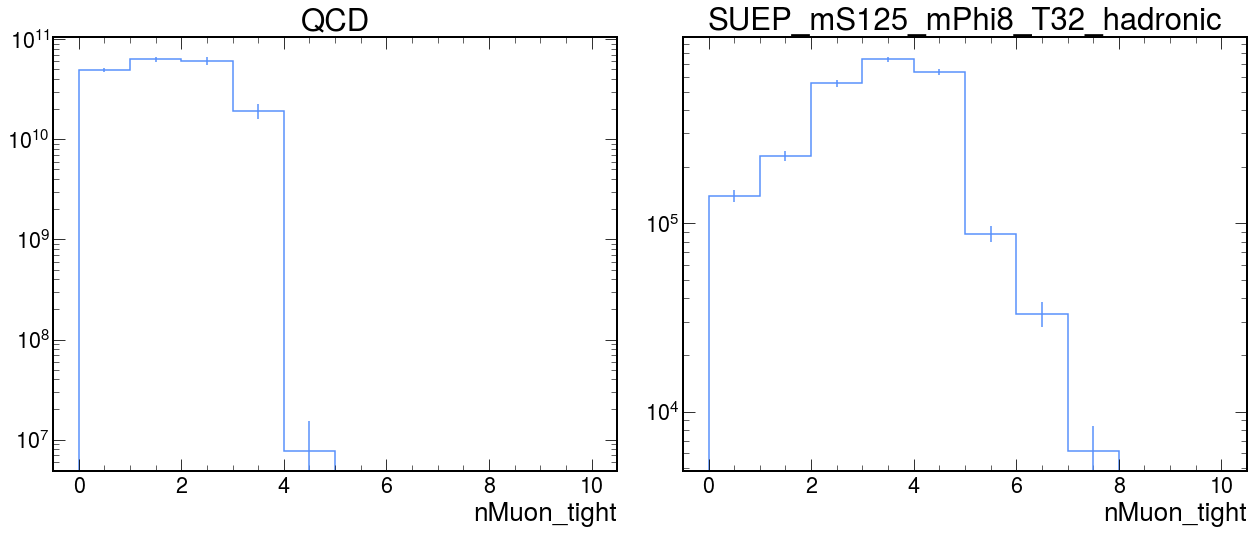

In [37]:
hist_name = 'nMuon_inv_vs_nMuon_tight_vs_nMuon'

processes = [
    "QCD_Pt_MuEnriched_2018",
    'SUEP_mS125_mPhi8_T32_modehadronic_2018',
]

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(18, 8))
for i, p in enumerate(processes):
    print(p)
    ax = axs[i]
    histogram = plots[p][hist_name][::sum, :, ::sum]
    print(histogram[6j::sum])
    histogram.plot(
        yerr=np.sqrt(histogram.variances()),
        ax=ax,
    )
    ax.set_title(p.replace("_2018", "").replace("mode", "").replace("_Pt_MuEnriched", ""))
    ax.set_yscale('log')
plt.tight_layout()
plt.show()

QCD_Pt_MuEnriched_2018

WeightedSum(value=1.37754e+06, variance=1.76931e+12)

SUEP_mS125_mPhi8_T32_modehadronic_2018

WeightedSum(value=3082.57, variance=2.37985e+06)

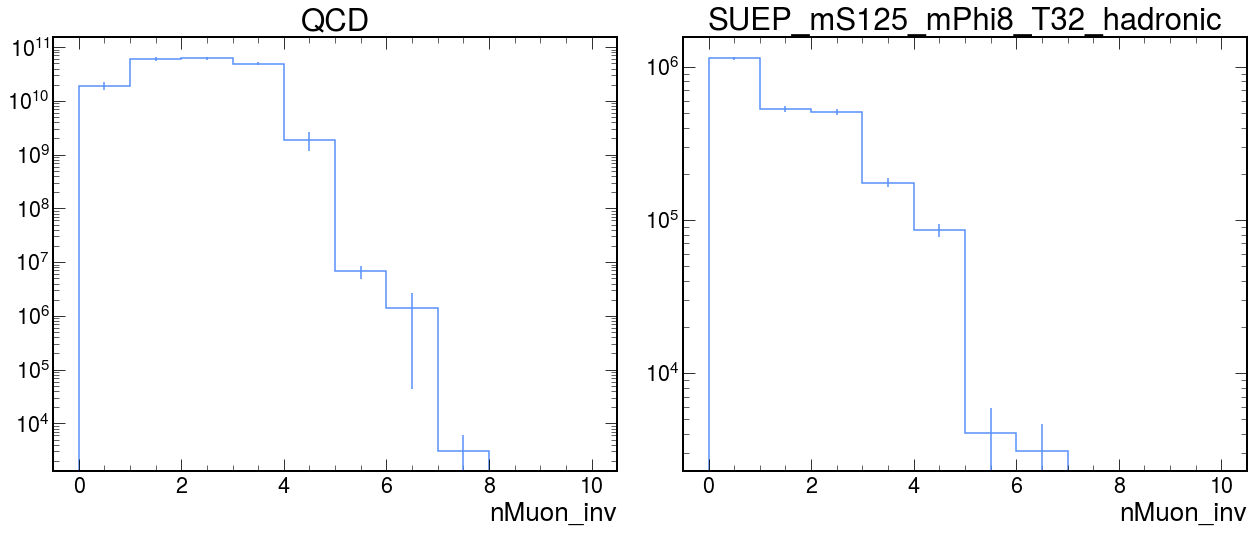

In [38]:
hist_name = 'nMuon_inv_vs_nMuon_tight_vs_nMuon'

processes = [
    "QCD_Pt_MuEnriched_2018",
    'SUEP_mS125_mPhi8_T32_modehadronic_2018',
]

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(18, 8))
for i, p in enumerate(processes):
    print(p)
    ax = axs[i]
    histogram = plots[p][hist_name][:, ::sum, ::sum]
    print(histogram[6j::sum])
    histogram.plot(
        yerr=np.sqrt(histogram.variances()),
        ax=ax,
    )
    ax.set_title(p.replace("_2018", "").replace("mode", "").replace("_Pt_MuEnriched", ""))
    ax.set_yscale('log')
plt.tight_layout()
plt.show()

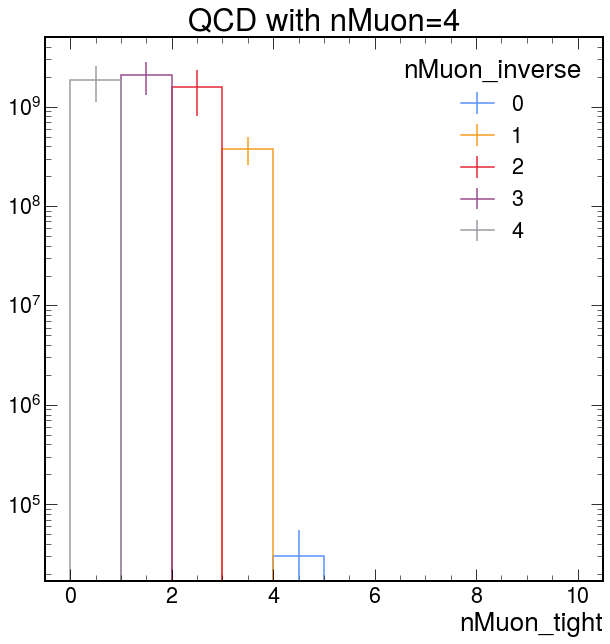

In [39]:
process = "QCD_Pt_MuEnriched_2018"
hist_name = 'nMuon_inv_vs_nMuon_tight_vs_nMuon'

nMuon = 4
N_4F = plots[process][hist_name][:, :, nMuon*1j]
for i in range(0, nMuon+1):
    N_4F[i*1j, :].plot(
        yerr=np.sqrt(N_4F[i*1j, :].variances()),
        label=f"{i}"
    )
plt.title(f"QCD with nMuon={nMuon}")
plt.legend(title="nMuon_inverse")
plt.yscale('log')
plt.show()

In [44]:
process = "QCD_Pt_MuEnriched_2018"
hist_name = 'nMuon_inv_vs_nMuon_tight_vs_nMuon'
nMuon = 6
N_nF = plots[process][hist_name][:, :, nMuon*1j]

for i in range(nMuon + 1):
    j = nMuon - i
    N_iIjT = N_nF[i*1j, j*1j]
    print(f"N_{i}I{j}T: {N_iIjT.value:.2e} ± {np.sqrt(N_iIjT.variance):.2e}")

N_0I6T: 8.47e+00 ± 7.22e+00

N_1I5T: 6.42e+03 ± 4.29e+03

N_2I4T: 3.03e+04 ± 2.41e+04

N_3I3T: 1.33e+06 ± 1.33e+06

N_4I2T: 7.11e+03 ± 4.41e+03

N_5I1T: 1.27e+02 ± 4.56e+01

N_6I0T: 3.14e+02 ± 2.34e+02

## Fake rate method 2

In [18]:
process = "QCD_Pt_MuEnriched_2018"
hist_name = 'nMuon_inv_vs_nMuon_tight_vs_nMuon'

N_4F = plots[process][hist_name][:, :, 4j]
N_4F_sum = N_4F.sum().value

N_4I = N_4F[4j, 0]
N_3I1T = N_4F[3j, 1j]
N_2I2T = N_4F[2j, 2j]
N_1I3T = N_4F[1j, 3j]
N_4T = N_4F[0, 4j]

f = N_3I1T.value / (4*N_4I.value + N_3I1T.value)
delta_f = (2 / (4*N_4I.value + N_3I1T.value))**2 * np.sqrt(N_4I.value**2 * N_3I1T.variance + N_4I.variance)

N_4I_est = (1-f)**4 * N_4F_sum
N_3I1T_est = 4 * (1-f)**3 * f * N_4F_sum
N_2I2T_est = 6 * (1-f)**2 * f**2 * N_4F_sum
N_1I3T_est = 4 * (1-f) * f**3 * N_4F_sum
N_4T_est = f**4 * N_4F_sum

delta_N_4I_est = np.sqrt(
    (4 * (1-f)**3 * N_4F_sum * delta_f)**2 + N_4F.sum().variance * (N_4I_est / N_4F_sum)**2
)
delta_N_3I1T_est = np.sqrt(
    (4 * (1-f)**2 * (1-4*f) * N_4F_sum * delta_f)**2 + N_4F.sum().variance * (N_3I1T_est / N_4F_sum)**2
)
delta_N_2I2T_est = np.sqrt(
    (12 * f * (1-f) * (1-2*f) * N_4F_sum * delta_f)**2 + N_4F.sum().variance * (N_2I2T_est / N_4F_sum)**2
)
delta_N_1I3T_est = np.sqrt(
    (4 * f**2 * (3-4*f) * N_4F_sum * delta_f)**2 + N_4F.sum().variance * (N_1I3T_est / N_4F_sum)**2
)
delta_N_4T_est = np.sqrt(
    (4 * f**3 * N_4F_sum * delta_f)**2 + N_4F.sum().variance * (N_4T_est / N_4F_sum)**2
)

print(f"Calculating f using: f = N_3I1T / (4 * N_4I + N_3I1T)")
print(f"f = {f:.3f} ± {delta_f:.3f}")

print(
    f"N_4I:\n\t"
    f"MC = {N_4I.value:.2e} ± {np.sqrt(N_4I.variance):.2e}\n\t"
    f"estimate: (1-f) * f**3 * N_4F = {N_4I_est:.2e} ± {delta_N_4I_est:.2e}\n\t"
    f"ratio = {N_4I_est/N_4I.value:.2f} ± "
    f"{(delta_N_4I_est / N_4I.value)**2 + N_4I_est * np.sqrt(N_4I.variance) / N_4I.value**2:.2f}"
)
print(
    f"N_3I1T:\n\t"
    f"MC = {N_3I1T.value:.2e} ± {np.sqrt(N_3I1T.variance):.2e}\n\t"
    f"estimate: 4 * (1-f) * f**3 * N_4F = {N_3I1T_est:.2e} ± {delta_N_3I1T_est:.2e}\n\t"
    f"ratio = {N_3I1T_est/N_3I1T.value:.2f} ± "
    f"{(delta_N_3I1T_est / N_3I1T.value)**2 + N_3I1T_est * np.sqrt(N_3I1T.variance) / N_3I1T.value**2:.2f}"
)
print(
    f"N_2I2T:\n\t"
    f"MC: {N_2I2T.value:.2e} ± {np.sqrt(N_2I2T.variance):.2e}\n\t"
    f"estimate: 6 * (1-f)**2 * f**2 * N_4F = {N_2I2T_est:.2e} ± {delta_N_2I2T_est:.2e}\n\t"
    f"ratio = {N_2I2T_est/N_2I2T.value:.2f} ± "
    f"{(delta_N_2I2T_est / N_2I2T.value)**2 + N_2I2T_est * np.sqrt(N_2I2T.variance) / N_2I2T.value**2:.2f}"
)
print(
    f"N_1I3T:\n\t"
    f"MC: {N_1I3T.value:.2e} ± {np.sqrt(N_1I3T.variance):.2e}\n\t"
    f"estimate: 4 * (1-f)**3 * f * N_4F = {N_1I3T_est:.2e} ± {delta_N_1I3T_est:.2e}\n\t"
    f"ratio = {N_1I3T_est/N_1I3T.value:.2f} ± "
    f"{(delta_N_1I3T_est / N_1I3T.value)**2 + N_1I3T_est * np.sqrt(N_1I3T.variance) / N_1I3T.value**2:.2f}"
)
print(
    f"N_4T:\n\t"
    f"MC: {N_4T.value:.2e} ± {np.sqrt(N_4T.variance):.2e}\n\t"
    f"estimate: f**4 * N_4F = {N_4T_est:.2e} ± {delta_N_4T_est:.2e}\n\t"
    f"ratio = {N_4T_est/N_4T.value:.2f} ± "
    f"{(delta_N_4T_est / N_4T.value)**2 + N_4T_est * np.sqrt(N_4T.variance) / N_4T.value**2:.2f}"
)

Calculating f using: f = N_3I1T / (4 * N_4I + N_3I1T)

f = 0.440 ± 0.125

N_4I:
        MC = 4.63e+08 ± 7.92e+07
        estimate: (1-f) * f**3 * N_4F = 5.79e+08 ± 5.34e+08
        ratio = 1.25 ± 1.54

N_3I1T:
        MC = 1.45e+09 ± 7.39e+08
        estimate: 4 * (1-f) * f**3 * N_4F = 1.82e+09 ± 8.11e+08
        ratio = 1.25 ± 0.95

N_2I2T:
        MC: 1.24e+09 ± 1.77e+08
        estimate: 6 * (1-f)**2 * f**2 * N_4F = 2.14e+09 ± 5.46e+08
        ratio = 1.72 ± 0.44

N_1I3T:
        MC: 2.45e+09 ± 1.07e+09
        estimate: 4 * (1-f)**3 * f * N_4F = 1.12e+09 ± 7.49e+08
        ratio = 0.46 ± 0.29

N_4T:
        MC: 2.64e+08 ± 8.97e+07
        estimate: f**4 * N_4F = 2.19e+08 ± 2.55e+08
        ratio = 0.83 ± 1.21

In [55]:
display(Math(r"$\alpha$"))

<IPython.core.display.Math object>

In [60]:
help(print)

Help on function print in module rich:

print(*objects: Any, sep: str = ' ', end: str = '\n', file: Optional[IO[str]] = None, flush: bool = False) -> None
    Print object(s) supplied via positional arguments.
    This function has an identical signature to the built-in print.
    For more advanced features, see the :class:`~rich.console.Console` class.
    
    Args:
        sep (str, optional): Separator between printed objects. Defaults to " ".
        end (str, optional): Character to write at end of output. Defaults to "\\n".
        file (IO[str], optional): File to write to, or None for stdout. Defaults to None.
        flush (bool, optional): Has no effect as Rich always flushes output. Defaults to False.



## Generalize method

In [15]:
def get_f(n, N):
    value = 1 - (N[n*1j, 0, n*1j].value / N[::sum, ::sum, n*1j].value)**(1/n)
    unc = np.sqrt(
        N[n*1j, 0, n*1j].variance/N[n*1j, 0, n*1j].value**2 + 
        N[::sum, ::sum, n*1j].variance/N[::sum, ::sum, n*1j].value**2
    ) * (1 - value) / n
    return value, unc

def get_f_full_stats(n, N):
    N_sum_tight = hist.accumulators.WeightedSum(0, 0)
    N_sum_all = (N[:, :, n * 1j] * n).sum()
    for i in range(n + 1):
        N_mIkT = N[i * 1j, (n - i) * 1j, n * 1j]
        N_sum_tight += hist.accumulators.WeightedSum((n - i) * N_mIkT.value, (n - i) * N_mIkT.variance)
    f = N_sum_tight.value / N_sum_all.value
    delta_f = f * np.sqrt(N_sum_all.variance / N_sum_all.value**2 + N_sum_tight.variance / N_sum_tight.value**2)
    return f, delta_f

In [16]:
def N_mIkT_est(m, k, f, delta_f, N):
    value = binom(m+k, m) * (1-f)**m * f**k * N[::sum, ::sum, (m+k)*1j].value
    unc = binom(m+k, m) * (1-f)**(m-1) * f**(k-1) * np.sqrt(
        ((k - (m+k)*f) * N[::sum, ::sum, (m+k)*1j].value * delta_f)**2 + 
        ((1-f)*f * np.sqrt(N[::sum, ::sum, (m+k)*1j].variance))**2
    )
    return value, unc

In [18]:
process = "QCD_Pt_MuEnriched_2018"
hist_name = 'nMuon_inv_vs_nMuon_tight_vs_nMuon'

N = plots[process][hist_name][:, :, :]

In [19]:
get_f_full_stats(4, N)

(0.8195573327712763, 0.41934734791812805)

In [51]:
nMuon = 4
N_sum_tight = hist.accumulators.WeightedSum(0, 0)
N_sum_inv = hist.accumulators.WeightedSum(0, 0)
for i in range(nMuon + 1):
    N_mIkT = N[i * 1j, (nMuon - i) * 1j, nMuon * 1j]
    N_sum_tight += hist.accumulators.WeightedSum((nMuon - i) * N_mIkT.value, (nMuon - i) * N_mIkT.variance)
    N_sum_inv += hist.accumulators.WeightedSum(nMuon * N_mIkT.value, nMuon * N_mIkT.variance)

print(
    f"N_sum_tight: {N_sum_tight.value:.2e} ± {np.sqrt(N_sum_tight.variance):.2e} "
    f"({np.sqrt(N_sum_tight.variance)/N_sum_tight.value:.2f})"
)
print(
    f"N_sum_inv: {N_sum_inv.value:.2e} ± {np.sqrt(N_sum_inv.variance):.2e} "
    f"({np.sqrt(N_sum_inv.variance)/N_sum_inv.value:.2f})"
)

f = N_sum_tight.value / N_sum_inv.value
delta_f = f * np.sqrt(N_sum_inv.variance / N_sum_inv.value**2 + N_sum_tight.variance / N_sum_tight.value**2)

print(f"f = {f:.3f} ± {delta_f:.3f}")

N_sum_tight: 1.04e+02 ± 3.68e+01 (0.35)

N_sum_inv: 9.84e+02 ± 8.43e+01 (0.09)

f = 0.106 ± 0.038

In [36]:
for n in range(3, 8):
    print(f"Processing events with {n} muons")
    
    f, delta_f = get_f(n, N)
    print(f"Got f = {f:.3f} ± {delta_f:.3f}")
    
    f_4, delta_f_4 = get_f(4, N)
    
    for m in range(n + 1):
        k = n - m
        mc, mc_unc = N[m*1j, k*1j, n*1j].value, np.sqrt(N[m*1j, k*1j, n*1j].variance)
        est, est_unc = N_mIkT_est(m, k, f, delta_f, N)
        est_4, est_unc_4 = N_mIkT_est(m, k, f_4, delta_f_4, N)
        print(
            f"N_{m}I{k}T:\n\t"
            f"MC:  {mc:.2e} ± {mc_unc:.2e}\n\t"
            f"est: {est:.2e} ± {est_unc:.2e}\n\t"
            f"ratio = {est/mc:.2f} ± "
            f"{np.sqrt((est_unc / mc)**2 + (est * mc_unc / mc**2)**2):.2f}\n\n\t"
            "Using f from nMuon=4:\n\t"
            f"est_f_4: {est_4:.2e} ± {est_unc_4:.2e}\n\t"
            f"ratio_f_4 = {est_4/mc:.2f} ± "
            f"{np.sqrt((est_unc_4 / mc)**2 + (est_4 * mc_unc / mc**2)**2):.2f}"
        )

Processing events with 3 muons

Got f = 0.556 ± 0.014

N_0I3T:
        MC:  4.76e+10 ± 4.43e+09
        est: 3.20e+10 ± 2.67e+09
        ratio = 0.67 ± 0.08

        Using f from nMuon=4:
        est_f_4: 1.94e+10 ± 4.68e+09
        ratio_f_4 = 0.41 ± 0.11

N_1I2T:
        MC:  7.57e+10 ± 5.21e+09
        est: 7.67e+10 ± 3.43e+09
        ratio = 1.01 ± 0.08

        Using f from nMuon=4:
        est_f_4: 6.55e+10 ± 6.37e+09
        ratio_f_4 = 0.86 ± 0.10

N_2I1T:
        MC:  4.67e+10 ± 3.05e+09
        est: 6.13e+10 ± 3.36e+09
        ratio = 1.31 ± 0.11

        Using f from nMuon=4:
        est_f_4: 7.38e+10 ± 5.45e+09
        ratio_f_4 = 1.58 ± 0.16

N_3I0T:
        MC:  1.63e+10 ± 1.33e+09
        est: 1.63e+10 ± 1.63e+09
        ratio = 1.00 ± 0.13

        Using f from nMuon=4:
        est_f_4: 2.77e+10 ± 5.97e+09
        ratio_f_4 = 1.70 ± 0.39

Processing events with 4 muons

Got f = 0.470 ± 0.037

N_0I4T:
        MC:  2.64e+08 ± 8.97e+07
        est: 2.87e+08 ± 1.11e+08
        ratio = 1.08 ± 0.56

        Using f from nMuon=4:
        est_f_4: 2.87e+08 ± 1.11e+08
        ratio_f_4 = 1.08 ± 0.56

N_1I3T:
        MC:  2.45e+09 ± 1.07e+09
        est: 1.29e+09 ± 3.62e+08
        ratio = 0.53 ± 0.27

        Using f from nMuon=4:
        est_f_4: 1.29e+09 ± 3.62e+08
        ratio_f_4 = 0.53 ± 0.27

N_2I2T:
        MC:  1.24e+09 ± 1.77e+08
        est: 2.19e+09 ± 4.91e+08
        ratio = 1.76 ± 0.47

        Using f from nMuon=4:
        est_f_4: 2.19e+09 ± 4.91e+08
        ratio_f_4 = 1.76 ± 0.47

N_3I1T:
        MC:  1.45e+09 ± 7.39e+08
        est: 1.64e+09 ± 4.27e+08
        ratio = 1.13 ± 0.65

        Using f from nMuon=4:
        est_f_4: 1.64e+09 ± 4.27e+08
        ratio_f_4 = 1.13 ± 0.65

N_4I0T:
        MC:  4.63e+08 ± 7.92e+07
        est: 4.63e+08 ± 1.67e+08
        ratio = 1.00 ± 0.40

        Using f from nMuon=4:
        est_f_4: 4.63e+08 ± 1.67e+08
        ratio_f_4 = 1.00 ± 0.40

Processing events with 5 muons

Got f = 0.396 ± 0.055

N_0I5T:
        MC:  7.92e+06 ± 7.92e+06
        est: 6.33e+05 ± 4.77e+05
        ratio = 0.08 ± 0.10

        Using f from nMuon=4:
        est_f_4: 1.49e+06 ± 7.41e+05
        ratio_f_4 = 0.19 ± 0.21

N_1I4T:
        MC:  1.79e+07 ± 1.11e+07
        est: 4.82e+06 ± 2.66e+06
        ratio = 0.27 ± 0.22

        Using f from nMuon=4:
        est_f_4: 8.37e+06 ± 3.27e+06
        ratio_f_4 = 0.47 ± 0.34

N_2I3T:
        MC:  9.87e+06 ± 8.12e+06
        est: 1.47e+07 ± 5.60e+06
        ratio = 1.49 ± 1.35

        Using f from nMuon=4:
        est_f_4: 1.89e+07 ± 5.98e+06
        ratio_f_4 = 1.91 ± 1.69

N_3I2T:
        MC:  1.07e+07 ± 7.89e+06
        est: 2.24e+07 ± 6.75e+06
        ratio = 2.09 ± 1.67

        Using f from nMuon=4:
        est_f_4: 2.13e+07 ± 6.52e+06
        ratio_f_4 = 1.99 ± 1.59

N_4I1T:
        MC:  1.31e+07 ± 7.95e+06
        est: 1.70e+07 ± 6.41e+06
        ratio = 1.30 ± 0.93

        Using f from nMuon=4:
        est_f_4: 1.20e+07 ± 4.36e+06
        ratio_f_4 = 0.91 ± 0.65

N_5I0T:
        MC:  5.19e+06 ± 1.76e+06
        est: 5.19e+06 ± 2.83e+06
        ratio = 1.00 ± 0.64

        Using f from nMuon=4:
        est_f_4: 2.70e+06 ± 1.25e+06
        ratio_f_4 = 0.52 ± 0.30

Processing events with 6 muons

Got f = 0.003 ± 0.230

N_0I6T:
        MC:  0.00e+00 ± 0.00e+00
        est: 2.27e-09 ± 9.09e-07
        ratio = inf ± nan

        Using f from nMuon=4:
        est_f_4: 1.48e+04 ± 1.60e+04
        ratio_f_4 = inf ± nan

N_1I5T:
        MC:  0.00e+00 ± 0.00e+00
        est: 3.95e-06 ± 1.32e-03
        ratio = inf ± nan

        Using f from nMuon=4:
        est_f_4: 1.00e+05 ± 1.02e+05
        ratio_f_4 = inf ± nan

N_2I4T:
        MC:  0.00e+00 ± 0.00e+00
        est: 2.86e-03 ± 7.63e-01
        ratio = inf ± nan

        Using f from nMuon=4:
        est_f_4: 2.83e+05 ± 2.78e+05
        ratio_f_4 = inf ± nan

N_3I3T:
        MC:  2.26e+02 ± 2.25e+02
        est: 1.11e+00 ± 2.21e+02
        ratio = 0.00 ± 0.98

        Using f from nMuon=4:
        est_f_4: 4.25e+05 ± 4.11e+05
        ratio_f_4 = 1883.73 ± 2618.79

N_4I2T:
        MC:  2.41e+04 ± 2.38e+04
        est: 2.40e+02 ± 3.19e+04
        ratio = 0.01 ± 1.33

        Using f from nMuon=4:
        est_f_4: 3.60e+05 ± 3.50e+05
        ratio_f_4 = 14.94 ± 20.75

N_5I1T:
        MC:  3.84e+03 ± 3.19e+03
        est: 2.79e+04 ± 1.83e+06
        ratio = 7.26 ± 476.52

        Using f from nMuon=4:
        est_f_4: 1.62e+05 ± 1.63e+05
        ratio_f_4 = 42.22 ± 55.05

N_6I0T:
        MC:  1.35e+06 ± 1.33e+06
        est: 1.35e+06 ± 2.27e+06
        ratio = 1.00 ± 1.95

        Using f from nMuon=4:
        est_f_4: 3.05e+04 ± 3.22e+04
        ratio_f_4 = 0.02 ± 0.03

Processing events with 7 muons

Got f = 0.093 ± 0.156

N_0I7T:
        MC:  0.00e+00 ± 0.00e+00
        est: 3.57e-04 ± 4.21e-03
        ratio = inf ± nan

        Using f from nMuon=4:
        est_f_4: 3.06e+01 ± 2.68e+01
        ratio_f_4 = inf ± nan

N_1I6T:
        MC:  0.00e+00 ± 0.00e+00
        est: 2.45e-02 ± 2.43e-01
        ratio = inf ± nan

        Using f from nMuon=4:
        est_f_4: 2.41e+02 ± 1.91e+02
        ratio_f_4 = inf ± nan

N_2I5T:
        MC:  0.00e+00 ± 0.00e+00
        est: 7.17e-01 ± 5.80e+00
        ratio = inf ± nan

        Using f from nMuon=4:
        est_f_4: 8.16e+02 ± 5.92e+02
        ratio_f_4 = inf ± nan

N_3I4T:
        MC:  0.00e+00 ± 0.00e+00
        est: 1.17e+01 ± 7.30e+01
        ratio = inf ± nan

        Using f from nMuon=4:
        est_f_4: 1.53e+03 ± 1.05e+03
        ratio_f_4 = inf ± nan

N_4I3T:
        MC:  0.00e+00 ± 0.00e+00
        est: 1.14e+02 ± 5.04e+02
        ratio = inf ± nan

        Using f from nMuon=4:
        est_f_4: 1.73e+03 ± 1.17e+03
        ratio_f_4 = inf ± nan

N_5I2T:
        MC:  0.00e+00 ± 0.00e+00
        est: 6.70e+02 ± 1.74e+03
        ratio = inf ± nan

        Using f from nMuon=4:
        est_f_4: 1.17e+03 ± 8.25e+02
        ratio_f_4 = inf ± nan

N_6I1T:
        MC:  2.98e+03 ± 2.74e+03
        est: 2.18e+03 ± 2.05e+03
        ratio = 0.73 ± 0.96

        Using f from nMuon=4:
        est_f_4: 4.39e+02 ± 3.34e+02
        ratio_f_4 = 0.15 ± 0.18

N_7I0T:
        MC:  3.05e+03 ± 3.03e+03
        est: 3.05e+03 ± 4.21e+03
        ratio = 1.00 ± 1.70

        Using f from nMuon=4:
        est_f_4: 7.08e+01 ± 5.93e+01
        ratio_f_4 = 0.02 ± 0.03

In [17]:
f_arr, delta_f_arr = [], []
for n in range(3, 8):
    f, delta_f = get_f(n, N)
    f_arr.append(f)
    delta_f_arr.append(delta_f)

plt.errorbar(list(range(3, 8)), f_arr, yerr=delta_f_arr, capsize=7, marker='o', linestyle="none")
plt.xlabel("nMuon")
plt.ylabel("f")
plt.show()

ZeroDivisionError: float division by zero

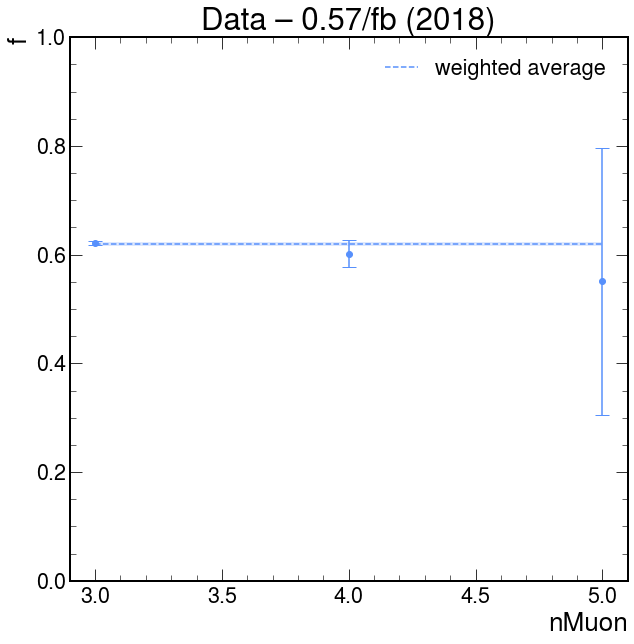

In [23]:
process = "data_non_qcd_subtracted"
#process = "DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018"
hist_name = 'nMuon_inv_vs_nMuon_tight_vs_nMuon'

N = plots[process][hist_name]

nMuon_max = 5

f_arr, delta_f_arr = [], []
for nMuon in range(3, nMuon_max+1):
    f, delta_f = get_f_full_stats(nMuon, N)
    f_arr.append(f)
    delta_f_arr.append(delta_f)

f_arr, delta_f_arr = np.array(f_arr), np.array(delta_f_arr)

weights = 1 / delta_f_arr**2
f_average = np.sum(weights * f_arr) / np.sum(weights)
delta_f_average = np.sqrt(1/np.sum(weights))

plt.hlines(f_average, 3, nMuon_max, linestyles="dashed", label="weighted average")
plt.fill_between(
    list(range(3, nMuon_max+1)),
    f_average - delta_f_average,
    f_average + delta_f_average,
    alpha=0.2,
)

plt.errorbar(list(range(3, nMuon_max+1)), f_arr, yerr=delta_f_arr, capsize=7, marker='o', linestyle="none")
plt.xlabel("nMuon")
plt.ylabel("f")
plt.title("Data – 0.57/fb (2018)")
plt.ylim(0, 1)
plt.legend()
plt.show()

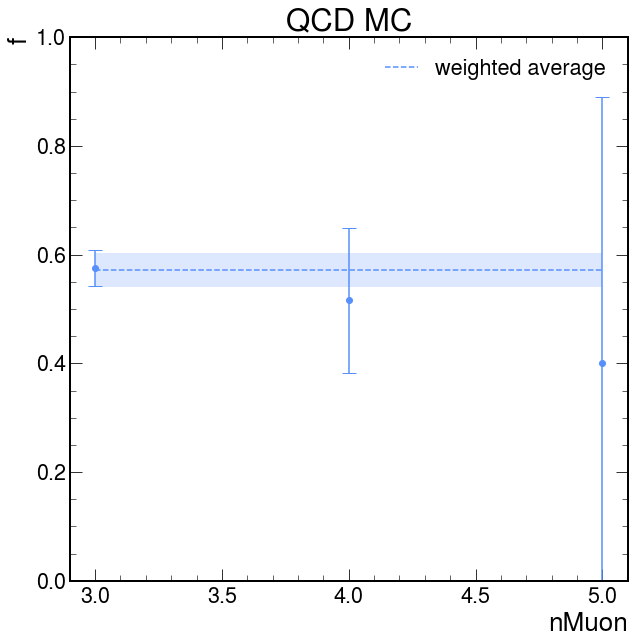

In [18]:
process = "QCD_Pt_MuEnriched_2018"
hist_name = 'nMuon_inv_vs_nMuon_tight_vs_nMuon'

nMuon_max = 5

N = plots[process][hist_name]

f_arr, delta_f_arr = [], []
for nMuon in range(3, nMuon_max+1):
    f, delta_f = get_f_full_stats(nMuon, N)
    f_arr.append(f)
    delta_f_arr.append(delta_f)

f_arr, delta_f_arr = np.array(f_arr), np.array(delta_f_arr)

weights = 1 / delta_f_arr**2
f_average = np.sum(weights * f_arr) / np.sum(weights)
delta_f_average = np.sqrt(1/np.sum(weights))

plt.hlines(f_average, 3, nMuon_max, linestyles="dashed", label="weighted average")
plt.fill_between(
    list(range(3, nMuon_max+1)),
    f_average - delta_f_average,
    f_average + delta_f_average,
    alpha=0.2,
)

plt.errorbar(list(range(3, nMuon_max+1)), f_arr, yerr=delta_f_arr, capsize=7, marker='o', linestyle="none")
plt.xlabel("nMuon")
plt.ylabel("f")
plt.ylim(0, 1)
plt.title("QCD MC")
plt.legend()
plt.show()

In [23]:
f_arr

[0.6097159517441963,
 0.5254698364544212,
 0.5421208977191618,
 0.0063778645762441796,
 0.07060951819706078]

In [12]:
N

Hist(
  Regular(10, 0, 10, name='nMuon_inv'),
  Regular(10, 0, 10, name='nMuon_tight'),
  Regular(10, 0, 10, name='nMuon'),
  storage=Weight()) # Sum: WeightedSum(value=1.92262e+11, variance=5.96208e+19)

Using f = 0.516 ± 0.133 from nMuon=4

Processing events with 4 muons

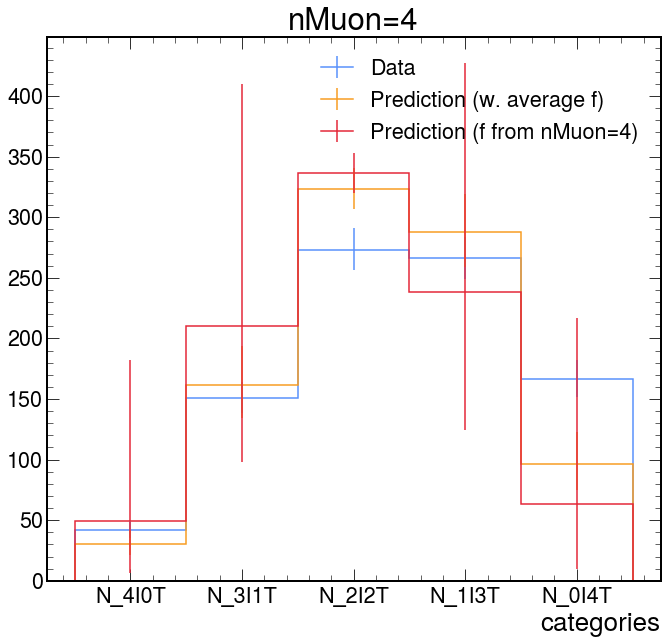

In [108]:
#process = "DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018"
process = "data_non_qcd_subtracted"
hist_name = 'nMuon_inv_vs_nMuon_tight_vs_nMuon'

N = plots[process][hist_name]

n = 4

f_n = f_arr[n-3]
delta_f_n = delta_f_arr[n-3]

h_est_av = hist.Hist.new.StrCategory(
    [f"N_{n-i}I{i}T" for i in range(n+1)], name="categories"
).Weight()
h_est = hist.Hist.new.StrCategory(
    [f"N_{n-i}I{i}T" for i in range(n+1)], name="categories"
).Weight()
h_mc = hist.Hist.new.StrCategory(
    [f"N_{n-i}I{i}T" for i in range(n+1)], name="categories"
).Weight()


print(f"Using f = {f_n:.3f} ± {delta_f_n:.3f} from nMuon={n}")
print(f"Processing events with {n} muons")

for m in range(n + 1):
    k = n - m
    mc, mc_unc = N[m*1j, k*1j, n*1j].value, np.sqrt(N[m*1j, k*1j, n*1j].variance)
    est_n, est_unc_n = N_mIkT_est(m, k, f_n, delta_f_n, N)
    est_av, est_unc_av = N_mIkT_est(m, k, f_average, delta_f_average, N)
    #est_av, est_unc_av = N_mIkT_est(m, k, 0.15, 0.03, N)
#     print(
#         f"N_{m}I{k}T:\n\t"
#         f"MC:  {mc:.2e} ± {mc_unc:.2e}\n\t"
#         f"{mc_unc**2/mc**2}\n\t"
#         f"est: {est_n:.2e} ± {est_unc_n:.2e}\n\t"
#         f"ratio = {est_n/mc:.2f} ± "
#         f"{np.sqrt((est_unc_n / mc)**2 + (est_n * mc_unc / mc**2)**2):.2f}"
#     )
    h_est[f"N_{m}I{k}T"] = hist.accumulators.WeightedSum(est_n, est_unc_n**2)
    h_est_av[f"N_{m}I{k}T"] = hist.accumulators.WeightedSum(est_av, est_unc_av**2)
    h_mc[f"N_{m}I{k}T"] = hist.accumulators.WeightedSum(mc, mc_unc**2)
    
fig, ax = plt.subplots(figsize=(11,10))
h_mc.plot(label="Data")
h_est_av.plot(label="Prediction (w. average f)")
h_est.plot(label=f"Prediction (f from nMuon={n})")
plt.legend()
#plt.yscale('log')
plt.title(f"nMuon={n}")
plt.show()

Using f = 0.638 ± 0.038 from nMuon=4

Processing events with 4 muons

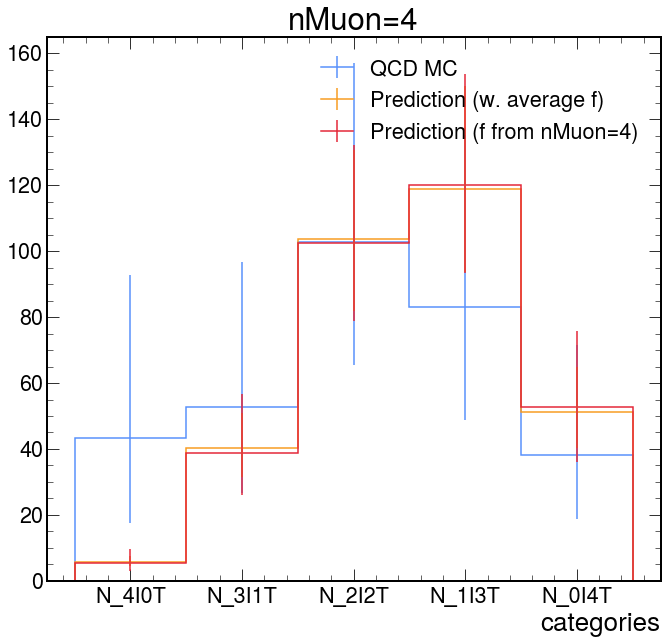

In [93]:
process = "QCD_Pt_MuEnriched_2018"
hist_name = 'nMuon_inv_vs_nMuon_tight_vs_nMuon'

N = plots[process][hist_name][:, :, :]

n = 4

f_n = f_arr[n-3]
delta_f_n = delta_f_arr[n-3]

h_est_av = hist.Hist.new.StrCategory(
    [f"N_{n-i}I{i}T" for i in range(n+1)], name="categories"
).Weight()
h_est = hist.Hist.new.StrCategory(
    [f"N_{n-i}I{i}T" for i in range(n+1)], name="categories"
).Weight()
h_mc = hist.Hist.new.StrCategory(
    [f"N_{n-i}I{i}T" for i in range(n+1)], name="categories"
).Weight()


print(f"Using f = {f_n:.3f} ± {delta_f_n:.3f} from nMuon={n}")
print(f"Processing events with {n} muons")

for m in range(n + 1):
    k = n - m
    mc, mc_unc = N[m*1j, k*1j, n*1j].value, np.sqrt(N[m*1j, k*1j, n*1j].variance)
    est_n, est_unc_n = N_mIkT_est(m, k, f_n, delta_f_n, N)
    est_av, est_unc_av = N_mIkT_est(m, k, f_average, delta_f_average, N)
    #est_av, est_unc_av = N_mIkT_est(m, k, 0.15, 0.03, N)
#     print(
#         f"N_{m}I{k}T:\n\t"
#         f"MC:  {mc:.2e} ± {mc_unc:.2e}\n\t"
#         f"{mc_unc**2/mc**2}\n\t"
#         f"est: {est_n:.2e} ± {est_unc_n:.2e}\n\t"
#         f"ratio = {est_n/mc:.2f} ± "
#         f"{np.sqrt((est_unc_n / mc)**2 + (est_n * mc_unc / mc**2)**2):.2f}"
#     )
    h_est[f"N_{m}I{k}T"] = hist.accumulators.WeightedSum(est_n, est_unc_n**2)
    h_est_av[f"N_{m}I{k}T"] = hist.accumulators.WeightedSum(est_av, est_unc_av**2)
    h_mc[f"N_{m}I{k}T"] = hist.accumulators.WeightedSum(mc, mc_unc**2)
    
fig, ax = plt.subplots(figsize=(11,10))
h_mc.plot(label="QCD MC")
h_est_av.plot(label="Prediction (w. average f)")
h_est.plot(label=f"Prediction (f from nMuon={n})")
plt.legend()
#plt.yscale('log')
plt.title(f"nMuon={n}")
plt.show()

In [51]:
f_5 = f_arr[2]
delta_f_5 = delta_f_arr[2]

In [65]:
h_est = hist.Hist.new.StrCategory(
    ['N_0I6T', 'N_1I5T', 'N_2I4T', 'N_3I3T', 'N_4I2T', 'N_5I1T', 'N_6I0T'], name="categories"
).Weight()
h_mc = hist.Hist.new.StrCategory(
    ['N_0I6T', 'N_1I5T', 'N_2I4T', 'N_3I3T', 'N_4I2T', 'N_5I1T', 'N_6I0T'], name="categories"
).Weight()

n = 6

print(f"Using f = {f_5:.3f} ± {delta_f_5:.3f} from nMuon=5")
print(f"Processing events with {n} muons")

for m in range(n + 1):
    k = n - m
    mc, mc_unc = N[m*1j, k*1j, n*1j].value, np.sqrt(N[m*1j, k*1j, n*1j].variance)
    est_5, est_unc_5 = N_mIkT_est(m, k, f_5, delta_f_5, N)
    print(
        f"N_{m}I{k}T:\n\t"
        f"MC:  {mc:.2e} ± {mc_unc:.2e}\n\t"
        f"est: {est_5:.2e} ± {est_unc_5:.2e}\n\t"
        f"ratio = {est_5/mc:.2f} ± "
        f"{np.sqrt((est_unc_5 / mc)**2 + (est_5 * mc_unc / mc**2)**2):.2f}"
    )
    h_est[f"N_{m}I{k}T"] = hist.accumulators.WeightedSum(est_5, est_unc_5**2)
    h_mc[f"N_{m}I{k}T"] = hist.accumulators.WeightedSum(mc, mc_unc**2)

Using f = 0.933 ± 0.184 from nMuon=5

Processing events with 6 muons

N_0I6T:
        MC:  8.47e+00 ± 7.22e+00
        est: 9.07e+05 ± 1.39e+06
        ratio = 107061.69 ± 187406.93

N_1I5T:
        MC:  6.42e+03 ± 4.29e+03
        est: 3.91e+05 ± 7.84e+05
        ratio = 60.94 ± 128.72

N_2I4T:
        MC:  3.03e+04 ± 2.41e+04
        est: 7.04e+04 ± 3.38e+05
        ratio = 2.32 ± 11.29

N_3I3T:
        MC:  1.33e+06 ± 1.33e+06
        est: 6.76e+03 ± 5.20e+04
        ratio = 0.01 ± 0.04

N_4I2T:
        MC:  7.11e+03 ± 4.41e+03
        est: 3.65e+02 ± 3.87e+03
        ratio = 0.05 ± 0.55

N_5I1T:
        MC:  1.27e+02 ± 4.56e+01
        est: 1.05e+01 ± 1.42e+02
        ratio = 0.08 ± 1.12

N_6I0T:
        MC:  3.14e+02 ± 2.34e+02
        est: 1.26e-01 ± 2.07e+00
        ratio = 0.00 ± 0.01

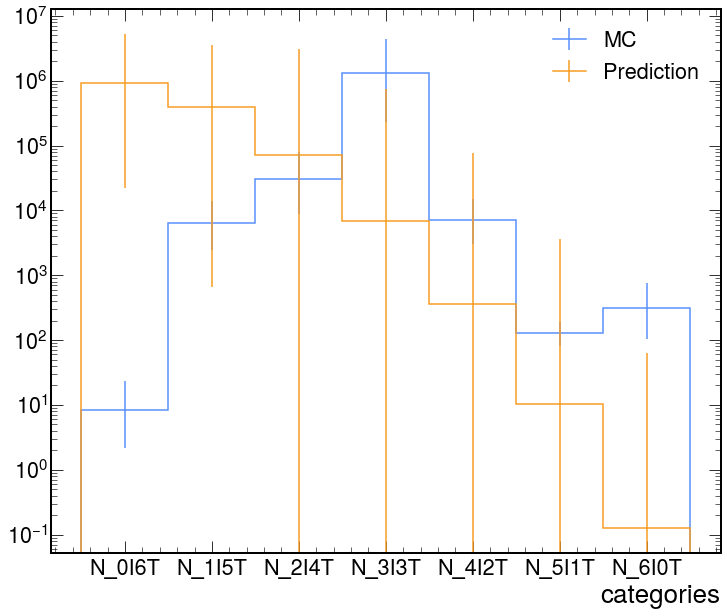

In [72]:
fig, ax = plt.subplots(figsize=(12,10))
h_mc.plot(label="MC")
h_est.plot(label="Prediction")
plt.legend()
plt.yscale('log')
plt.show()

In [74]:
[f"N_{i}I{4-i}T" for i in range(5)]

['N_0I4T', 'N_1I3T', 'N_2I2T', 'N_3I1T', 'N_4I0T']

In [81]:
N

Hist(
  Regular(10, 0, 10, name='nMuon_inv'),
  Regular(10, 0, 10, name='nMuon_tight'),
  Regular(10, 0, 10, name='nMuon'),
  storage=Weight()) # Sum: WeightedSum(value=1.92262e+11, variance=5.96208e+19)

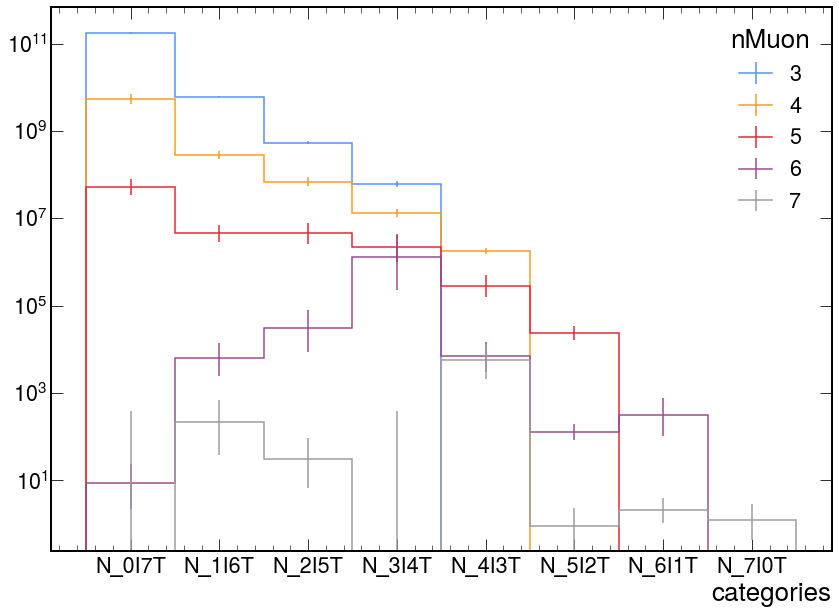

In [79]:
fig, ax = plt.subplots(figsize=(14,10))
h_mc = {}
for n in range(3, 8):
    h_mc[n] = hist.Hist.new.StrCategory(
        [f"N_{i}I{n-i}T" for i in range(n+1)], name="categories"
    ).Weight()
    for m in range(n + 1):
        k = n - m
        mc, mc_unc = N[m*1j, k*1j, n*1j].value, np.sqrt(N[m*1j, k*1j, n*1j].variance)
        h_mc[n][f"N_{m}I{k}T"] = hist.accumulators.WeightedSum(mc, mc_unc**2)
    h_mc[n].plot(label=f"{n}")
plt.yscale('log')
plt.legend(title="nMuon")
plt.show()

In [92]:
N[::sum, ::sum, 7j]

WeightedSum(value=6028.3, variance=1.67212e+07)

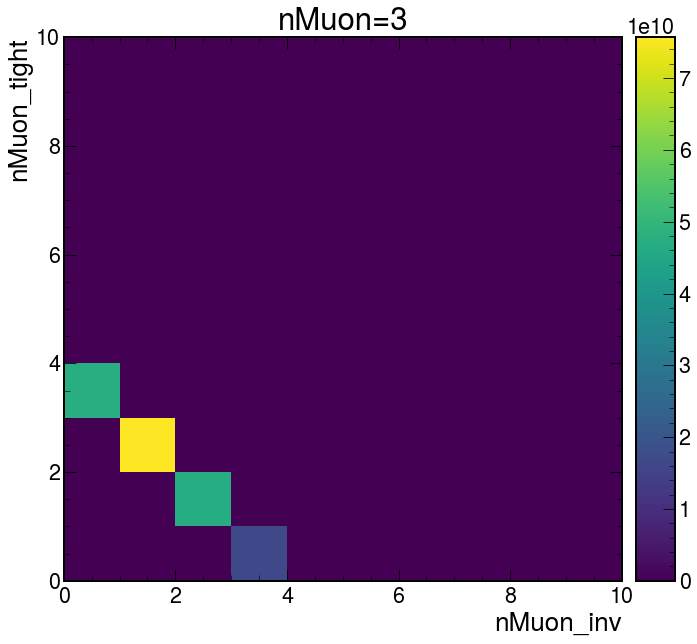

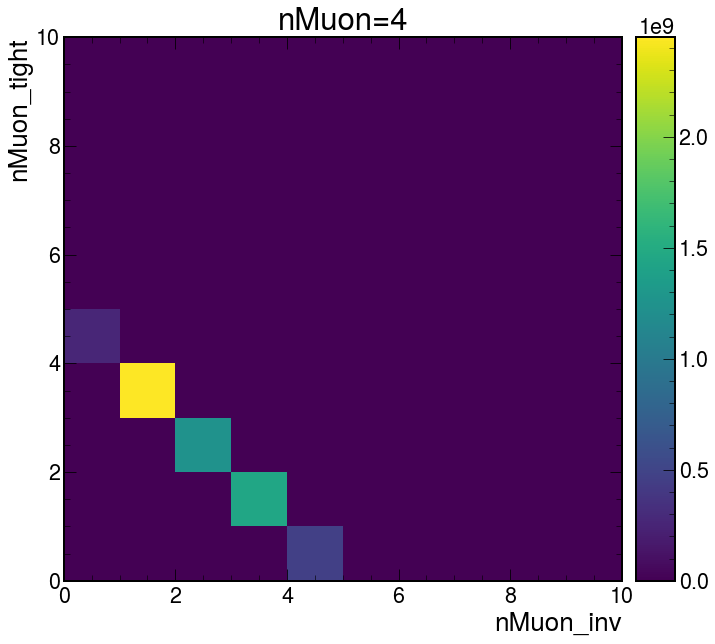

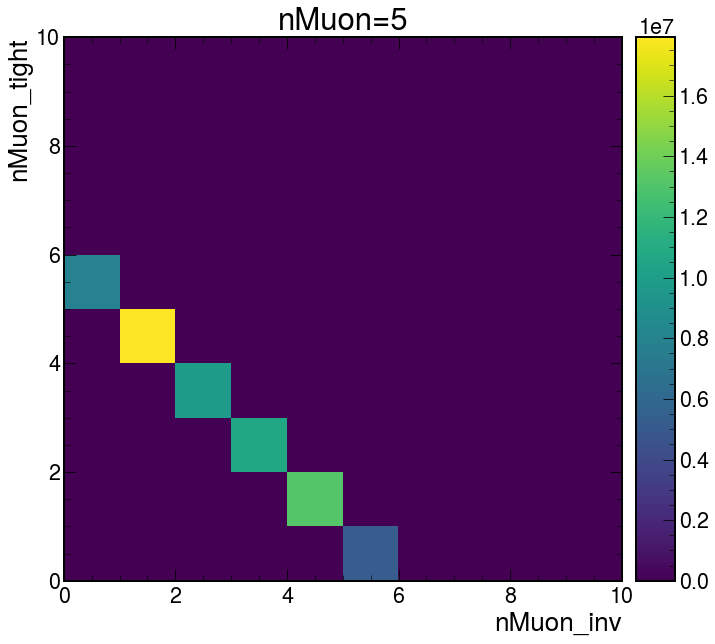

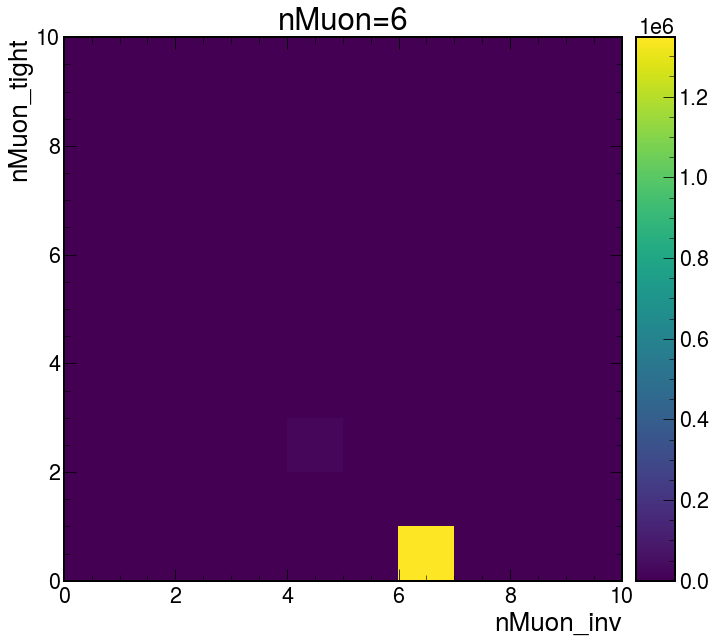

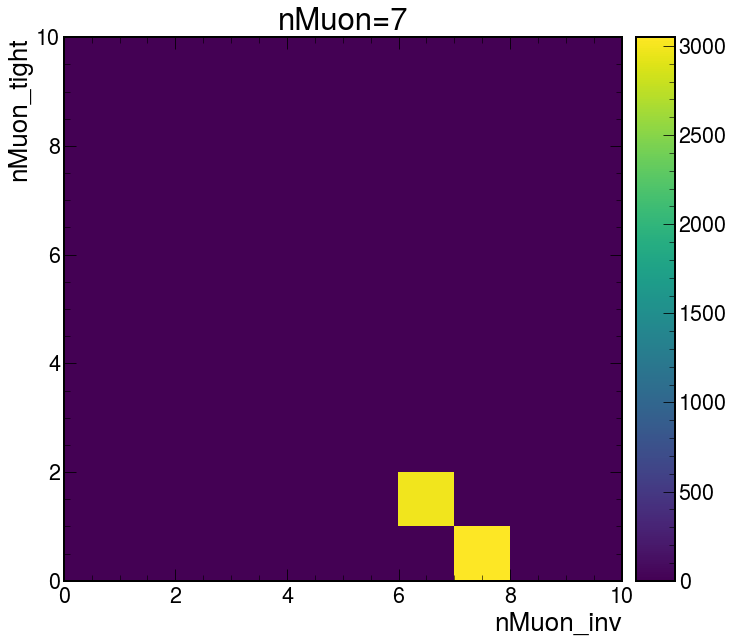

In [50]:
for i in range(3, 8):
    N[:, :, i*1j].plot2d()
    plt.title(f"nMuon={i}")
    plt.show()